<a href="https://colab.research.google.com/github/NishaMDev/ML-Learning/blob/main/Midterm/NumericalProject/ML_Mid_Term_Numerical_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Team Name: ML-Drivers**


### **Members:**

**Akanksha Rawat: akanksha.rawat@sjsu.edu**      

**Karishma Kuria: karishma.kuria@sjsu.edu**.

**Nisha Mohan Devadiga: nishamohan.devadiga@sjsu.edu**

# **Project Description:**

Football is a very popular game worldwide. It was invented in England in the nineteenth century and  is now played by more than 240 million people according to International Federation of Association Football. 

Also known as soccer in some countries, the motivation for this project is inspired from an opportunity to work with a large database of football data. This data was provided by BBC , ESPN, and several other sport new channel through web scraping. 

Two main datasets were used. The first dataset was chosen because it has the highest level of detail and the lowest levels of missing values and erroneous data. The second dataset includes all matches played in six European countries, including Portugal, for 5 years spanning from 2012 to 2017. 

In this collab, we explore the data mining process wherein we apply several Data Mining techniques to the chosen datasets to identify and discover existing patterns. 

An example of application would be the development of a system that **identify best and worst performing teams based on their games - (Red Card Vs Goal) using CLUSTERING and identify the "GOLDEN CLUSTER"**. 

Another example would be Soccer Match Outcome/Goals Prediction based on their style of play.

We will also be covering the analysis/ questions like below using the best classifier to compare through the performance matrix and make predictions:-

1.   Which players are the best finishers?
2.   Analyzing Goals Scored?
3.   Analyzing Yellow/Red Cards?
4.   Which players have the most “expected goals”?
5.   Which players are the worst at deciding their shots?
6.   Which players make the best/most dangerous passes?

**Objective Functions:**

1.   Identify and group Soccer Teams based on their ***Goals and Red Cards*** recieved throughout their games.
2.   Identify Top 3 Best Performing Soccer teams based on ***Goals scored and accumulated Red Cards***.
3.   Identify Worst Performing Soccer teams based on ***Goals scored and accumulated Red Cards***.

## **Datasets:-**

This dataset is a result of a very tiresome effort of webscraping and integrating different data sources. The central element is the text commentary. All the events were derived by reverse engineering the text commentary, using regex.It includes events from more than 7,000 games from the top 5 European Leagues from 2011 to 2016.

The dataset provides a granular view of 9,074 games, totaling 941,009 events from the biggest 5 European football (soccer) leagues: England, Spain, Germany, Italy, France from 2011/2012 season to 2016/2017 season as of 25.01.2017.The dataset is organized in 3 files:

1.   ***events.csv*** contains event data about each game. Text commentary was scraped from: bbc.com, espn.com and onefootball.com
2.   ***ginf.csv*** contains metadata and market odds about each game. odds were collected from oddsportal.com
3.   ***dictionary.txt*** contains a dictionary with the textual description of each categorical variable coded with integers.

Datasource:- [Kaggle Dataset](https://www.kaggle.com/secareanualin/football-events)





## **Scraped Dataset :** 

 Since the original dataset had not enough features to do the prediction we have used second dataset and performed muller classification and regression on the new dataset.

## **Classification / Regression**

The main objective of classification and regression problem are as follows:

1. To find which team wins the match. So we have used Full Time Result as the target variable for Regression and Classification Algorithms. For doing feature selection and model explainability , we have used Shap values and selected the top scoring feature for model training.

2.   Predict if a shot is goal or no goal.

## **Dashboard**

We have used Experience Dashboard to give an interactive experience for the results of both Classification and Regression.

1. Interactive Dashboard experience for the results of both Regression and Classification algorithms used.
2. Dashboard have multiple tabls to show the performance of model, f1 score, confusion matrix, shap results, decision tree etc.
3. It also contains various methods used to check the feature importance such as using shap values and pick the top features which are relevant for the prediction.
4. Smote has been used to do upsampling and downsampling of data.


## **Evaluation Matric**

We have used Confusion matrix with below features:

1. AUC-ROC
2. f1
3. Accuracy

# **Imports required Libraries and Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

## **Data gathering**

Gather data from dataset saved in the Google Drive.

Before you run the below step, please make a copy of the [data folder](https://drive.google.com/drive/folders/1f68m5RB37TEtL7F-bfFEaYRon2d5Y1t6) in your shared drive  by right clicking on data folder and clicking on "Add shortcut to Drive".

Once done , please proceed to mount the drive by running the below code.

In [ ]:
from google.colab import drive
#drive.mount('/gdrive')
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
EVENT_FILE_PATH = "/content/drive/MyDrive/data/events.csv"
GINFO_FILE_PATH = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSe-_wgZcBHPZwYlhkTb8Pwr55bAo3ZkA6lnMatz-rs5V5ElchJUp7y9wRX5Cw-uhu9xTFmOHNk-7fj/pub?output=csv"
DICT_FILE_PATH = "/content/drive/MyDrive/data/dictionary.txt"

# **Data Understanding and Preprocessing**

In [ ]:
events = pd.read_csv(EVENT_FILE_PATH)

events.head(2) #Printing first 2 rows of the dataset

id_odsp   id_event  sort_order  time                                               text  event_type  event_type2  side         event_team           opponent            player           player2 player_in player_out  shot_place  shot_outcome  is_goal  location  bodypart  assist_method  situation  fast_break
0  UFot0hit/  UFot0hit1           1     2  Attempt missed. Mladen Petric (Hamburg) left f...           1         12.0     2         Hamburg SV  Borussia Dortmund     mladen petric       gokhan tore       NaN        NaN         6.0           2.0        0       9.0       2.0              1        1.0           0
1  UFot0hit/  UFot0hit2           2     4  Corner,  Borussia Dortmund. Conceded by Dennis...           2          NaN     1  Borussia Dortmund         Hamburg SV  dennis diekmeier  dennis diekmeier       NaN        NaN         NaN           NaN        0       NaN       NaN              0        NaN           0

In [ ]:
info = pd.read_csv(GINFO_FILE_PATH)

In [ ]:
events.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941009 entries, 0 to 941008
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id_odsp        941009 non-null  object 
 1   id_event       941009 non-null  object 
 2   sort_order     941009 non-null  int64  
 3   time           941009 non-null  int64  
 4   text           941009 non-null  object 
 5   event_type     941009 non-null  int64  
 6   event_type2    214293 non-null  float64
 7   side           941009 non-null  int64  
 8   event_team     941009 non-null  object 
 9   opponent       941009 non-null  object 
 10  player         880009 non-null  object 
 11  player2        291310 non-null  object 
 12  player_in      51715 non-null   object 
 13  player_out     51738 non-null   object 
 14  shot_place     227459 non-null  float64
 15  shot_outcome   228498 non-null  float64
 16  is_goal        941009 non-null  int64  
 17  location       467067 non-nul

In [ ]:
print('Data has {} rows and {} columns'.format(events.shape[0], events.shape[1]))

Data has 941009 rows and 22 columns


In [ ]:
print('Event Data has {} columns with column names as {} '.format(events.shape[1],events.columns.to_list()))

Event Data has 22 columns with column names as ['id_odsp', 'id_event', 'sort_order', 'time', 'text', 'event_type', 'event_type2', 'side', 'event_team', 'opponent', 'player', 'player2', 'player_in', 'player_out', 'shot_place', 'shot_outcome', 'is_goal', 'location', 'bodypart', 'assist_method', 'situation', 'fast_break'] 



### **Leagues statistical analysis:**

In [ ]:
goals = events[events.is_goal == 1]
goals.describe()

sort_order          time    event_type   event_type2          side    shot_place  shot_outcome  is_goal      location      bodypart  assist_method     situation    fast_break
count  24446.000000  24446.000000  24446.000000  17266.000000  24446.000000  22770.000000       23816.0  24446.0  24441.000000  24445.000000   24446.000000  24441.000000  24446.000000
mean      54.239589     50.397366      1.000409     12.121800      1.425959      5.441853           1.0      1.0      8.746614      1.623031       1.192833      1.463647      0.067168
std       31.855459     26.321327      0.028601      0.592102      0.494498      3.434060           0.0      0.0      5.501859      0.762536       1.157772      0.807847      0.250319
min        1.000000      0.000000      1.000000     12.000000      1.000000      3.000000           1.0      1.0      3.000000      1.000000       0.000000      1.000000      0.000000
25%       27.000000     28.000000      1.000000     12.000000      1.000000      3.000000           1.0      1.0      3.000000      1.000000       0.000000      1.000000      0.000000
50%       53.000000     51.000000      1.000000     12.000000      1.000000      4.000000           1.0      1.0      9.000000      1.000000       1.000000      1.000000      0.000000
75%       79.000000     73.000000      1.000000     12.000000      2.000000      5.000000           1.0      1.0     13.000000      2.000000       2.000000      2.000000      0.000000
max      155.000000     98.000000      3.000000     15.000000      2.000000     13.000000           1.0      1.0     19.000000      3.000000       4.000000      4.000000      1.000000

In [ ]:
# The most resultative leagues
info['scored'] = info['fthg'] + info['ftag']
print('Overall scores')
info.groupby('country').scored.sum().sort_values(ascending=False).head()



Overall scores


country
england    5812
spain      5787
italy      5580
france     5283
germany    4871
Name: scored, dtype: int64

In [ ]:
print('Mean scores')
info.groupby('country').scored.mean().sort_values(ascending=False).head()

Mean scores


country
germany    2.882249
spain      2.770225
england    2.741509
italy      2.649573
france     2.507356
Name: scored, dtype: float64

Here with average value we can see that EPL(England'S league) is not as resultative as Bundesliga(Germany's league) and we took average beacuse there are 20 teams in EPL, but only 18 in 1st Bundesliga. The best value to compare number of goals is mean value of it.

**Team Analysis, which is most resultative team:**

In [ ]:
home_goals = info.groupby('ht').fthg.sum()
away_goals = info.groupby('at').ftag.sum()
sum_goals = (home_goals + away_goals).sort_values(ascending=False)
sum_goals.head(20)

Real Madrid            604.0
Barcelona              602.0
Bayern Munich          469.0
Manchester City        458.0
Paris Saint-Germain    454.0
Napoli                 413.0
Juventus               408.0
Borussia Dortmund      407.0
Arsenal                400.0
Chelsea                390.0
Liverpool              385.0
Manchester Utd         383.0
AS Roma                379.0
Tottenham              359.0
Lyon                   359.0
Atletico Madrid        359.0
Sevilla                339.0
AC Milan               334.0
Fiorentina             328.0
Bayer Leverkusen       321.0
dtype: float64


"¡Hala Madrid! 

Which teams missed most games ?

In [ ]:
# Most missing teams
home_missed = info.groupby('ht').ftag.sum()
away_missed = info.groupby('at').fthg.sum()
sum_missed = (home_missed + away_missed).sort_values(ascending=False)
sum_missed.head(20)

Rayo Vallecano    360.0
Werder Bremen     356.0
Granada           341.0
Sunderland        317.0
Aston Villa       316.0
Hamburg SV        315.0
TSG Hoffenheim    312.0
Lorient           311.0
Espanyol          310.0
Swansea           308.0
Newcastle         306.0
VfB Stuttgart     298.0
West Brom         295.0
Genoa             295.0
Getafe            293.0
Levante           287.0
Hannover 96       284.0
Stoke City        284.0
Udinese           281.0
Real Sociedad     280.0
dtype: float64

In [ ]:
(sum_goals - sum_missed).sort_values(ascending=False).head(20)

Barcelona              433.0
Real Madrid            403.0
Bayern Munich          361.0
Paris Saint-Germain    297.0
Juventus               281.0
Manchester City        251.0
Borussia Dortmund      206.0
Atletico Madrid        193.0
Napoli                 182.0
Chelsea                178.0
Arsenal                178.0
Manchester Utd         171.0
AS Roma                154.0
Lyon                   127.0
Liverpool              127.0
Tottenham              117.0
AS Monaco              107.0
AC Milan                96.0
Bayer Leverkusen        95.0
Fiorentina              84.0
dtype: float64

it's great parameter for comparation, because the less games has a team played, the less balls it could score, but also the less balls this team could miss. As for me, this mark can show us an "efficiency" of each team.


### **The best free kickers**

In [ ]:
free_kicks = goals[goals.situation == 4]
best_kickers = free_kicks.groupby('player').player.count().sort_values(ascending=False)
best_kickers.head(20)

player
lionel messi           14
cristiano ronaldo      13
miralem pjanic         13
andrea pirlo           12
francesco lodi         10
hakan calhanoglu       10
daniel wass             9
benat                   9
zlatan ibrahimovic      8
juan arango             7
christian eriksen       6
clement grenier         6
marvin plattenhardt     6
daniel parejo           6
mario balotelli         6
wahbi khazri            6
daniele conti           6
diego                   6
alexis sanchez          5
antonio di natale       5
Name: player, dtype: int64

### **Penalties analysis**

In [ ]:
penalties_goals = goals[goals.location == 14]
penalties_scored = penalties_goals.groupby('player').player.count().sort_values(ascending=False)
penalties_scored.head(20)

player
cristiano ronaldo      43
zlatan ibrahimovic     35
lionel messi           30
edinson cavani         20
falcao                 20
sejad salihovic        19
eden hazard            18
alexandre lacazette    18
antonio candreva       18
domenico berardi       16
mauricio pinilla       14
steven gerrard         14
francesco totti        14
german denis           14
paul verhaegh          14
antonio di natale      13
ryad boudebouz         13
thomas muller          13
sergio aguero          12
carlos bacca           12
Name: player, dtype: int64

### **Most Attempts**

In [ ]:
# By player
attempts = events[events.event_type == 1]
attempts.groupby('player').player.count().sort_values(ascending=False).head(20)

player
cristiano ronaldo           1190
lionel messi                 914
zlatan ibrahimovic           774
robert lewandowski           633
edinson cavani               623
pierreemerick aubameyang     580
antonio candreva             556
gonzalo higuain              552
antonio di natale            515
antoine griezmann            493
bafetimbi gomis              458
eder                         457
dimitri payet                456
alexis sanchez               445
olivier giroud               442
karim benzema                434
luis suarez                  433
roberto firmino              427
fabio quagliarella           424
sergio aguero                416
Name: player, dtype: int64

In [ ]:
attempts.groupby('event_team').player.count().sort_values(ascending=False).head(20)

event_team
Real Madrid            3725
Juventus               3480
Napoli                 3263
AS Roma                3257
Barcelona              3222
Fiorentina             3125
Bayern Munich          3109
Internazionale         3103
AC Milan               3065
Borussia Dortmund      2930
Paris Saint-Germain    2905
Lazio                  2860
Marseille              2833
Lyon                   2824
Lille                  2779
Sevilla                2739
Atletico Madrid        2686
Bayer Leverkusen       2626
Valencia               2577
Montpellier            2562
Name: player, dtype: int64

### **Describing the data**

In [ ]:
events.describe().T

count       mean        std   min   25%   50%   75%    max
sort_order     941009.0  53.858826  32.014268   1.0  27.0  53.0  79.0  180.0
time           941009.0  49.663663  26.488977   0.0  27.0  51.0  73.0  100.0
event_type     941009.0   4.326575   2.995313   1.0   2.0   3.0   8.0   11.0
event_type2    214293.0  12.233764   0.468850  12.0  12.0  12.0  12.0   15.0
side           941009.0   1.481170   0.499646   1.0   1.0   1.0   2.0    2.0
shot_place     227459.0   5.733693   3.326100   1.0   2.0   5.0   9.0   13.0
shot_outcome   228498.0   1.926555   0.797055   1.0   1.0   2.0   3.0    4.0
is_goal        941009.0   0.025978   0.159071   0.0   0.0   0.0   0.0    1.0
location       467067.0   6.209073   5.421736   1.0   2.0   3.0  11.0   19.0
bodypart       229185.0   1.624831   0.740400   1.0   1.0   1.0   2.0    3.0
assist_method  941009.0   0.264332   0.655501   0.0   0.0   0.0   0.0    4.0
situation      229137.0   1.281316   0.709394   1.0   1.0   1.0   1.0    4.0
fast_break     941009.0   0.004876   0.069655   0.0   0.0   0.0   0.0    1.0

Read the Game info dataset

In [ ]:
info = pd.read_csv(GINFO_FILE_PATH)

info.head(10)

id_odsp                                          link_odsp  adv_stats        date league  season  country                   ht                     at  fthg  ftag  odd_h  odd_d  odd_a  odd_over  odd_under  odd_bts  odd_bts_n
0  UFot0hit/  /soccer/germany/bundesliga-2011-2012/dortmund-...       True  2011-08-05     D1    2012  germany    Borussia Dortmund             Hamburg SV     3     1   1.56   4.41   7.42       NaN        NaN      NaN        NaN
1  Aw5DflLH/  /soccer/germany/bundesliga-2011-2012/augsburg-...       True  2011-08-06     D1    2012  germany          FC Augsburg            SC Freiburg     2     2   2.36   3.60   3.40       NaN        NaN      NaN        NaN
2  bkjpaC6n/  /soccer/germany/bundesliga-2011-2012/werder-br...       True  2011-08-06     D1    2012  germany        Werder Bremen         Kaiserslautern     2     0   1.83   4.20   4.80       NaN        NaN      NaN        NaN
3  CzPV312a/  /soccer/france/ligue-1-2011-2012/paris-sg-lori...       True  2011-08-06     F1    2012   france  Paris Saint-Germain                Lorient     0     1   1.55   4.50   9.40       NaN        NaN      NaN        NaN
4  GUOdmtII/  /soccer/france/ligue-1-2011-2012/caen-valencie...       True  2011-08-06     F1    2012   france                 Caen           Valenciennes     1     0   2.50   3.40   3.45       NaN        NaN      NaN        NaN
5  lOpzwMkp/  /soccer/germany/bundesliga-2011-2012/hertha-be...       True  2011-08-06     D1    2012  germany        Hertha Berlin               Nurnberg     0     1   2.06   3.75   3.95       NaN        NaN      NaN        NaN
6  M7PhlM2C/  /soccer/france/ligue-1-2011-2012/brest-evian-t...       True  2011-08-06     F1    2012   france                Brest  Evian Thonon Gaillard     2     2   2.29   3.25   3.85       NaN        NaN      NaN        NaN
7  QuWqjrYa/  /soccer/france/ligue-1-2011-2012/ac-ajaccio-to...       True  2011-08-06     F1    2012   france           AC Ajaccio               Toulouse     0     2   2.80   3.10   3.05       NaN        NaN      NaN        NaN
8  UBZQ4smg/  /soccer/france/ligue-1-2011-2012/nice-lyon-UBZ...       True  2011-08-06     F1    2012   france                 Nice                   Lyon     1     3   4.50   3.55   2.00       NaN        NaN      NaN        NaN
9  Wn69eU5B/  /soccer/germany/bundesliga-2011-2012/koln-wolf...       True  2011-08-06     D1    2012  germany           FC Cologne          VfL Wolfsburg     0     3   3.00   3.80   2.54       NaN        NaN      NaN        NaN

In [ ]:
info.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10112 entries, 0 to 10111
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id_odsp    10112 non-null  object 
 1   link_odsp  10112 non-null  object 
 2   adv_stats  10112 non-null  bool   
 3   date       10112 non-null  object 
 4   league     10112 non-null  object 
 5   season     10112 non-null  int64  
 6   country    10112 non-null  object 
 7   ht         10112 non-null  object 
 8   at         10112 non-null  object 
 9   fthg       10112 non-null  int64  
 10  ftag       10112 non-null  int64  
 11  odd_h      10112 non-null  float64
 12  odd_d      10112 non-null  float64
 13  odd_a      10112 non-null  float64
 14  odd_over   977 non-null    float64
 15  odd_under  977 non-null    float64
 16  odd_bts    977 non-null    float64
 17  odd_bts_n  977 non-null    float64
dtypes: bool(1), float64(7), int64(3), object(7)
memory usage: 1.3+ MB


In [ ]:
print('Data has {} rows and {} columns'.format(info.shape[0], info.shape[1]))

Data has 10112 rows and 18 columns


In [ ]:
print('Event Data has {} columns with column names as {} '.format(info.shape[1],info.columns.to_list()))

Event Data has 18 columns with column names as ['id_odsp', 'link_odsp', 'adv_stats', 'date', 'league', 'season', 'country', 'ht', 'at', 'fthg', 'ftag', 'odd_h', 'odd_d', 'odd_a', 'odd_over', 'odd_under', 'odd_bts', 'odd_bts_n'] 


**Describing the data**

In [ ]:
info.describe().T

count         mean       std      min      25%      50%      75%      max
season     10112.0  2014.290249  1.610074  2012.00  2013.00  2014.00  2016.00  2017.00
fthg       10112.0     1.548062  1.309591     0.00     1.00     1.00     2.00    10.00
ftag       10112.0     1.154964  1.142596     0.00     0.00     1.00     2.00     9.00
odd_h      10112.0     2.930120  2.370135     1.06     1.76     2.27     3.08    46.00
odd_d      10112.0     4.278434  1.863643     1.91     3.43     3.68     4.30    35.00
odd_a      10112.0     5.537545  5.700485     1.11     2.74     3.86     6.00    81.00
odd_over     977.0     2.046817  0.367062     1.14     1.79     2.03     2.28     3.40
odd_under    977.0     2.105629  0.536646     1.42     1.78     1.97     2.27     7.50
odd_bts      977.0     1.942917  0.211102     1.41     1.80     1.92     2.05     3.25
odd_bts_n    977.0     2.063941  0.251276     1.44     1.87     2.05     2.20     3.46

**Duplicate values Check**

In [ ]:
# checkfor duplicate values
sum(events.duplicated())

0

**Check Missing Values**

In [ ]:
# check for the count of missing values
events.isnull().sum()

id_odsp               0
id_event              0
sort_order            0
time                  0
text                  0
event_type            0
event_type2      726716
side                  0
event_team            0
opponent              0
player            61000
player2          649699
player_in        889294
player_out       889271
shot_place       713550
shot_outcome     712511
is_goal               0
location         473942
bodypart         711824
assist_method         0
situation        711872
fast_break            0
dtype: int64

From the above step, I have observed that there are null values in the below columns:


1. event_type2
2. player
3. player2
4. player_in
5. player_out
6. shot_place
7. shot_outcome
8. location
9. bodypart
10. situation

# **Exploring Data**

### **Let's check the outcome of the shots by the players.**

In [ ]:
shots = events[events.event_type==1]
shots['player'] = shots['player'].str.title()
shots['player2'] = shots['player2'].str.title()

pie = shots[['shot_outcome', 'id_event']].groupby('shot_outcome').count().reset_index().rename(columns={'id_event': 'count'})

In [ ]:
pie.shot_outcome = pie.shot_outcome.astype(int)
pie.shot_outcome = pie.shot_outcome.replace({1: 'On Target', 2: 'Off Target', 3: 'Blocked', 4: 'Hit the Bar'})

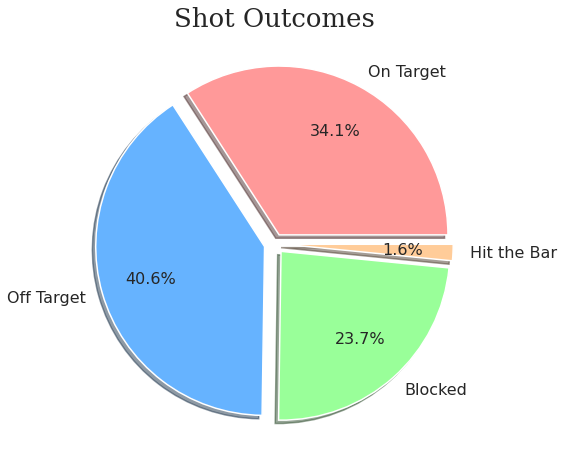

In [ ]:
fig, ax = plt.subplots(figsize=[8,8])
labels = pie['shot_outcome']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(x=pie['count'], autopct="%.1f%%", labels=labels, explode=[0.06]*4, pctdistance=0.7, colors=colors, shadow=True, \
       textprops=dict(fontsize=16))
plt.title("Shot Outcomes", fontsize=26, fontfamily='serif')
plt.tight_layout()
plt.show()

We see that most of the shots are off-target, but the difference with on-target shows is not so large. Of course only a fraction of those on-target shots end up as goals, because there is a goalkeeper trying to prevent goals on the other side.

Now let's explore where shots tend to be placed by the players.

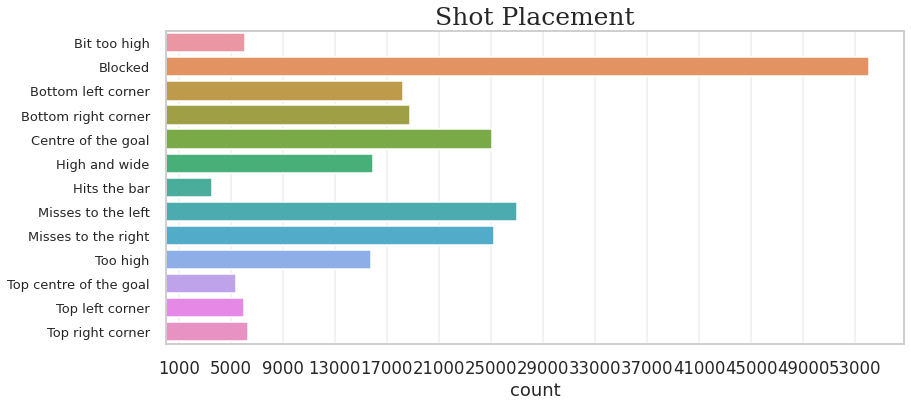

In [ ]:
bar = shots[['shot_place', 'id_event']].groupby('shot_place').count().reset_index().rename(columns={'id_event': 'count'})
bar.shot_place = bar.shot_place.astype(int)
bar.shot_place = bar.shot_place.replace({1: 'Bit too high', 2: 'Blocked', 3: 'Bottom left corner', 4: 'Bottom right corner', \
                                        5: 'Centre of the goal', 6: 'High and wide', 7: 'Hits the bar', 8: 'Misses to the left', \
                                        9: 'Misses to the right', 10: 'Too high', 11: 'Top centre of the goal', \
                                        12: 'Top left corner', 13: 'Top right corner'})

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=[13,6])
labels = bar['shot_place']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax = sns.barplot(x=bar['count'], y=labels)
ax.set_yticklabels(labels, size = 13)
ax.set_xticks(np.arange(1000,57000,4000))
ax.set_ylabel(ylabel='')
plt.title("Shot Placement", fontsize=25, fontfamily='serif')
plt.tight_layout()
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='x')
plt.show()

**It can be noted that most of the shots are blocked**

### **Analyzing Goals against Time during match**

Text(0.5, 1.0, 'Number of goals against Time during match')

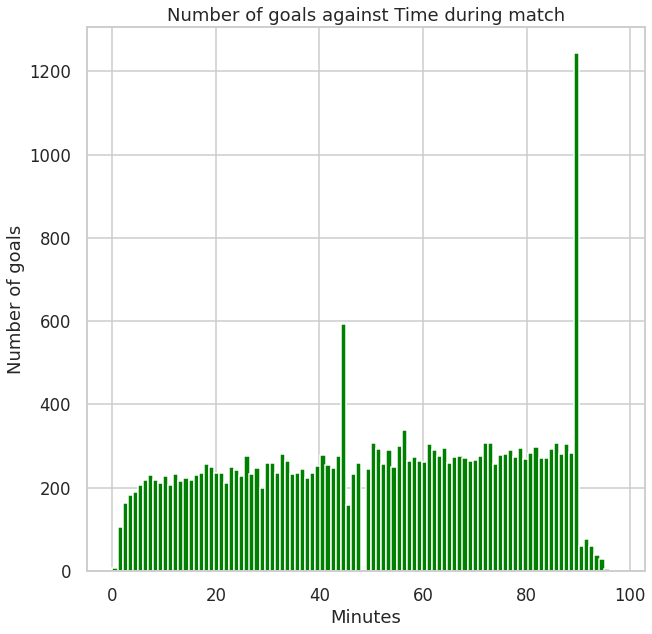

In [ ]:
goals=events[events["is_goal"]==1]

fig=plt.figure(figsize=(10,10))
plt.hist(goals.time,width=1,bins=100,color="green")   #100 so 1 bar per minute
plt.xlabel("Minutes")
plt.ylabel("Number of goals")
plt.title("Number of goals against Time during match")

From the above plot it is noted that most goals are scored around the Half-Time (45mins + extra time) and around Full-Time (90mins + extra time)

### **Here we have plotted the graph between "Number of Goals" (by home/away side) and "Minutes" in a match.**

Text(0.5, 1.0, 'Number of goals (by home/away side) against Time during match')

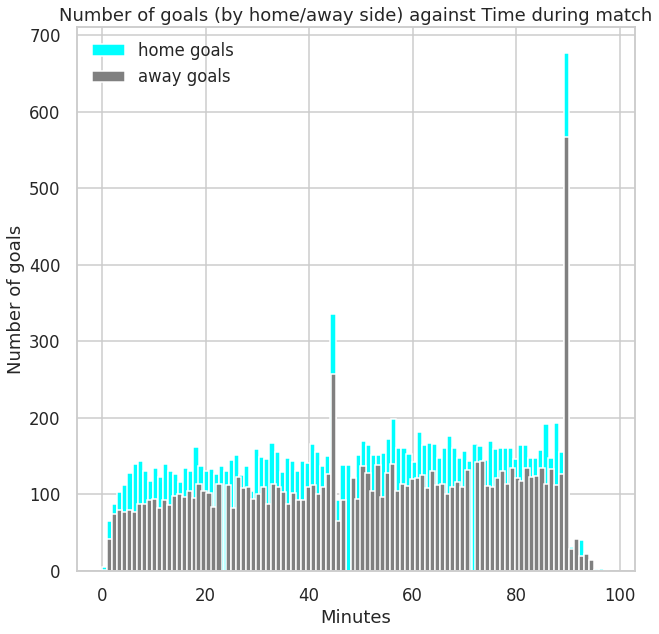

In [ ]:
fig=plt.figure(figsize=(10,10))
plt.hist(goals[goals["side"]==1]["time"],width=1,bins=100,color="cyan",label="home goals")   
plt.hist(goals[goals["side"]==2]["time"],width=1,bins=100,color="grey",label="away goals") 
plt.xlabel("Minutes")
plt.ylabel("Number of goals")
plt.legend()
plt.title("Number of goals (by home/away side) against Time during match")

**Observation**:

1. For every minute, most of the goals scored are by the home side
This supports the general notion that the home side has a statistical advantage.
2. Maximum number of goals were scored between 40 to 50 minutes in a match by both Home and away Team.

### **Analyzing goals (by body parts) against Time during match**

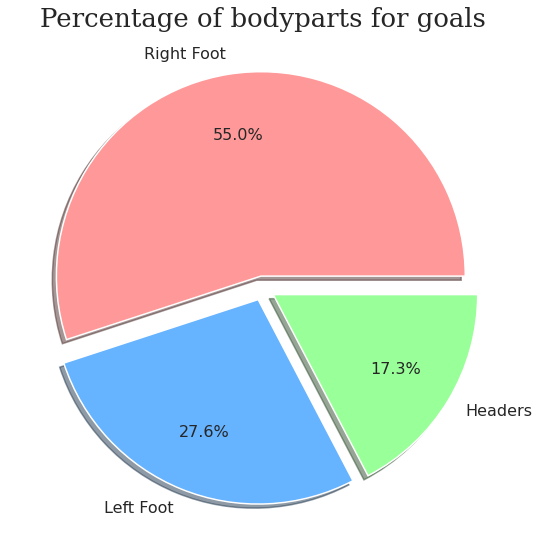

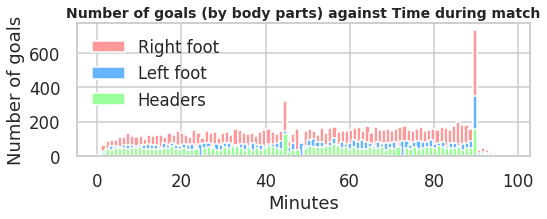

In [ ]:


fig, ax = plt.subplots(figsize=[8,8])
labels = ["Right Foot","Left Foot","Headers"]
sizes=[goals[goals["bodypart"]==1].shape[0],goals[goals["bodypart"]==2].shape[0],goals[goals["bodypart"]==3].shape[0]]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(sizes, autopct="%.1f%%", labels=labels, explode=[0.06]*3, pctdistance=0.7, colors=colors, shadow=True, \
       textprops=dict(fontsize=16))
plt.title("Percentage of bodyparts for goals", fontsize=26, fontfamily='serif')
plt.tight_layout()
plt.show()

plt.subplot(2,1,2)
plt.hist(goals[goals["bodypart"]==1]["time"],width=1,bins=100,color="#ff9999",label="Right foot")   
plt.hist(goals[goals["bodypart"]==2]["time"],width=1,bins=100,color="#66b3ff",label="Left foot") 
plt.hist(goals[goals["bodypart"]==3]["time"],width=1,bins=100,color="#99ff99",label="Headers") 
plt.xlabel("Minutes")
plt.ylabel("Number of goals")
plt.legend()
plt.title("Number of goals (by body parts) against Time during match",fontsize=14,fontweight="bold")
plt.tight_layout()

**Observation:**

Most of the goals scored are by Right Footed, then followed by Left Footed and lastly, by Headers.
Perhaps, this might be because the majority of humans are right-footed and, hence, most players are right-footed. 

It is also not surprising that most goals have been scored by foot not head, as after all, soccer is meant to be played by foot.

### **Analyzing each situation for goals**

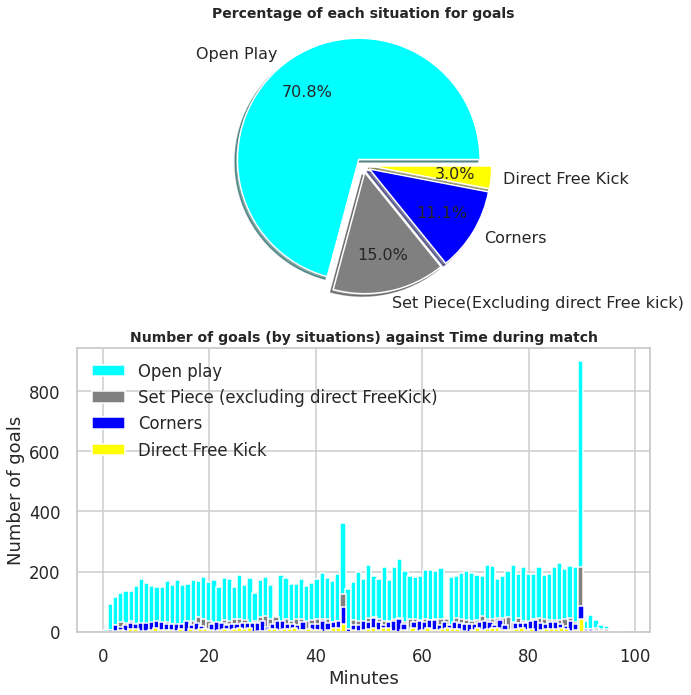

In [ ]:
plt.subplot(2,1,1)
labels=["Open Play", "Set Piece(Excluding direct Free kick)","Corners","Direct Free Kick"]
sizes=[goals[goals["situation"]==1].shape[0],goals[goals["situation"]==2].shape[0],goals[goals["situation"]==3].shape[0],goals[goals["situation"]==4].shape[0]]
colors=["cyan","grey","blue","yellow"]
plt.pie(sizes, autopct="%.1f%%", labels=labels, explode=[0.06]*4, pctdistance=0.7, colors=colors, shadow=True, \
       textprops=dict(fontsize=16))
plt.axis('equal')
plt.title("Percentage of each situation for goals",fontname="Times New Roman Bold",fontsize=14,fontweight="bold")
fig=plt.gcf() 
fig.set_size_inches(10,10)

plt.subplot(2,1,2)
plt.hist(goals[goals["situation"]==1]["time"],width=1,bins=100,color="cyan",label="Open play")   
plt.hist(goals[goals["situation"]==2]["time"],width=1,bins=100,color="grey",label="Set Piece (excluding direct FreeKick)") 
plt.hist(goals[goals["situation"]==3]["time"],width=1,bins=100,color="blue",label="Corners") 
plt.hist(goals[goals["situation"]==4]["time"],width=1,bins=100,color="yellow",label="Direct Free Kick") 
plt.xlabel("Minutes")
plt.ylabel("Number of goals")
plt.legend()
plt.title("Number of goals (by situations) against Time during match",fontname="Times New Roman Bold",fontsize=14,fontweight="bold")
plt.tight_layout()

**Observations:**

Nearly 70.8% of the goals scored are from Open Play.

### **Analyzing each assist type for Goals**

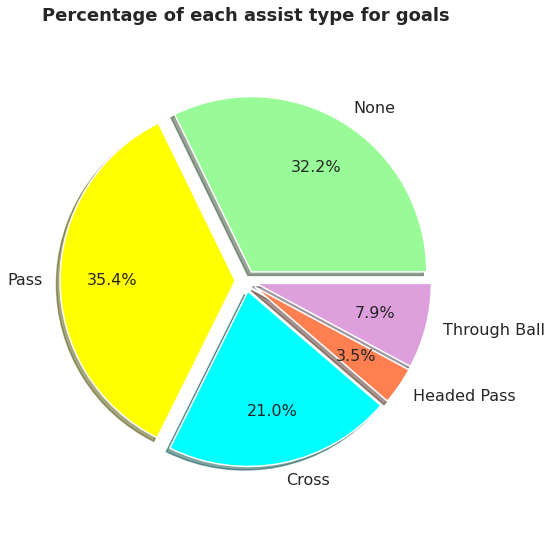

In [ ]:

fig, ax = plt.subplots(figsize=[8,8])
labels=["None","Pass","Cross","Headed Pass","Through Ball"]
sizes=[sum(goals["assist_method"]==0),sum(goals["assist_method"]==1),sum(goals["assist_method"]==2),sum(goals["assist_method"]==3),sum(goals["assist_method"]==4)]
colors=["palegreen","yellow","aqua","coral","plum"]
plt.pie(sizes, autopct="%.1f%%", labels=labels, explode=[0.06]*5, pctdistance=0.7, colors=colors, shadow=True, \
       textprops=dict(fontsize=16))
plt.axis('equal')
plt.title("Percentage of each assist type for goals",fontsize=18,fontweight="bold")
plt.tight_layout()
plt.show()


**Observations:**

*   About 35.4% of the goals have been assisted by direct passing
*   32.2% of the goals have "No" assist because they might be from penalties or direct free kicks



### **Analysing Yellow cards/Red cards**

In [ ]:
yel_card=events[events["event_type"]==4]
yel_card.shape

(39911, 22)

Text(0.5, 1.0, 'Number of yellow cards against Time during match')

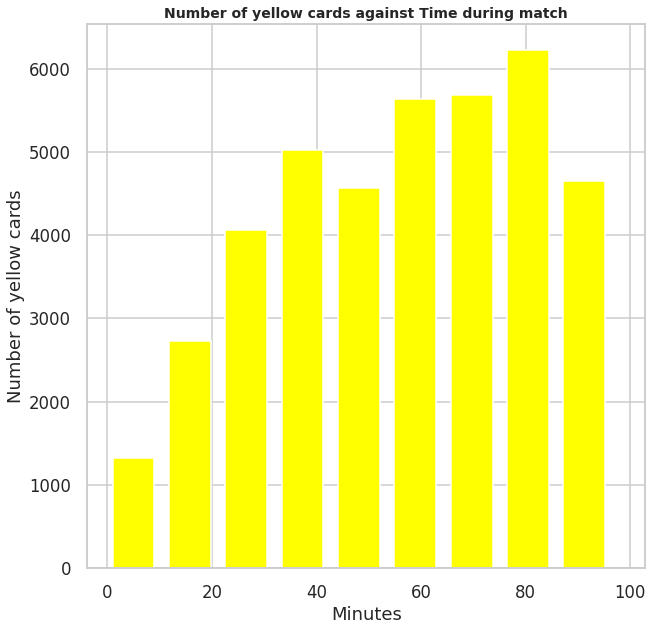

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(yel_card.time,width=8,bins=9,color="yellow")   
plt.xlabel("Minutes")
plt.ylabel("Number of yellow cards")
plt.title("Number of yellow cards against Time during match",fontsize=14,fontweight="bold")

In [ ]:
sec_yellow=events[events["event_type"]==5]
red=events[events["event_type"]==6]
reds=[sec_yellow,red]
red_cards=pd.concat(reds)
red_cards.event_type.unique()

array([5, 6])

Text(0.5, 1.0, 'Number of red cards against Time during match')

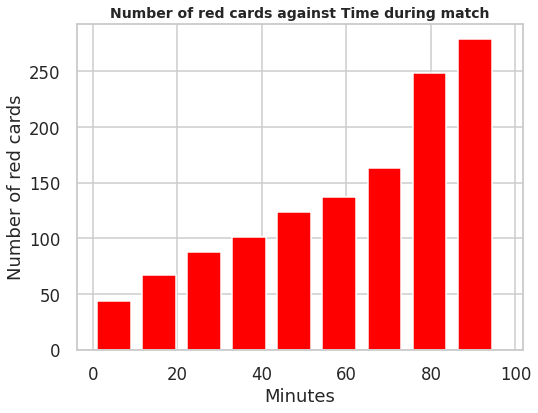

In [ ]:
fig=plt.figure(figsize=(8,6))
plt.hist(red_cards.time,width=8,bins=9,color="red")   
plt.xlabel("Minutes")
plt.ylabel("Number of red cards")
plt.title("Number of red cards against Time during match",fontsize=14,fontweight="bold")

In [ ]:
# common function to plot bar plots with following configuration
def barplot(data, x_ticks, x_labels, y_labels, title, color='muted', num=10, figsize=(12,6)):
    # set whitegrid as style
    sns.set_style("whitegrid")
    plt.figure(figsize=(num, figsize))
    # plot data
    bx = sns.barplot(x = [j for j in range(0, len(data))], y=data.values, palette=color)
    # set ticks 
    bx.set_xticks([j for j in range(0, len(data))])
    # set labels on the chart
    bx.set_xticklabels(x_ticks, rotation=45)
    bx.set(xlabel = x_labels, ylabel = y_labels, title = title)
    bx.plot();
    plt.tight_layout()

### **Which Teams are most offensive in the matches played?**

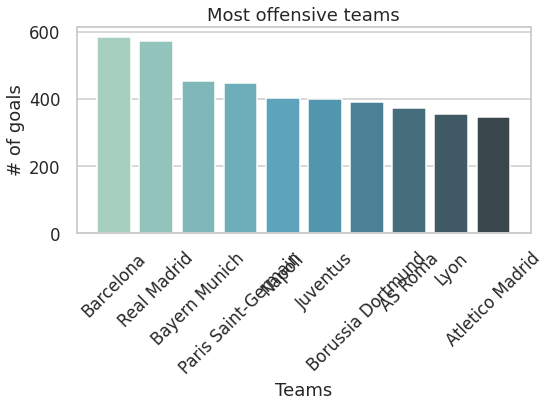

In [ ]:
# group attempts by team
group_by_offensive = events[events['is_goal']==1].groupby('event_team')

# sort the values grouped
group_by_offensive = group_by_offensive.count().sort_values(by='id_event', ascending=False)[:10]
teams = group_by_offensive.index
scores = group_by_offensive['id_event']

# plot the teams
barplot(scores, teams, 'Teams', '# of goals', 'Most offensive teams', 'GnBu_d', 8, 6)


### **Observations:**

### The above graph shows an interesting goal scores for the top teams. Barcelona tops this tally, rest of the teams also have scored good number of goals.

### **Which Players are most offensive in the Players in the league?**

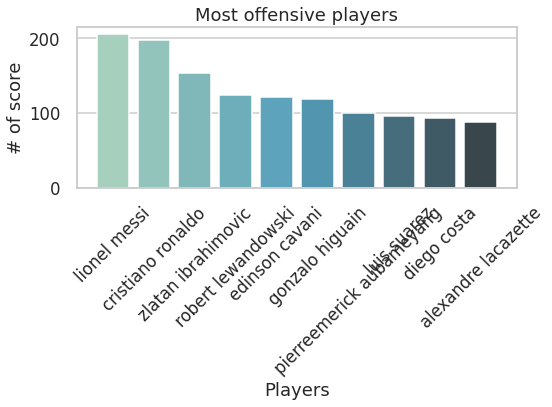

In [ ]:
# group by player if the goal is scored
group_by_player = events[events['is_goal']==1].groupby('player')

# count and sort the number of goals by player and pick top 10
group_by_offensive_player = group_by_player.count().sort_values(by='id_event',
                                                                                ascending=False)[:10]
# extract player names
players = group_by_offensive_player.index
# extract number of goals
scores = group_by_offensive_player['id_event']
# plot the graph
barplot(scores, players, 'Players', '# of score', 'Most offensive players', 'GnBu_d', 8, 6)

### **Observations:**
### Clearly Lionel Messi and Ronaldo are the most Offensive players in the top 10 most offensive teams in the league.



# **Data Preprocessing**

As a part of this we have used parameters such as events (fouls, attempts, ...), locations (midfield,wings,etc ...), assist methods (crosses,short passes ...), situations (different set pieces and open play) and involved body parts(both feet and head).

**Identify the unique values in each feature.**

In [ ]:
events.nunique()

id_odsp            9074
id_event         941009
sort_order          180
time                101
text             366076
event_type           11
event_type2           4
side                  2
event_team          142
opponent            142
player             6118
player2            5747
player_in          5093
player_out         4671
shot_place           13
shot_outcome          4
is_goal               2
location             19
bodypart              3
assist_method         5
situation             4
fast_break            2
dtype: int64

Counting all the required parameter and then group them based on teams


In [ ]:
goals=events[events['shot_outcome']==1] #1 is on target
goals=goals[goals['text'].apply(lambda x:'Goal' in x)]
goals.head(2)

id_odsp    id_event  sort_order  time                                               text  event_type  event_type2  side         event_team    opponent             player             player2 player_in player_out  shot_place  shot_outcome  is_goal  location  bodypart  assist_method  situation  fast_break
13  UFot0hit/  UFot0hit14          14    17  Goal!  Borussia Dortmund 1, Hamburg 0. Kevin G...           1         12.0     1  Borussia Dortmund  Hamburg SV  kevin grosskreutz         mario gotze       NaN        NaN         4.0           1.0        1       9.0       2.0              1        1.0           0
26  UFot0hit/  UFot0hit27          27    29  Goal!  Borussia Dortmund 2, Hamburg 0. Mario G...           1         12.0     1  Borussia Dortmund  Hamburg SV        mario gotze  robert lewandowski       NaN        NaN         5.0           1.0        1       3.0       1.0              1        1.0           0

In [ ]:
# select relevant feature from the dataset
teams=events[['id_odsp','event_team','event_type','location','assist_method','situation']]

**Combining the total count of yellow cards, total fouls, red cards, attempts, goals for the teams. Grouping them by the teams.**

In [ ]:
# yellow card count
yellow=(teams.groupby('event_team')['event_type'].apply(lambda x: (x==4).sum())
       +teams.groupby('event_team')['event_type'].apply(lambda x: (x==5).sum())) 
yellow.head(2)

event_team
AC Ajaccio    238
AC Milan      502
Name: event_type, dtype: int64

In [ ]:
# red card count
red=teams.groupby('event_team')['event_type'].apply(lambda x: (x==6).sum()) 
red.head(2)

event_team
AC Ajaccio    12
AC Milan      18
Name: event_type, dtype: int64

In [ ]:
# total foul count
foul=teams.groupby('event_team')['event_type'].apply(lambda x: (x==3).sum()) 
foul.head(2)

event_team
AC Ajaccio    1593
AC Milan      2677
Name: event_type, dtype: int64

In [ ]:
situation=teams.dropna().groupby('event_team')['situation'].value_counts()
situation.head(2)

event_team  situation
AC Ajaccio  1.0          913
            2.0           86
Name: situation, dtype: int64

In [ ]:
location=teams.dropna().groupby('event_team')['location'].value_counts()
location.head(2)

event_team  location
AC Ajaccio  15.0        457
            3.0         336
Name: location, dtype: int64

In [ ]:
assist_method=teams.dropna().groupby('event_team')['assist_method'].value_counts()
assist_method.head(2)

event_team  assist_method
AC Ajaccio  1                490
            0                344
Name: assist_method, dtype: int64

In [ ]:
nb_goals=goals.groupby('event_team')['event_team'].count()
nb_goals.head(2)

event_team
AC Ajaccio    110
AC Milan      320
Name: event_team, dtype: int64

In [ ]:
df=pd.concat([yellow,red,foul],axis=1)
df.columns=['yellow','red','foul']
df.head(2)

yellow  red  foul
event_team                   
AC Ajaccio     238   12  1593
AC Milan       502   18  2677

**Mapping the values of the mentioned columns with the dictinary options.**

In [ ]:
d=dict()
for var in ['situation','location','assist_method']:
    un=teams[var].unique().tolist()
    l=[]
    for i in un:
        sample=teams[teams[var]==i]
        l.append(sample.dropna().groupby('event_team')[var].count())
    d[var]=l


In [ ]:
df['team']=df.index
df['goals']=nb_goals
df

yellow  red  foul               team  goals
event_team                                                    
AC Ajaccio            238   12  1593         AC Ajaccio    110
AC Milan              502   18  2677           AC Milan    320
AJ Auxerre             89    3   558         AJ Auxerre     46
AS Monaco             243    8  1666          AS Monaco    228
AS Nancy Lorraine     160    7  1260  AS Nancy Lorraine     87
...                   ...  ...   ...                ...    ...
Villarreal            393    5  2045         Villarreal    203
Watford               130    4   725            Watford     64
Werder Bremen         375   10  2645      Werder Bremen    249
West Brom             230    6  1328          West Brom    134
West Ham              226   10  1271           West Ham    167

[142 rows x 5 columns]

In [ ]:
# breaking the below columns into seperate option columns
for var in ['situation','location','assist_method']:
    un=teams[var].unique().tolist()
    l=[]
    for i in range(len(un)):
        df[var+'_'+str(un[i])]=df['team'].map(d[var][i].to_dict())
df

yellow  red  foul               team  goals  situation_1.0  situation_nan  situation_3.0  situation_4.0  situation_2.0  location_9.0  location_nan  location_2.0  location_4.0  location_15.0  location_1.0  location_3.0  location_5.0  location_11.0  location_13.0  location_16.0  location_17.0  location_7.0  location_8.0  location_12.0  location_10.0  location_19.0  location_6.0  location_14.0  location_18.0  assist_method_1  assist_method_0  assist_method_2  assist_method_3  assist_method_4
event_team                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
AC Ajaccio            238   12  1593         AC Ajaccio    110            913            NaN             74             33             86            71           NaN           NaN           NaN            457           NaN           336           NaN             92             27           24.0           20.0           9.0          10.0             12             13            8.0           9.0             15            3.0              490              344              198               43             31.0
AC Milan              502   18  2677           AC Milan    320           2615            NaN            219             87            144           215           NaN           NaN           NaN           1465           NaN           784           NaN            256             93           23.0           19.0          28.0          35.0             29             34           22.0          10.0             51            1.0             1556              865              477               61            106.0
AJ Auxerre             89    3   558         AJ Auxerre     46            364            NaN             41             23             18            48           NaN           NaN           NaN            173           NaN           123           NaN             33             18            5.0            8.0           4.0           4.0             10             10            2.0           6.0              1            1.0              174              144               92               16             20.0
AS Monaco             243    8  1666          AS Monaco    228           1387            NaN            142             50             86           131           NaN           NaN           NaN            607           NaN           558           NaN            128             56           11.0            9.0          19.0          16.0             44             32           18.0           8.0             26            2.0              754              446              363               49             53.0
AS Nancy Lorraine     160    7  1260  AS Nancy Lorraine     87            874            NaN             86             29             69            85           NaN           NaN           NaN            502           NaN           261           NaN             82             28           17.0           16.0          11.0           4.0             14             15            4.0           7.0             10            2.0              523              267              193               42             33.0
...                   ...  ...   ...                ...    ...            ...            ...            ...            ...            ...           ...           ...           ...           ...            ...           ...           ...           ...            ...            ...            ...            ...           ...           ...            ...            ...            ...           ...            ...            ... 

In [ ]:
df.dropna(axis=1, how='all', inplace=True)
df.fillna(0, inplace=True)

**Identify the feature that has null values but keeping them for further processing.**

In [ ]:
df.isnull().sum()

yellow             0
red                0
foul               0
team               0
goals              0
situation_1.0      0
situation_3.0      0
situation_4.0      0
situation_2.0      0
location_9.0       0
location_15.0      0
location_3.0       0
location_11.0      0
location_13.0      0
location_16.0      0
location_17.0      0
location_7.0       0
location_8.0       0
location_12.0      0
location_10.0      0
location_19.0      0
location_6.0       0
location_14.0      0
location_18.0      0
assist_method_1    0
assist_method_0    0
assist_method_2    0
assist_method_3    0
assist_method_4    0
dtype: int64

**Remove all decimals in column names.**

In [ ]:
# get rid of all the decimal numbers in the column names
for col in df.columns:   
    if col.endswith('.0'):
        col1 = col.replace(".0", "")
    else:
        col1 = col
    df = df.rename(columns={col : col1})   

print(df.columns)

Index(['yellow', 'red', 'foul', 'team', 'goals', 'situation_1', 'situation_3',
       'situation_4', 'situation_2', 'location_9', 'location_15', 'location_3',
       'location_11', 'location_13', 'location_16', 'location_17',
       'location_7', 'location_8', 'location_12', 'location_10', 'location_19',
       'location_6', 'location_14', 'location_18', 'assist_method_1',
       'assist_method_0', 'assist_method_2', 'assist_method_3',
       'assist_method_4'],
      dtype='object')


**Read the Dictionary to decode all parameters and give meaningful columns names.**

In [ ]:
f = open(DICT_FILE_PATH, "r")

x = []
k = []
r = []
for lines in f:
    x.append(lines.split())

line_base = x[0][0]

for line in x:
    if len(line) > 1:        
        ll = ''
        for j in range(1, len(line)):
            if j < (len(line) - 1):
                ll = ll + line[j] + ' '
            else:
                ll = ll + line[j]
        k.append([line_base + '_' + line[0], ll])
                
    elif len(line) == 1:
        line_base = line[0]
print(k)

[['event_type_0', 'Announcement'], ['event_type_1', 'Attempt'], ['event_type_2', 'Corner'], ['event_type_3', 'Foul'], ['event_type_4', 'Yellow card'], ['event_type_5', 'Second yellow card'], ['event_type_6', 'Red card'], ['event_type_7', 'Substitution'], ['event_type_8', 'Free kick won'], ['event_type_9', 'Offside'], ['event_type_10', 'Hand ball'], ['event_type_11', 'Penalty conceded'], ['event_type2_12', 'Key Pass'], ['event_type2_13', 'Failed through ball'], ['event_type2_14', 'Sending off'], ['event_type2_15', 'Own goal'], ['side_1', 'Home'], ['side_2', 'Away'], ['shot_place_1', 'Bit too high'], ['shot_place_2', 'Blocked'], ['shot_place_3', 'Bottom left corner'], ['shot_place_4', 'Bottom right corner'], ['shot_place_5', 'Centre of the goal'], ['shot_place_6', 'High and wide'], ['shot_place_7', 'Hits the bar'], ['shot_place_8', 'Misses to the left'], ['shot_place_9', 'Misses to the right'], ['shot_place_10', 'Too high'], ['shot_place_11', 'Top centre of the goal'], ['shot_place_12', 

In [ ]:
i = 0
for col in k:    
    if col[0] in df.columns:   
      df= df.rename(columns={col[0] : col[1]})
    
print(df.columns)

Index(['yellow', 'red', 'foul', 'team', 'goals', 'Open play', 'Corner',
       'Free kick', 'Set piece', 'Left side of the box', 'Outside the box',
       'Centre of the box', 'Right side of the box', 'Very close range',
       'Long range', 'More than 35 yards', 'Difficult angle on the left',
       'Difficult angle on the right', 'Right side of the six yard box',
       'Left side of the six yard box', 'Not recorded',
       'Difficult angle and long range', 'Penalty spot', 'More than 40 yards',
       'Pass', 'None', 'Cross', 'Headed pass', 'Through ball'],
      dtype='object')


**Count games for each team (home and away) and normalize all features by the number of games.Merge event and game info datasets into one "data" dataset**

In [ ]:
game = info['ht'].value_counts() + info['at'].value_counts()
df['game'] = game
df.head()

yellow  red  foul               team  goals  Open play  Corner  Free kick  Set piece  Left side of the box  Outside the box  Centre of the box  Right side of the box  Very close range  Long range  More than 35 yards  Difficult angle on the left  Difficult angle on the right  Right side of the six yard box  Left side of the six yard box  Not recorded  Difficult angle and long range  Penalty spot  More than 40 yards  Pass  None  Cross  Headed pass  Through ball   game
event_team                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
AC Ajaccio            238   12  1593         AC Ajaccio    110        913      74         33         86                    71              457                336                     92                27        24.0                20.0                          9.0                          10.0                              12                             13           8.0                             9.0            15                 3.0   490   344    198           43          31.0  114.0
AC Milan              502   18  2677           AC Milan    320       2615     219         87        144                   215             1465                784                    256                93        23.0                19.0                         28.0                          35.0                              29                             34          22.0                            10.0            51                 1.0  1556   865    477           61         106.0  210.0
AJ Auxerre             89    3   558         AJ Auxerre     46        364      41         23         18                    48              173                123                     33                18         5.0                 8.0                          4.0                           4.0                              10                             10           2.0                             6.0             1                 1.0   174   144     92           16          20.0   38.0
AS Monaco             243    8  1666          AS Monaco    228       1387     142         50         86                   131              607                558                    128                56        11.0                 9.0                         19.0                          16.0                              44                             32          18.0                             8.0            26                 2.0   754   446    363           49          53.0  135.0
AS Nancy Lorraine     160    7  1260  AS Nancy Lorraine     87        874      86         29         69                    85              502                261                     82                28        17.0                16.0                         11.0                           4.0                              14                             15           4.0                             7.0            10                 2.0   523   267    193           42          33.0   96.0

**As different teams can have a different number of games, we will count games for each team (home and away) and normalize all features by the number of games.**

In [ ]:
for i in df.columns: 
    if (type(df[i][0]) == np.float64) | (type(df[i][0]) == np.int64):
        df[i] = df[i].div(game, axis=0)

In [ ]:
df.head()

yellow       red       foul               team     goals  Open play    Corner  Free kick  Set piece  Left side of the box  Outside the box  Centre of the box  Right side of the box  Very close range  Long range  More than 35 yards  Difficult angle on the left  Difficult angle on the right  Right side of the six yard box  Left side of the six yard box  Not recorded  Difficult angle and long range  Penalty spot  More than 40 yards      Pass      None     Cross  Headed pass  Through ball  game
event_team                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
AC Ajaccio         2.087719  0.105263  13.973684         AC Ajaccio  0.964912   8.008772  0.649123   0.289474   0.754386              0.622807         4.008772           2.947368               0.807018          0.236842    0.210526            0.175439                     0.078947                      0.087719                        0.105263                       0.114035      0.070175                        0.078947      0.131579            0.026316  4.298246  3.017544  1.736842     0.377193      0.271930   1.0
AC Milan           2.390476  0.085714  12.747619           AC Milan  1.523810  12.452381  1.042857   0.414286   0.685714              1.023810         6.976190           3.733333               1.219048          0.442857    0.109524            0.090476                     0.133333                      0.166667                        0.138095                       0.161905      0.104762                        0.047619      0.242857            0.004762  7.409524  4.119048  2.271429     0.290476      0.504762   1.0
AJ Auxerre         2.342105  0.078947  14.684211         AJ Auxerre  1.210526   9.578947  1.078947   0.605263   0.473684              1.263158         4.552632           3.236842               0.868421          0.473684    0.131579            0.210526                     0.105263                      0.105263                        0.263158                       0.263158      0.052632                        0.157895      0.026316            0.026316  4.578947  3.789474  2.421053     0.421053      0.526316   1.0
AS Monaco          1.800000  0.059259  12.340741          AS Monaco  1.688889  10.274074  1.051852   0.370370   0.637037              0.970370         4.496296           4.133333               0.948148          0.414815    0.081481            0.066667                     0.140741                      0.118519                        0.325926                       0.237037      0.133333                        0.059259      0.192593            0.014815  5.585185  3.303704  2.688889     0.362963      0.392593   1.0
AS Nancy Lorraine  1.666667  0.072917  13.125000  AS Nancy Lorraine  0.906250   9.104167  0.895833   0.302083   0.718750              0.885417         5.229167           2.718750               0.854167          0.291667    0.177083            0.166667                     0.114583                      0.041667                        0.145833                       0.156250      0.041667                        0.072917      0.104167            0.020833  5.447917  2.781250  2.010417     0.437500      0.343750   1.0

In [ ]:
df.isnull().sum()

yellow                            0
red                               0
foul                              0
team                              0
goals                             0
Open play                         0
Corner                            0
Free kick                         0
Set piece                         0
Left side of the box              0
Outside the box                   0
Centre of the box                 0
Right side of the box             0
Very close range                  0
Long range                        0
More than 35 yards                0
Difficult angle on the left       0
Difficult angle on the right      0
Right side of the six yard box    0
Left side of the six yard box     0
Not recorded                      0
Difficult angle and long range    0
Penalty spot                      0
More than 40 yards                0
Pass                              0
None                              0
Cross                             0
Headed pass                 

Again identify the unnecessary columns and drop them

In [ ]:
df.drop(['game'], axis=1, inplace=True)

**No point to distinguish Playing style by right or left, hence combining the same.**

In [ ]:
def column_sum(a,b):
    c = df[[a,b]].sum(axis=1)    
    df.drop([a,b], axis=1, inplace=True)
    return c    

In [ ]:
# merge columns since playing style is not distinguish by right from left.
df['Difficult angle'] = column_sum('Difficult angle on the left','Difficult angle on the right')
df['Side of the box'] = column_sum('Left side of the box','Right side of the box')
df['Side of the six yard box'] = column_sum('Left side of the six yard box','Right side of the six yard box')

**Rename the new features.**

In [ ]:
df.rename(columns={'yellow': 'Yellow Card'}, inplace = True) 
df.rename(columns={'red': 'Red Card'}, inplace = True) 
df.rename(columns={'foul': 'Foul'}, inplace = True) 
df.rename(columns={'goals': 'Goals'}, inplace = True) 

In [ ]:
df.shape

(142, 26)

# **Data Visualization - Mostly Features** 

**Univariate Analysis on each feature using Histogram**

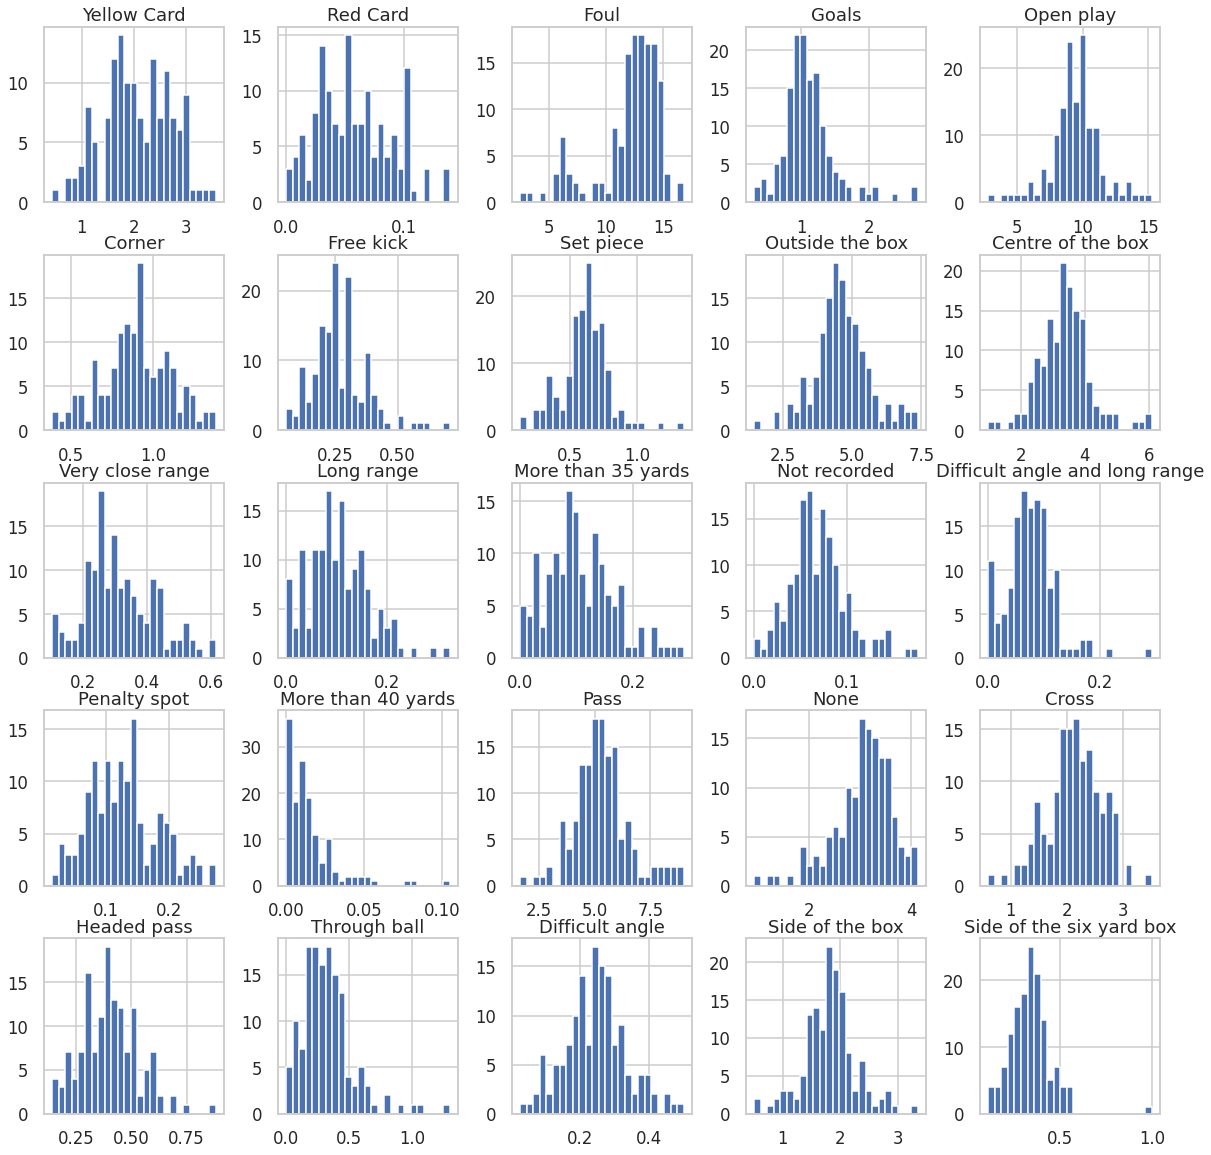

In [ ]:
df.hist(figsize=(20,20), bins=25);

**II. Correlation Plot - HeatMap between Features**

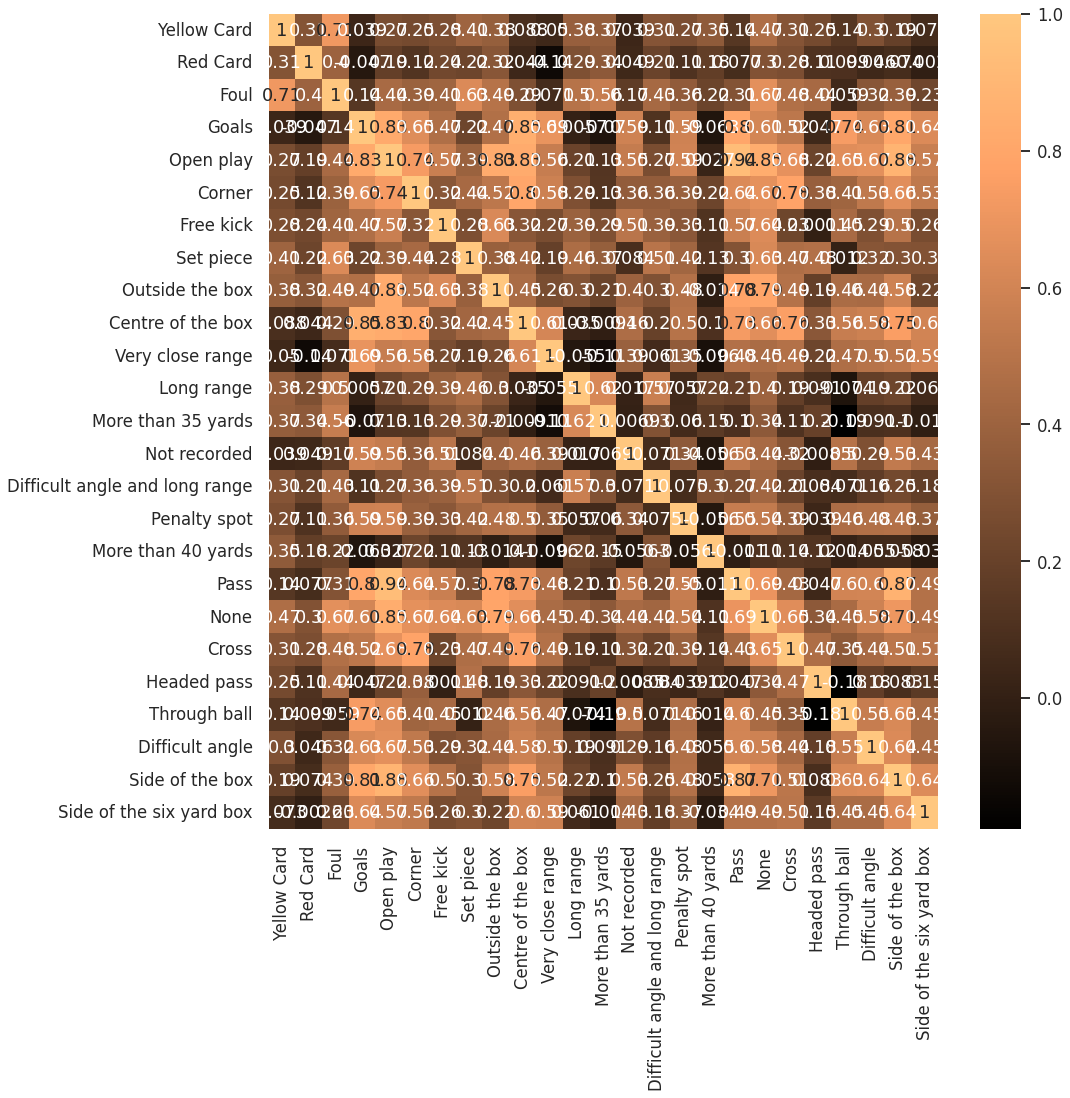

In [ ]:
correlation = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, cmap="copper", annot = True)
plt.show()


**From the above correlation matrix and using certain domain knowledge, we will pick Red Card, yellow Card and Foul.**



# **PCA**

In [ ]:
from sklearn.decomposition import PCA
features = df.copy()

In [ ]:
features.drop('team', axis=1, inplace=True)

In [ ]:
no_of_col = len(features.columns)

**Scaling and translating each feature individually  in the given range of 0 to 1 on the training set.**

In [ ]:
scalar = MinMaxScaler()
features_s = scalar.fit_transform(features)

***Run PCA on the data and reduce the dimensions in pca_num_components dimensions***

In [ ]:
pca = PCA()
pca = pca.fit(features_s)

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([3.93242869e-01, 1.61875870e-01, 7.04145771e-02, 5.29985554e-02,
       4.75488794e-02, 4.09634132e-02, 3.20521124e-02, 3.08786659e-02,
       2.66945899e-02, 2.53934811e-02, 1.88975780e-02, 1.84694561e-02,
       1.46529781e-02, 1.12269002e-02, 1.07517252e-02, 8.76662445e-03,
       8.09652224e-03, 7.10748317e-03, 6.21406288e-03, 5.53916166e-03,
       4.26085647e-03, 2.69223550e-03, 1.26140309e-03, 9.13504438e-33,
       5.97096537e-33])

In [ ]:
pca_df = pd.DataFrame({'variance':pca.explained_variance_ratio_[0:10],
             'Principal Component':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']})

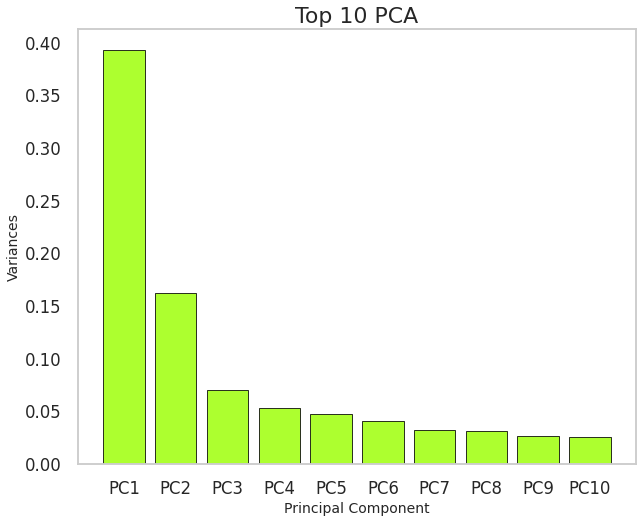

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(pca_df['Principal Component'], pca_df['variance'], color ='greenyellow',
        width = 0.8, edgecolor='black',linewidth= 0.8)
plt.title('Top 10 PCA', fontsize=22)
plt.xlabel('Principal Component', fontsize=14)
plt.ylabel('Variances', fontsize=14)

plt.grid()
plt.show()

In [ ]:
def Implement_PCA(n,df):
  pca = PCA(n_components=n)
  pca_data = pca.fit_transform(df)
  return pca_data

In [ ]:
pca_df_2 = Implement_PCA(2,features_s)


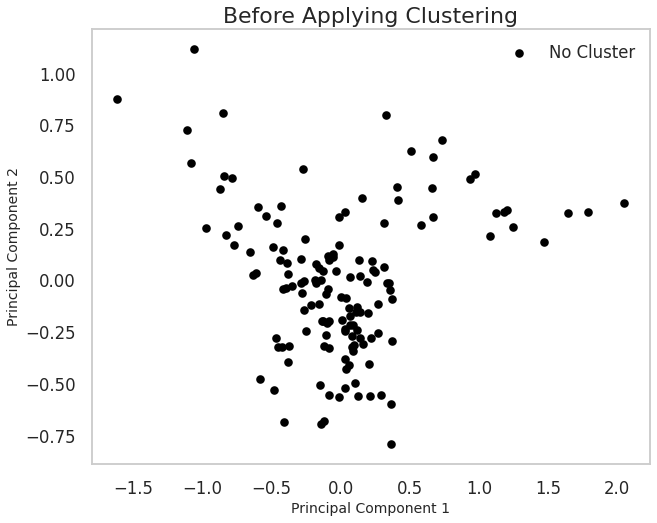

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(
   pca_df_2[:, 0], pca_df_2[:, 1],
   c='black', marker='o',
   edgecolor='black', s=50,
   label='No Cluster'
)
plt.title('Before Applying Clustering', fontsize=22)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

**Using PCA we will be loosing important features for clustering. Hence dropping PCA and performing clustering based on our Problem statement.**

# **Preparing data for Modelling.**

In [ ]:
X=df[['Red Card', 'Goals']]
col_names =['Red Card', 'Goals']

**Scaling and translating each feature individually  in the given range of 0 to 1 on the training set.**

In [ ]:
scalar = MinMaxScaler()
X[col_names] = scalar.fit_transform(X)


# **Clustering**

## **K-Means Clustering**

**Silhouette Analysis to find optimal number of cluster**

We have used the 2 features from the dataset to plot the elbow graph and Silhouette Score.

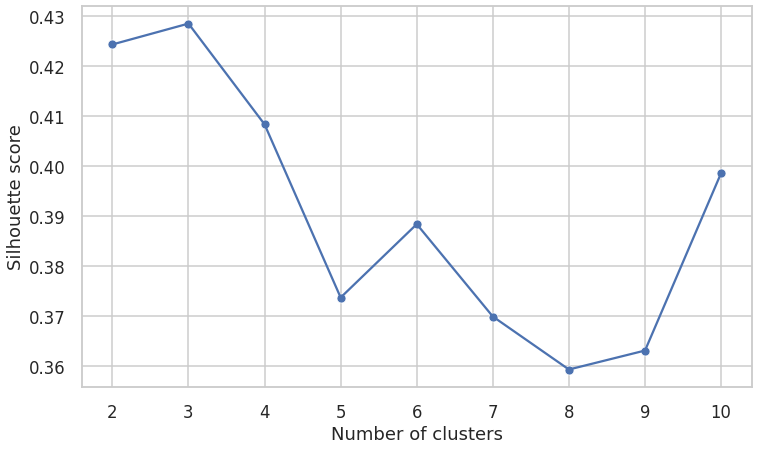

In [ ]:
# Calculating the Sillhoutte Score

silhouette_scores = []
number_of_cluster = range(2, 11)

for i in number_of_cluster:
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(X)

  labels = kmeans.labels_
  silhouette_scores.append(silhouette_score(X, labels, metric = 'euclidean', random_state=0))


# Plotting the Sillhoutte Score
plt.figure(figsize=(12,7))

sns.lineplot(number_of_cluster, silhouette_scores)
sns.scatterplot(number_of_cluster, silhouette_scores)

plt.xticks(number_of_cluster)

plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score');

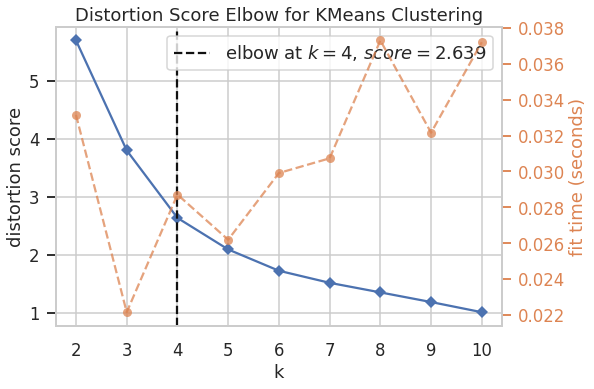

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,11))
 
visualizer.fit(X)        
visualizer.show()  ;     

**Optimal number of clusters is estimated to be 4**

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

X['cluster'] = kmeans.predict(X)
X;

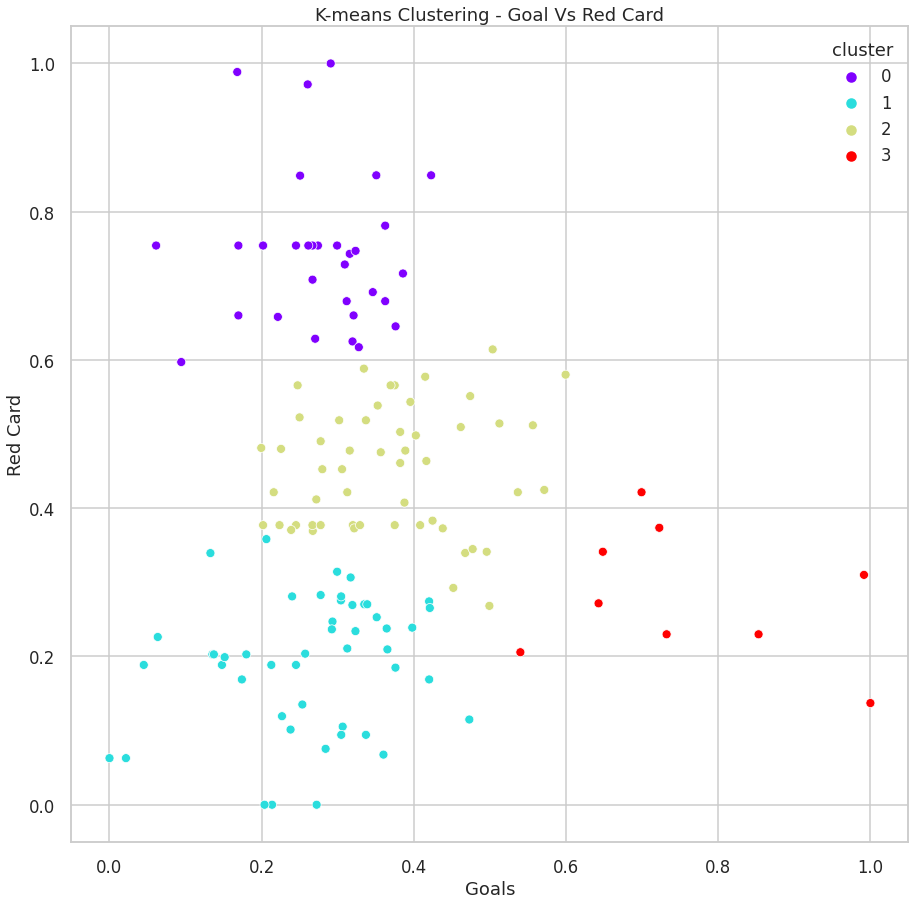

In [ ]:
sns.set_context('talk')
plt.figure(figsize=(15,15))
sns.scatterplot(x=X['Goals'],y=X['Red Card'],hue=X['cluster'], palette='rainbow')
plt.title('K-means Clustering - Goal Vs Red Card')
plt.show()

**From the above scatterplot, following clusters can be inferenced:-**

*   Cluster 0 - Team with Less Goal and Less Red Cards
*   Cluster 1 - Team with Average Goals and Average number of Red Cards
*   Cluster 2 - Teams with more Goals and less Red Cards - This indicates an Good Team
*   Cluster 3 - Teams with Less Goals but highest number of Red Cards. This team calls  for a special attention for a good coach.  

## **Hierarchical Clustering**

In [ ]:
Y = df[['Red Card', 'Goals']]
col_names =['Red Card', 'Goals']
from sklearn.preprocessing import normalize
data_scaled = normalize(Y)
data_scaled = pd.DataFrame(data_scaled, columns=Y.columns)
data_scaled.head()

Red Card     Goals
0  0.108448  0.994102
1  0.056161  0.998422
2  0.065079  0.997880
3  0.035066  0.999385
4  0.080201  0.996779

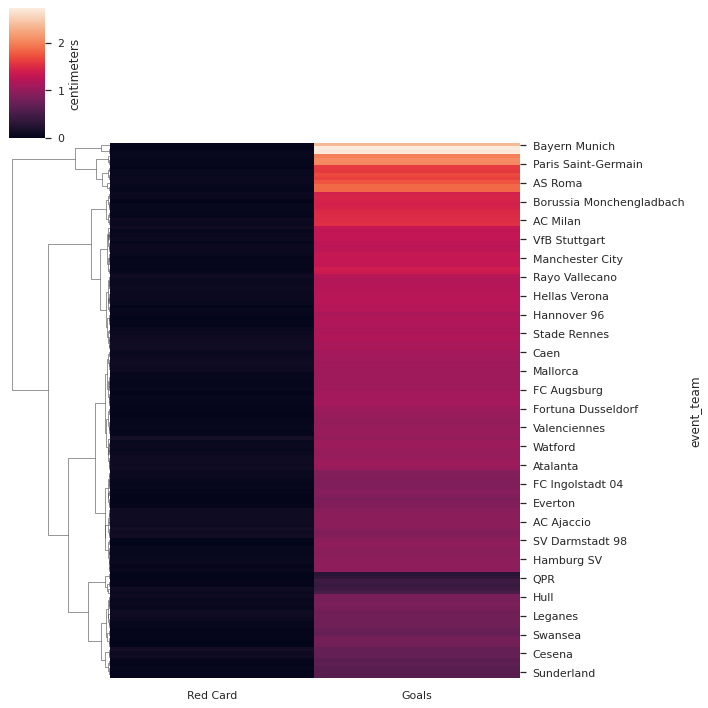

In [ ]:
import seaborn as sns; sns.set(color_codes=True)
sns.clustermap(Y, method="ward", col_cluster=False, cbar_kws={'label': 'centimeters'});

From the above heat map it can be infered tha we can create 4 clusters.

**Dendogram**

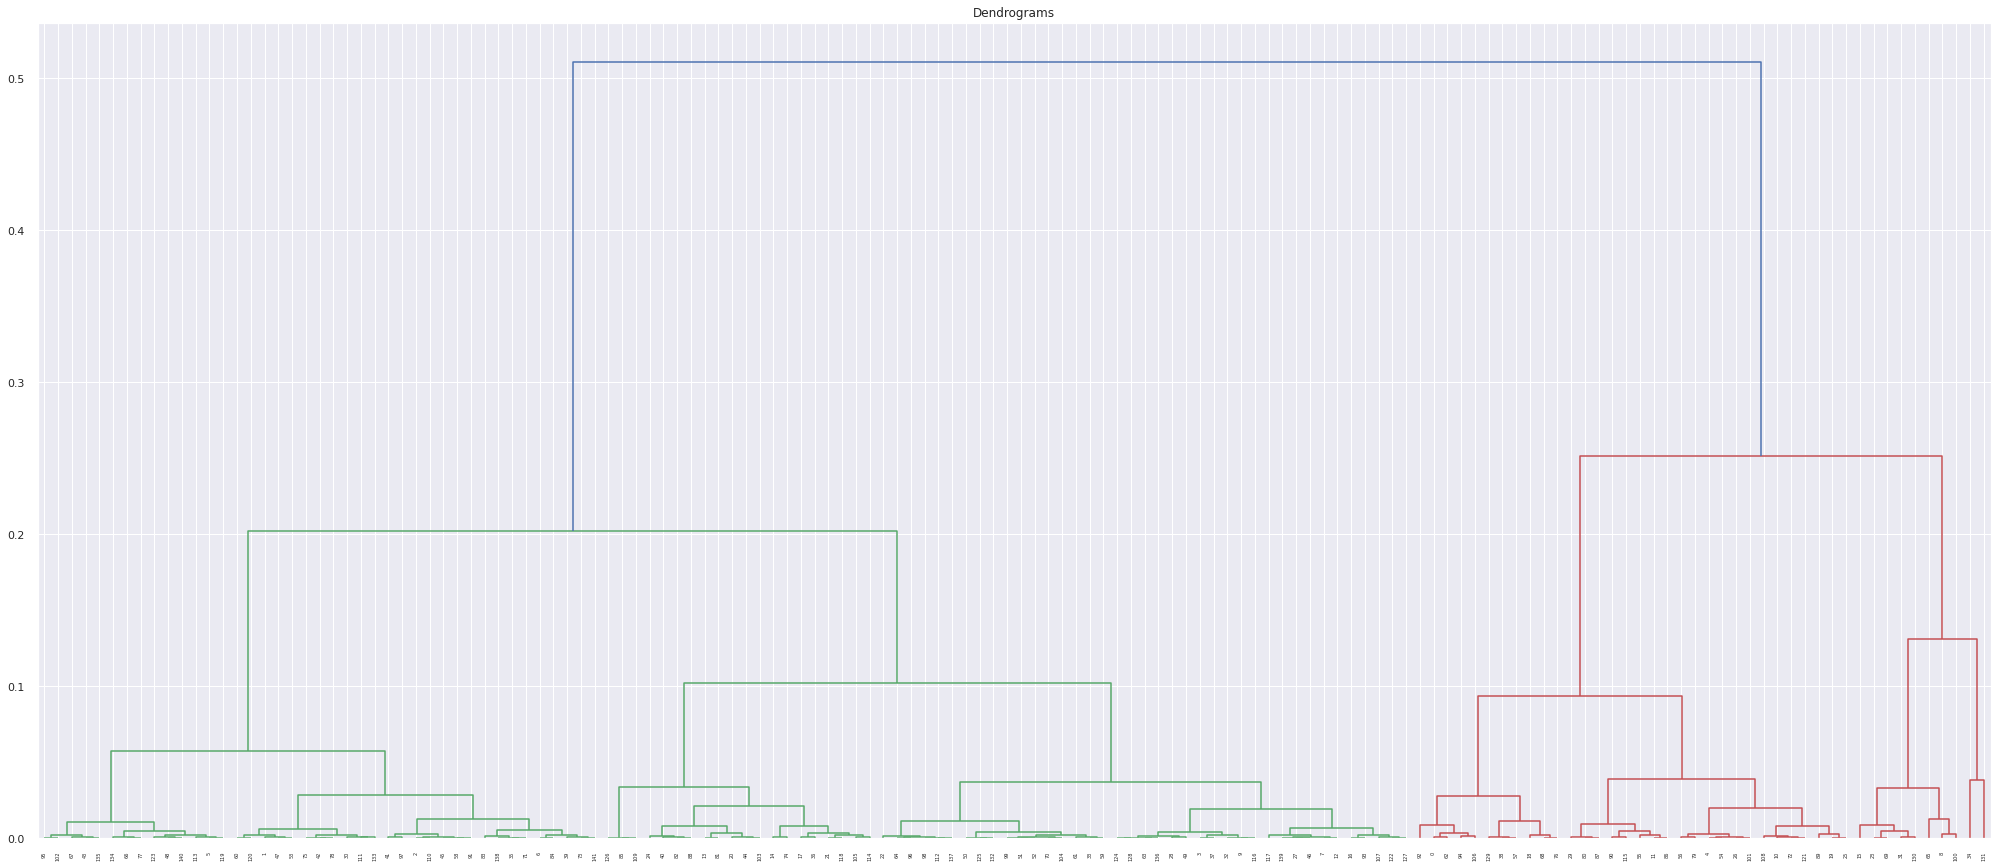

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(35, 15))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In the above graph the x-axis contains the sample and the y-axis contains the distance between each samples.



In [ ]:
# used Agglomerative Clustering with euclidean distance and created a distance matrix
from sklearn.cluster import AgglomerativeClustering
clusters = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
heir_cluster = clusters.fit_predict(data_scaled)
Y['heirarchical_cluster'] = heir_cluster

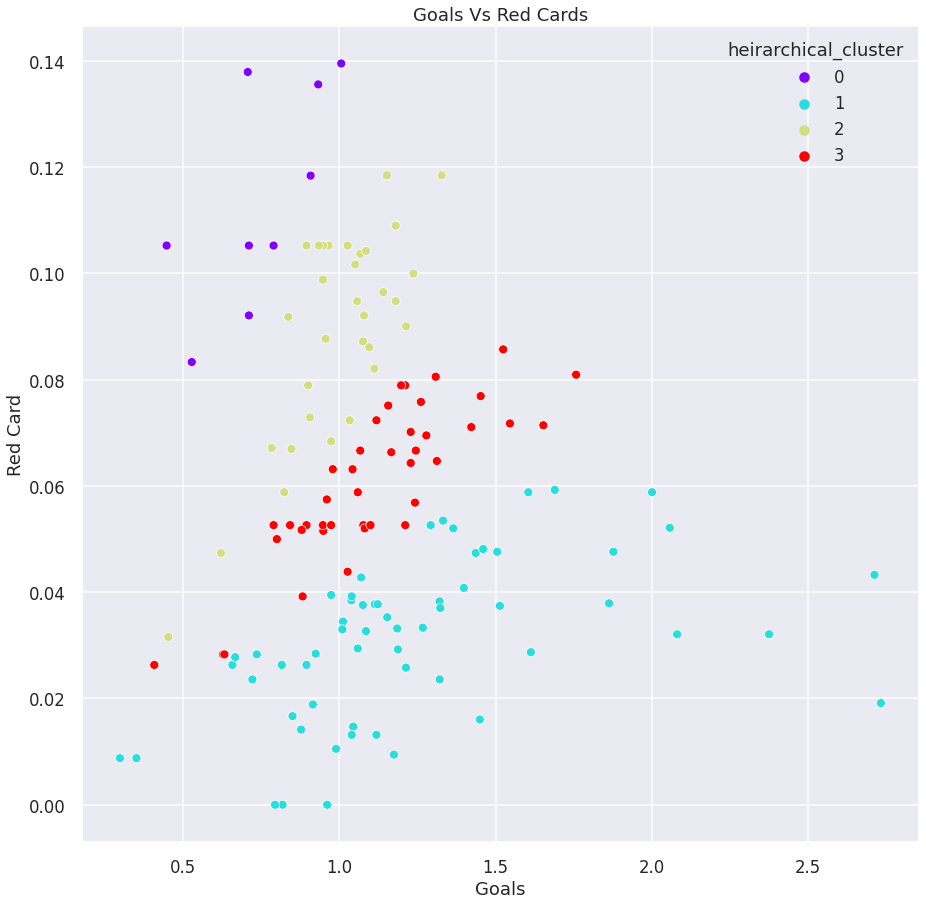

In [ ]:
sns.set_context('talk')
plt.figure(figsize=(15,15))
sns.scatterplot(x=Y['Goals'],y=Y['Red Card'],hue=Y['heirarchical_cluster'], palette='rainbow')
plt.title('Goals Vs Red Cards')
plt.show()

**Observation:**

1. Cluster 0 - Team with more fouls and average number of goals
2. Cluster 1 - Team with less fouls and more number of goals.These teams are suppose to be playing better then other teams.
3. Cluster 2 - Teams with less Goals and less number of fouls - This indicates the teams are not performing good in the matches.


# **Fractal Clustering**

## **Identify Top 2 Best Performing Soccer teams based on Goals scored and accumulated Red Cards.**

**Applying k-mean elbow method to check the number of clusters needed.**
**We have used the 2 features from the dataset to plot the elbow graph.**

In [ ]:
#from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score

In [ ]:
# common function to plot kmean clustering 
def plot_kmean(df, title):
  sns.set_context('talk')
  plt.figure(figsize=(15,15))
  sns.scatterplot(x=first_trial['Goals'],y=first_trial['Red Card'],hue=first_trial['cluster'], palette='rainbow')
  plt.title(title)
  plt.show()

In [ ]:
def plot_cluster( df, max_loops = 50):
  try :
    df.drop('kmeans_clust', axis=1, inplace=True)
  except:
    next
  
  X = df.iloc[:,1:]
  # Robust scalar is used to minimize the impact of marginal number of outliers on centering and scaling statics
#  rb = RobustScaler()
#  X_rb = rb.fit_transform(X)

  sse_within_cluster = {}
  silhoutte_score = {}


  for k in range(2, max_loops):
    kmeans= KMeans(n_clusters=k, random_state = 42, n_init=10)
    kmeans.fit(X)
    sse_within_cluster[k]= kmeans.inertia_
    silhoutte_score[k]= silhouette_score(X,kmeans.labels_,random_state=10)

  plt.figure(figsize=(15,25))
  ax1 = plt.subplot(311)
  plt.plot(list(sse_within_cluster.keys()),list(sse_within_cluster.values()))
  plt.xlabel("Number of Clusters")
  plt.ylabel("SSE within Clusters")
  plt.title("Within Cluster SSE after K-Means Clustering")
  plt.xticks([i for i in range(2,max_loops)],rotation=75)


  ax2 = plt.subplot(312)
  plt.plot(list(sse_within_cluster.keys()),list(sse_within_cluster.values()))
  plt.xlabel("Number of Clusters")
  plt.ylabel("silhouette Score")
  plt.title("silhouette Score after K-Means Clustering")
  plt.xticks([i for i in range(2,max_loops)],rotation=75)

  ax3 = plt.subplot(313)
  km = KMeans(n_clusters=k, random_state = 10, n_init=10)
  visualizer = KElbowVisualizer(km, k=(2,max_loops))
  visualizer.fit(X)        
  visualizer.show() 

  plt.subplots_adjust(top=0.92,bottom=0.08, left=0.15,right=0.95,hspace=0.5,wspace=0.35)


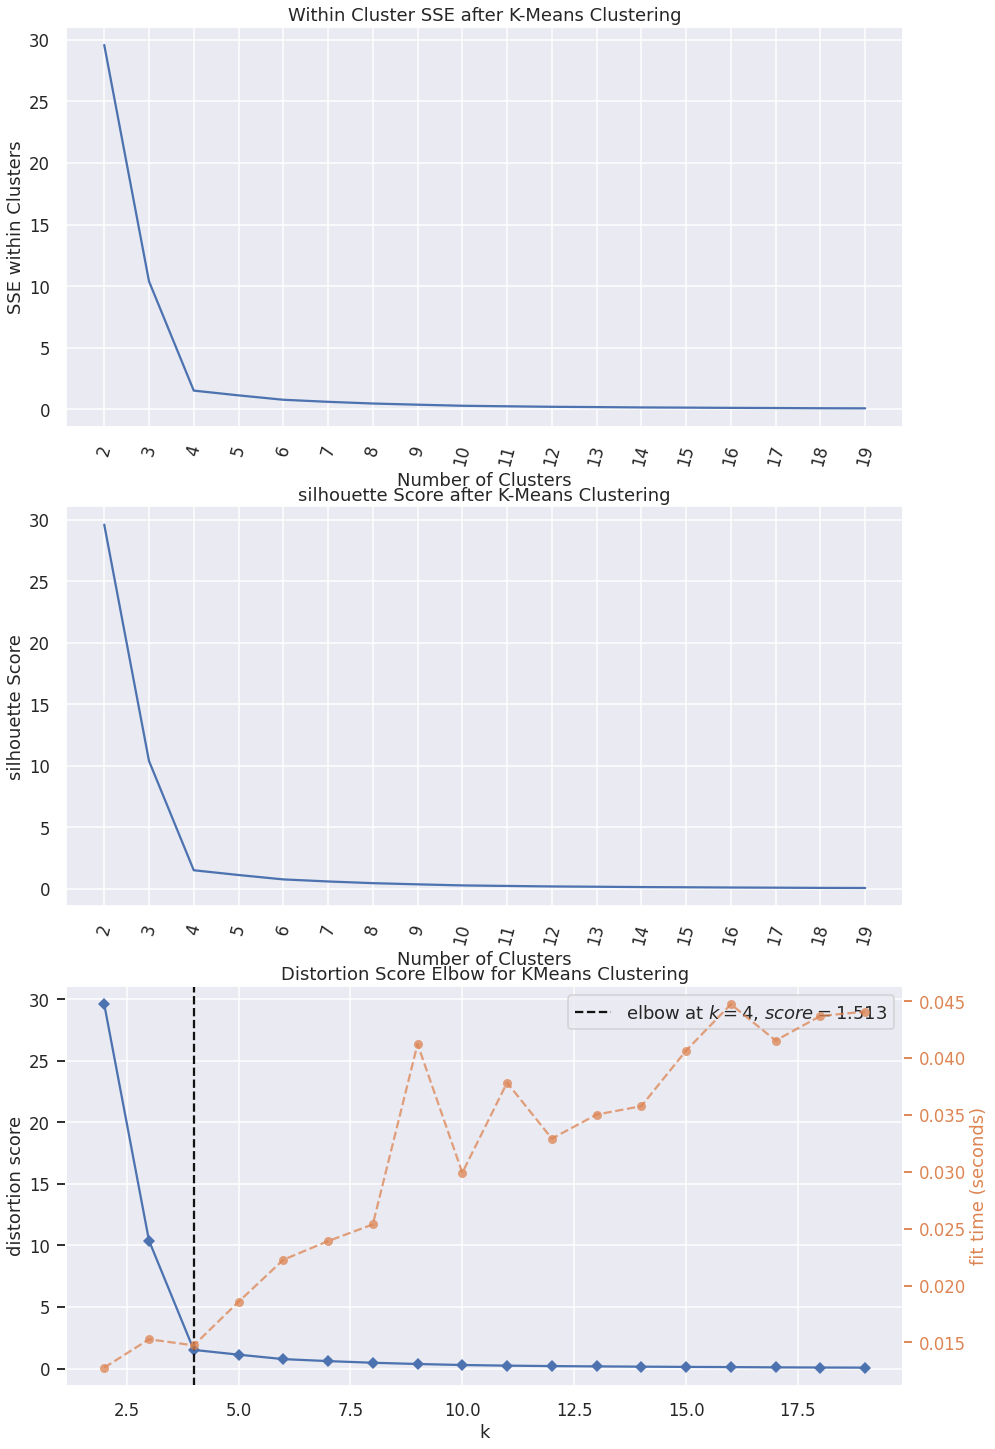

<Figure size 576x396 with 0 Axes>

In [ ]:
plot_cluster(X,20);

**From the above graphs, it is concluded that the optimal number of cluster is 4.**

In [ ]:
def apply_cluster(df, clusters=2):
  """ 
  Apply Kmenas with the optimal number of clusters identified
  """
  try :
    df.drop('kmeans_clust', axis=1, inplace=True)
  except:
    next
  
  X = df.iloc[:,1:]
  #rb = RobustScaler()
  #X_rb = rb.fit_transform(X)
  kmeans= KMeans(n_clusters=clusters, random_state = 42, n_init=10)
  kmeans.fit(X)
  score= silhouette_score(X,kmeans.labels_,random_state=10)
  df['cluster'] = kmeans.labels_
  sse_within_cluster =kmeans.inertia_

  print("Clustering Performance")
  print("-------------------------------")
  print("Silhoutte Score -", str(score.round(2)))
  print("SSE with clustering - " + str(sse_within_cluster))

  return df


### **First Kmean Clustering Iteration**

In [ ]:
first_trial = apply_cluster(X,clusters=4);

Clustering Performance
-------------------------------
Silhoutte Score - 0.88
SSE with clustering - 1.5133304790883502


In [ ]:
first_trial

Red Card     Goals  cluster
event_team                                    
AC Ajaccio         0.754386  0.273919        2
AC Milan           0.614286  0.503557        0
AJ Auxerre         0.565789  0.374836        0
AS Monaco          0.424691  0.571385        0
AS Nancy Lorraine  0.522569  0.249816        0
...                     ...       ...      ...
Villarreal         0.209552  0.365225        1
Watford            0.477778  0.315727        0
Werder Bremen      0.383244  0.424562        0
West Brom          0.202830  0.137163        1
West Ham           0.411877  0.271806        0

[142 rows x 3 columns]

**Shapey Ratio**

cluster_perf_df['GoalRedCardRatio'] = cluster_perf_df['Goals'] /cluster_perf_df['Red Card']

In [ ]:
cluster_perf_df = (
    first_trial
    .groupby('cluster')
    .agg({"Red Card":"mean", "Goals": "mean"})
    .sort_values('Goals')
    .reset_index()
)
#Shapey Ratio

cluster_perf_df['GoalRedCardRatio'] = cluster_perf_df['Goals'] /cluster_perf_df['Red Card']

cluster_perf_df

cluster  Red Card     Goals  GoalRedCardRatio
0        1  0.191795  0.263611          1.374436
1        2  0.745751  0.275178          0.368995
2        0  0.450181  0.366806          0.814796
3        3  0.280119  0.758846          2.709014

**From the above table, it is concluded that Cluster 3 have highest average Goals and least average Red Cards.**

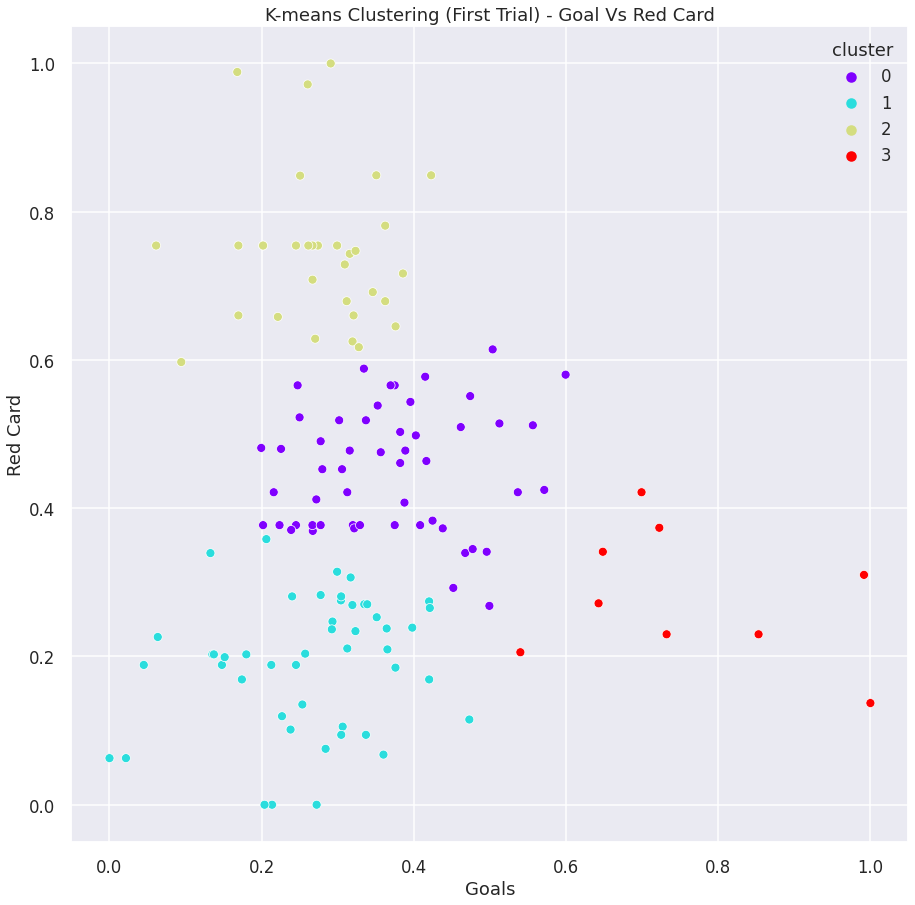

In [ ]:
# plot kmeans cluster
plot_kmean(first_trial, 'K-means Clustering (First Trial) - Goal Vs Red Card')

### **Second Kmean Clustering Iteration**

In [ ]:
second_trial_data = X.query("cluster == 3").reset_index(drop=True)

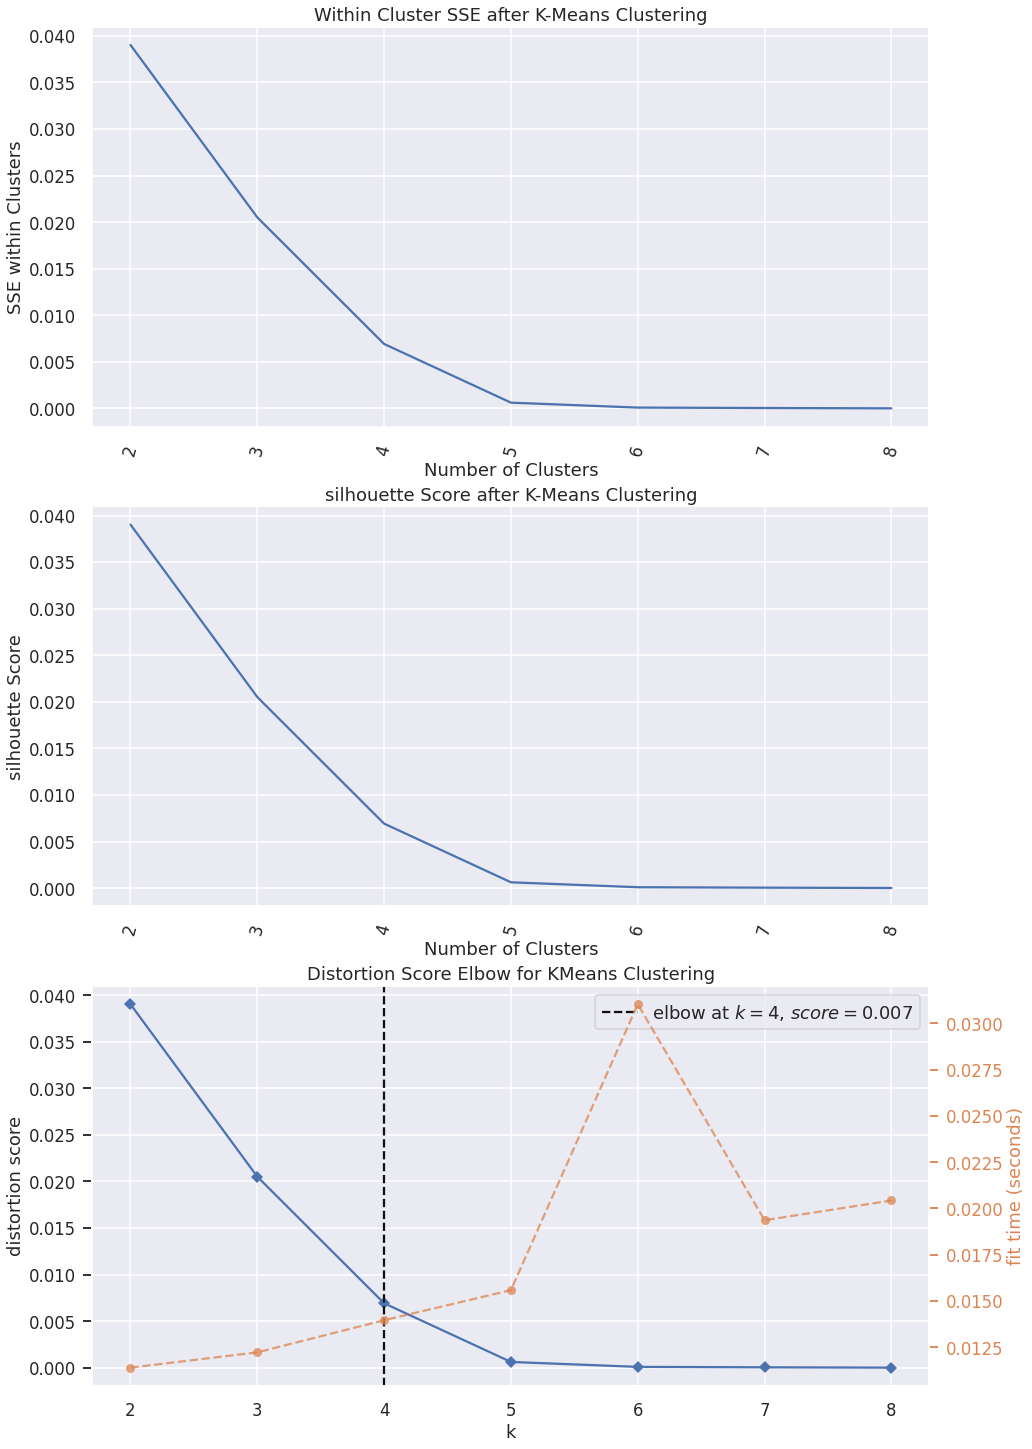

<Figure size 576x396 with 0 Axes>

In [ ]:
plot_cluster(second_trial_data, 9);

**From the above graphs, it is concluded that the optimal number of cluster is 4.**

In [ ]:
second_trial = apply_cluster(second_trial_data ,clusters=4)

Clustering Performance
-------------------------------
Silhoutte Score - 0.53
SSE with clustering - 0.006924121306424304


In [ ]:
cluster_perf_df = (
    second_trial
    .groupby('cluster')
    .agg({"Red Card":"mean", "Goals": "mean"})
    .sort_values('Goals')
    .reset_index()
)

cluster_perf_df['GoalRedCardRatio'] = cluster_perf_df['Goals'] /cluster_perf_df['Red Card']

cluster_perf_df

cluster  Red Card     Goals  GoalRedCardRatio
0        2  0.205742  0.539974          2.624524
1        0  0.327625  0.689010          2.103046
2        3  0.229947  0.853018          3.709638
3        1  0.223629  0.995785          4.452850

**From the above table, it is concluded that Cluster 1 have better average Goals and less average Red Cards.**

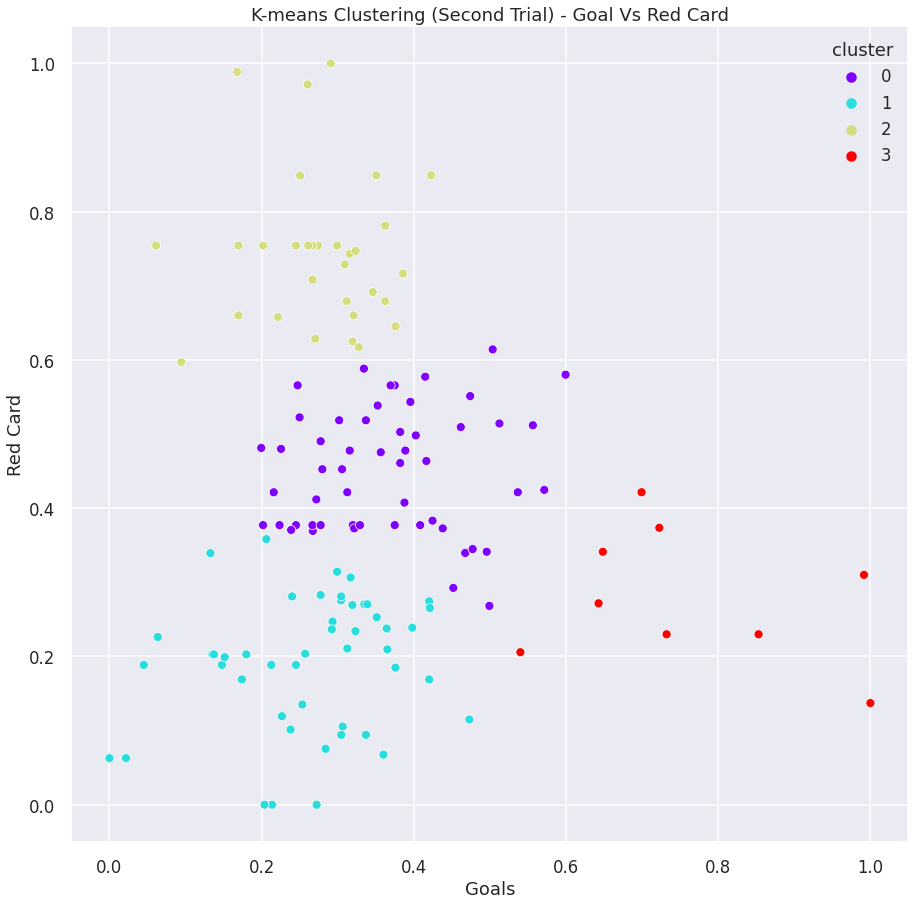

In [ ]:
# plot kmean for second trial
plot_kmean(second_trial, 'K-means Clustering (Second Trial) - Goal Vs Red Card')

### **Golden Cluster**

In [ ]:
third_trial_data = second_trial_data.query("cluster == 1").reset_index(drop=True)

In [ ]:
third_trial_data

Red Card     Goals  cluster
0  0.137161  1.000000        1
1  0.310096  0.991569        1

**From the above graph, it is clear the Cluster 3 are the best performing soccer teams that have less Red Card to Goal Ratio as compared to other identified clusters.**

## **Identify Worst Performing Soccer teams based on Goals scored and accumulated Red Cards.**

### **First Kmean Clustering Iteration**

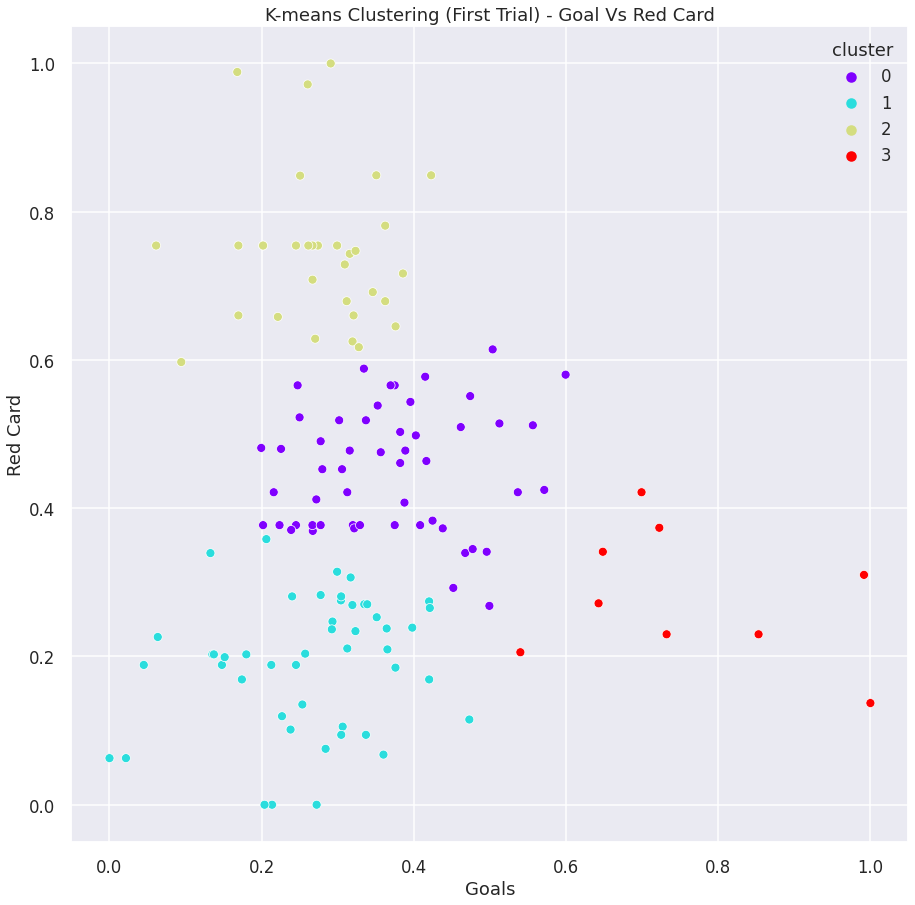

In [ ]:
# plot kmeans graph for first iteration data
plot_kmean(first_trial, 'K-means Clustering (First Trial) - Goal Vs Red Card')

**From the above graph, it is concluded that teams in Cluster 1 have scored least Goals and highest Red Cards.**

### **Second Kmean Clustering Iteration**

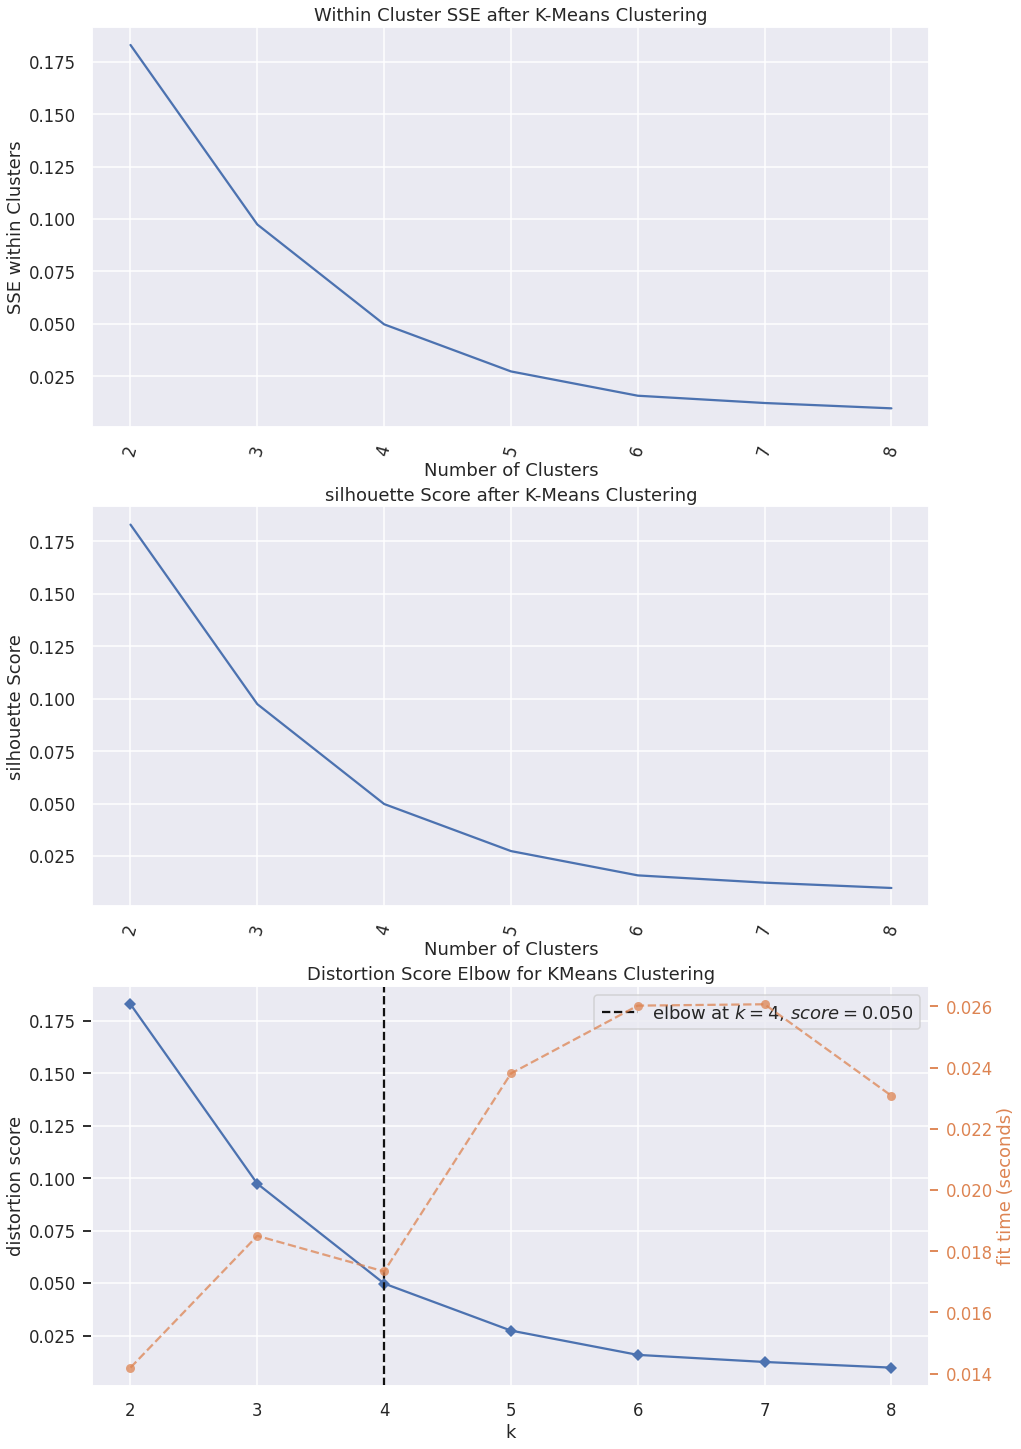

<Figure size 576x396 with 0 Axes>

In [ ]:
second_trial_data_1 = X.query("cluster == 1").reset_index(drop=True)

plot_cluster(second_trial_data_1, 9)

**From the above graphs, it is concluded that the optimal number of cluster is 4.**

In [ ]:
second_trial_1 = apply_cluster(second_trial_data_1 ,clusters=4)

Clustering Performance
-------------------------------
Silhoutte Score - 0.55
SSE with clustering - 0.049787793403798755


In [ ]:
cluster_perf_df = (
    second_trial_1
    .groupby('cluster')
    .agg({"Red Card":"mean", "Goals": "mean"})
    .sort_values('Goals')
    .reset_index()
)
cluster_perf_df['GoalRedCardRatio'] = cluster_perf_df['Goals'] /cluster_perf_df['Red Card']

cluster_perf_df

cluster  Red Card     Goals  GoalRedCardRatio
0        3  0.135161  0.032528          0.240660
1        1  0.180920  0.176737          0.976882
2        2  0.203593  0.293358          1.440902
3        0  0.201545  0.394847          1.959103

**From the above table, it is concluded that Cluster 3 have high Red Card to Goals ratio.**

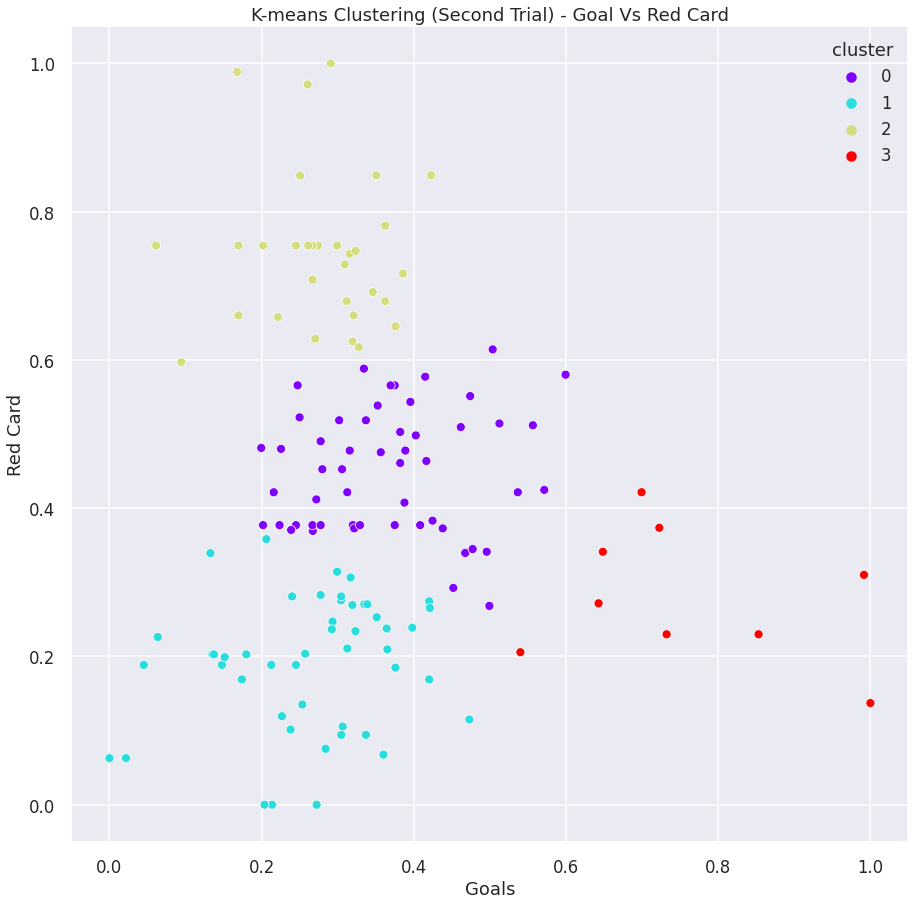

In [ ]:
# plot kmeans graph for second iteration data
plot_kmean(second_trial_1, 'K-means Clustering (Second Trial) - Goal Vs Red Card')

### **Golden Cluster**

In [ ]:
third_trial_data_1 = second_trial_1.query("cluster == 3").reset_index(drop=True)

third_trial_data_1

Red Card     Goals  cluster
0  0.226316  0.063434        3
1  0.062865  0.000000        3
2  0.188596  0.045052        3
3  0.062865  0.021625        3

**From the above graph, it is clear the Cluster 3 are the worst performing soccer teams that have High Red Card to Goal Ratio as compared to other identified clusters.**

# **Predict if a shot is goal or no goal**

## **Classifier with First Dataset**

### **Data Preparation**

### Adding columns such as country/league, date into game_events dataset. 

In [ ]:
from datetime import datetime
events = events.merge(info[['id_odsp', 'country', 'date']], on='id_odsp', how='left')
year = lambda x: datetime.strptime(x, "%Y-%m-%d").year
events['year'] = [year(x) for key, x in enumerate(events['date'])]

### Created a new dataframe which holds all the details of the shots.

In [ ]:
game_shots = events[events.event_type==1]
game_shots['player'] = game_shots['player'].str.title()
game_shots['player2'] = game_shots['player2'].str.title()
game_shots['country'] = game_shots['country'].str.title()

## **Data Visualization and Predict if the shot is a goal or no goal**

 We have visualized the shots placement by the player in the match.




In [ ]:
# collecting data for all kind of short placements in match
graph_bar = game_shots[['shot_place', 'id_event']].groupby('shot_place').count().reset_index().rename(columns={'id_event': 'count'})
graph_bar.shot_place = graph_bar.shot_place.astype(int)
graph_bar.shot_place = graph_bar.shot_place.replace({1: 'Bit too high', 2: 'Blocked', 3: 'Bottom left corner', 4: 'Bottom right corner', \
                                        5: 'Centre of the goal', 6: 'High and wide', 7: 'Hits the bar', 8: 'Misses to the left', \
                                        9: 'Misses to the right', 10: 'Too high', 11: 'Top centre of the goal', \
                                        12: 'Top left corner', 13: 'Top right corner'})

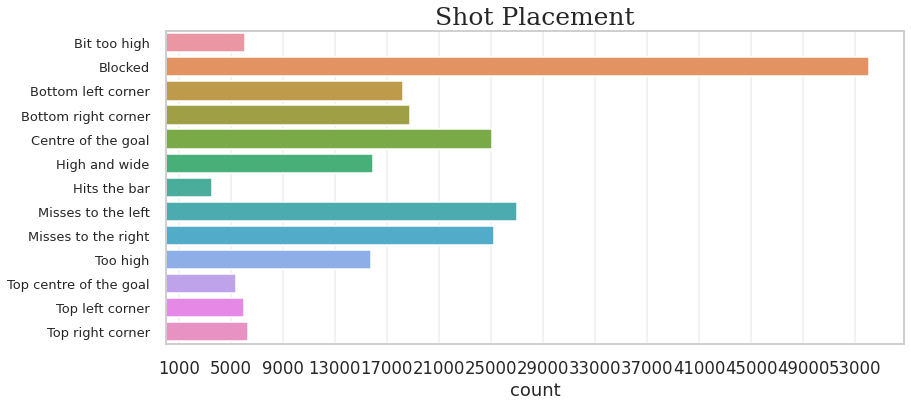

In [ ]:
# plot shot placement against their total count 
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=[13,6])
labels = graph_bar['shot_place']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax = sns.barplot(x=graph_bar['count'], y=labels)
ax.set_yticklabels(labels, size = 13)
ax.set_xticks(np.arange(1000,57000,4000))
ax.set_ylabel(ylabel='')
plt.title("Shot Placement", fontsize=25, fontfamily='serif')
plt.tight_layout()
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='x')
plt.show()

From the above plot we can see that maximum number of shots were blocked by the opponent.
From the part of the shots which were unblocked maximum shots were targeted in the centre and many of the shots were missed to the left and right sides. 

Lets visualise the percentage of shots which got converted into goals for different years in the league.

In [ ]:
game_goals  = game_shots[['is_goal', 'id_event', 'year']].groupby(['is_goal', 'year']).count().reset_index().rename(columns={'id_event': 'count'})
game_goals.is_goal = game_goals.is_goal.replace({1: 'Goal', 0: 'No Goal'})

In [ ]:
game_goals['percentage']=0
for i in range(len(game_goals)):
    for year in game_goals.year.unique():
        if game_goals.iloc[i,game_goals.columns.get_loc("year")]==year:
            game_goals.iloc[i,game_goals.columns.get_loc("percentage")]=game_goals.iloc[i,game_goals.columns.get_loc("count")] / \
                                                            game_goals[game_goals.year==year]['count'].sum()
game_goals['percentage']=round(game_goals['percentage']*100,2)

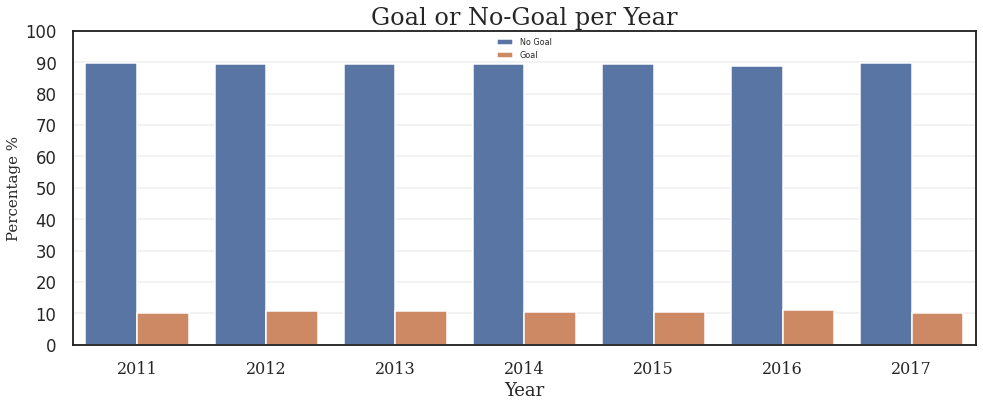

In [ ]:
# plot the percentage of goals against year
sns.set_style("white")
fig, ax = plt.subplots(figsize=[14,6])
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax = sns.barplot(data=game_goals, y='percentage', hue='is_goal', x='year')
ax.set_yticks(np.arange(0,110,10))
ax.set_ylabel(ylabel='Percentage %', fontsize=15, fontfamily='serif')
ax.set_xlabel(xlabel='Year', fontsize=18, fontfamily='serif')
ax.set_xticklabels(labels=ax.get_xticklabels(), fontsize=16, fontfamily='serif')
plt.title("Goal or No-Goal per Year", fontsize=24, fontfamily='serif')
plt.tight_layout()
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='y')
plt.legend(fontsize=8)
plt.show()

So again from the above graph the percentage of goals is almost same for the mentioned years. So it can be concluded that 1 out of every 9-10 shot is a goal no matter where it was shot.

Now I lets prepare the data for our Expected goal model. This model will evaluate how likely a shot is supposed to turn into a goal. I have divided data into 2 sets:
 For this 

1.   Y: the target variable Y set will include all the shots in the database irrespective of the fact that its a goal or not.
2.   X: It will include all necessary information we have in dataset for shots such as bodypart, location, situation, fast_break.

  

In [ ]:
# converting all categorical variable into binary dummies
df = pd.get_dummies(game_shots.iloc[:,-8:-3], columns=['location', 'bodypart','assist_method', 'situation'])
df.columns = ['fast_break', 'loc_centre_box', 'loc_diff_angle_lr', 'diff_angle_left', 'diff_angle_right',
                'left_side_box', 'left_side_6ybox', 'right_side_box', 'right_side_6ybox', 'close_range',
                'penalty', 'outside_box', 'long_range', 'more_35y', 'more_40y', 'not_recorded', 'right_foot', 
                'left_foot', 'header', 'no_assist', 'assist_pass', 'assist_cross', 'assist_header',
                'assist_through_ball', 'open_play', 'set_piece', 'corner', 'free_kick']
df['is_goal'] = game_shots['is_goal']

In [ ]:
print("Total number of shots",len(df))
print("Total number of goals",df.is_goal.sum())

Total number of shots 229135
Total number of goals 24441


## **Split dataset into training and testing**

In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=1)
x_train

fast_break  loc_centre_box  loc_diff_angle_lr  diff_angle_left  diff_angle_right  left_side_box  left_side_6ybox  right_side_box  right_side_6ybox  close_range  penalty  outside_box  long_range  more_35y  more_40y  not_recorded  right_foot  left_foot  header  no_assist  assist_pass  assist_cross  assist_header  assist_through_ball  open_play  set_piece  corner  free_kick
536019           0               1                  0                0                 0              0                0               0                 0            0        0            0           0         0         0             0           1          0       0          0            1             0              0                    0          1          0       0          0
241887           0               0                  0                0                 0              0                0               0                 0            0        0            1           0         0         0             0           0          1       0          0            1             0              0                    0          1          0       0          0
848312           0               0                  0                0                 0              0                0               0                 0            0        0            1           0         0         0             0           1          0       0          1            0             0              0                    0          1          0       0          0
463302           0               1                  0                0                 0              0                0               0                 0            0        0            0           0         0         0             0           0          0       1          1            0             0              0                    0          1          0       0          0
44032            0               0                  0                0                 0              0                0               0                 0            0        0            1           0         0         0             0           1          0       0          0            1             0              0                    0          1          0       0          0
...            ...             ...                ...              ...               ...            ...              ...             ...               ...          ...      ...          ...         ...       ...       ...           ...         ...        ...     ...        ...          ...           ...            ...                  ...        ...        ...     ...        ...
213888           0               0                  0                0                 0              0                0               0                 0            0        0            1           0         0         0             0           1          0       0          0            1             0              0                    0          1          0       0          0
940932           0               0                  0                0                 0              0                0               0                 0            0        0            1           0         0         0             0           1          0       0          0            1             0              0                    0          1          0       0          0
22359            0               1                  0                0                 0              0                0               0                 0            0        0            0           0         0         0             0           1          0       0          0            0             0              1                    0          1          0       0          0
857752           0               1                  0                0                 0              0                0               0                 0            0        0            

## **Gradient Boost Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, f1_score, precision_score, \
recall_score, cohen_kappa_score, classification_report,confusion_matrix
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

def evaluate_model_result(params): 
    model = GradientBoostingClassifier(
                        learning_rate=params['learning_rate'],
                        min_samples_leaf=params['min_samples_leaf'],
                        max_depth = params['max_depth'],
                        max_features = params['max_features']
                        )

    model.fit(x_train, y_train)
    return {
        'learning_rate': params['learning_rate'],
        'min_samples_leaf': params['min_samples_leaf'],
        'max_depth': params['max_depth'],
        'max_features': params['max_features'],
        'train_ROCAUC': roc_auc_score(y_train, model.predict_proba(x_train)[:, 1]),
        'test_ROCAUC': roc_auc_score(y_test, model.predict_proba(x_test)[:, 1]),
        'recall': recall_score(y_test, model.predict(x_test)),
        'precision': precision_score(y_test, model.predict(x_test)),
        'f1_score': f1_score(y_test, model.predict(x_test)),
        'train_accuracy': model.score(x_train, y_train),
        'test_accuracy': model.score(x_test, y_test),
    }

def objective(params):
    res = evaluate_model_result(params)
    
    res['loss'] = - res['test_ROCAUC'] 
    res['status'] = STATUS_OK 
    return res 

space_hyperparameter = {
        'learning_rate': hp.uniform('learning_rate', 0.05, 0.3),
        'min_samples_leaf': hp.choice('min_samples_leaf', range(15, 200)),
        'max_depth': hp.choice('max_depth', range(2, 20)),
        'max_features': hp.choice('max_features', range(3, 27))
}

In [ ]:
trials_val = Trials()
fmin(
    objective,
    space=space_hyperparameter,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials_val
);

100%|██████████| 50/50 [15:04<00:00, 18.09s/it, best loss: -0.8193766070409358]


In [ ]:
pd.DataFrame(trials_val.results).sort_values(by='f1_score', ascending=False).head(5)

learning_rate  min_samples_leaf  max_depth  max_features  train_ROCAUC  test_ROCAUC    recall  precision  f1_score  train_accuracy  test_accuracy      loss status
49       0.268203               171          4            18      0.817245     0.819288  0.267874   0.716803  0.390002        0.910412       0.911145 -0.819288     ok
38       0.050934                21         17            10      0.818899     0.818667  0.268462   0.712324  0.389956        0.910512       0.910933 -0.818667     ok
15       0.084051                33         11            23      0.818700     0.818843  0.268462   0.712324  0.389956        0.910553       0.910933 -0.818843     ok
45       0.191936                95         13            26      0.818818     0.818609  0.268109   0.714062  0.389844        0.910553       0.911008 -0.818609     ok
34       0.232572               100         18            12      0.818893     0.818563  0.267756   0.715138  0.389630        0.910526       0.911045 -0.818563     ok

From the above table it is clear that with hyperparameter I have got good results. It can also be concluded that there is no sign of overfitting that means the model will work for both test and training data.

## **Model Training**

In [ ]:
GBC_model = GradientBoostingClassifier(
                        learning_rate=0.285508,
                        min_samples_leaf=99,
                        max_depth = 19,
                        max_features = 27
                        )
GBC_model.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.285508, max_depth=19,
                           max_features=27, min_samples_leaf=99)

## **Check the accuracy of the model**

In [ ]:
print('Total example in test set {} (shots) of which {} are certainly (goals).'.format(len(y_test), y_test.sum()),'\n')
print('Classifying accuracy of whether a shot is goal or not is {}%.'.format(round(GBC_model.score(x_test, y_test)*100),2),'\n')
print('GBC classifier obtains an ROC-AUC of {}%'.format(round(roc_auc_score(y_test, GBC_model.predict_proba(x_test)[:, 1])*100),2), '\n')

Total example in test set 80198 (shots) of which 8504 are certainly (goals). 

Classifying accuracy of whether a shot is goal or not is 91%. 

GBC classifier obtains an ROC-AUC of 82% 



So we have acheived 91% accuracy of the prediction of correct goals. Also I have got promising ROC-AUC metric whic is 82%.

## **Confusion matrix**

In [ ]:
con_m=confusion_matrix(y_train,GBC_model.predict(x_train))
con_m=pd.DataFrame(con_m)
con_m.columns=["Predicted No Goals","Predicted Goals"]
con_m.index=["Actual No Goals","Actual Goals"]
print(con_m, '\n')
print(classification_report(y_test,GBC_model.predict(x_test)))

                 Predicted No Goals  Predicted Goals
Actual No Goals              131340             1660
Actual Goals                  11658             4279 

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     71694
           1       0.71      0.27      0.39      8504

    accuracy                           0.91     80198
   macro avg       0.82      0.63      0.67     80198
weighted avg       0.90      0.91      0.89     80198



**The confusion matrix is used to analyse the performance of the prediction. The results shows that the model performs much better for predicting if its not a goal.**

## **Logistic Regression**

In [ ]:
LR_model = LogisticRegression(max_iter=400)
LR_model.fit(x_train, y_train)

LogisticRegression(max_iter=400)

In [ ]:
print('Total example in test set {} (shots) of which {} are certainly (goals).'.format(len(y_test), y_test.sum()),'\n')
print('Classifying accuracy of whether a shot is goal or not is {}%.'.format(round(LR_model.score(x_test, y_test)*100),2),'\n')
print('Logistic Regression classifier obtains an ROC-AUC of {}%'.format(round(roc_auc_score(y_test, LR_model.predict_proba(x_test)[:, 1])*100),2),'\n')

Total example in test set 80198 (shots) of which 8504 are certainly (goals). 

Classifying accuracy of whether a shot is goal or not is 91%. 

Logistic Regression classifier obtains an ROC-AUC of 82% 



In [ ]:
con_m=confusion_matrix(y_train,LR_model.predict(x_train))
con_m=pd.DataFrame(con_m)
con_m.columns=["Predicted No Goals","Predicted Goals"]
con_m.index=["Actual No Goals","Actual Goals"]
print(con_m, '\n')
print(classification_report(y_test,LR_model.predict(x_test)))

                 Predicted No Goals  Predicted Goals
Actual No Goals              131414             1586
Actual Goals                  11785             4152 

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     71694
           1       0.72      0.26      0.39      8504

    accuracy                           0.91     80198
   macro avg       0.82      0.63      0.67     80198
weighted avg       0.90      0.91      0.89     80198



**We get almost same result as Gradient Boost.**

# **Lets predict the result of the match using data from game_info dataset.**

Here we are predicting whether the match is a draw, won by Home team or Away team using the Odd columns as described below.

### **Column: Odd**

Odds refers to the amount which one recieves when we bet 1 unit on the result. For instance, suppose the odds for a away win is 4, than the one who has bet on away win will get 4 unit per 1 unit.

In [ ]:
# function to predict odds
def pred_odds_result(odd_home,odd_draw,odd_away):
    if odd_home<odd_draw and odd_home<odd_draw:
        return("Home Win")
    elif odd_draw<odd_home and odd_draw<odd_away:
        return("Draw")
    elif odd_away<odd_draw and odd_away<odd_home:
        return("Away Win")

In [ ]:
# function returns actual result of match
def actual_result(fthg,ftag):
    if fthg>ftag:
        return("Home Win")
    elif fthg==ftag:
        return("Draw")
    elif fthg<ftag:
        return("Away Win")
    
def actual_result_encoder(fthg,ftag):
    if fthg>ftag:
        return (1)
    elif fthg==ftag:
        return (2)
    elif fthg<ftag:
        return (3)

In [ ]:
# compare chances of correct prediction by looking into the odds
def compare_pred(data):
    correct=0
    wrong=0
    for i in range(1,data.shape[0]+1):
        odd_home=data[i-1:i]["odd_h"].item()
        odd_draw=data[i-1:i]["odd_d"].item()
        odd_away=data[i-1:i]["odd_a"].item()
        fthg=data[i-1:i]["fthg"].item()
        ftag=data[i-1:i]["ftag"].item()
        odds_result=pred_odds_result(odd_home,odd_draw,odd_away)
        actresult=actual_result(fthg,ftag)
        if odds_result==actresult:
            correct+=1
        else:
            wrong+=1
    return(str("%.2f"%(correct/(correct+wrong)))+str("% correct"))

In [ ]:
compare_pred(info)

'0.53% correct'

**The above percentage shows that guessing the result based on the odds, would be right half of the time. So we want better indicator to improve this.**

### **Predicting results**

Lets try using the difference among the odds and odds for predicting the result of a match.

In [ ]:
x = info.iloc[:,9:14]
x.head()

fthg  ftag  odd_h  odd_d  odd_a
0     3     1   1.56   4.41   7.42
1     2     2   2.36   3.60   3.40
2     2     0   1.83   4.20   4.80
3     0     1   1.55   4.50   9.40
4     1     0   2.50   3.40   3.45

In [ ]:
x= info.iloc[:,9:14]
result=[]
for i in range(1, info.shape[0]+1):
    result.append(actual_result_encoder(info[i-1:i]["fthg"].item(),info[i-1:i]["ftag"].item()))
y=pd.DataFrame(result)
x["diff_h_d"]=abs(x["odd_h"]-x["odd_d"])
x["diff_d_a"]=abs(x["odd_d"]-x["odd_a"])
x["diff_h_a"]=abs(x["odd_h"]-x["odd_a"])
x=x.drop(["fthg","ftag"],axis=1)
x.tail()

odd_h  odd_d  odd_a  diff_h_d  diff_d_a  diff_h_a
10107   1.97   4.35    8.0      2.38      3.65      6.03
10108   1.19   8.50   20.0      7.31     11.50     18.81
10109   1.32   6.24   11.5      4.92      5.26     10.18
10110   1.74   4.07    5.9      2.33      1.83      4.16
10111   1.79   3.96    5.4      2.17      1.44      3.61



1.   Split data into training set and test set
2.   Apply cross validation



In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.model_selection import KFold

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

**Function to check the accuracy of the models.**

In [ ]:
def check_score(model):
    return np.mean(cross_val_score(model,x_train,y_train,cv=k_fold,scoring="accuracy"))

from sklearn.metrics import accuracy_score
def normalized_score(model):
    return (accuracy_score(y_train,model.predict(x_train)))

**Function to print the confusion matrix for each model.**

In [ ]:
from sklearn.metrics import confusion_matrix
def confusion_matrix_model_val(model_used):
    cm=confusion_matrix(y_train,model_used.predict(x_train))
    cm=pd.DataFrame(cm)
    cm.columns=["Predicted Home Win","Predicted Draw","Predicted Away Win"]
    cm.index=["Actual Home Win","Actual Draw","Actual Away Win"]
    return cm

### **Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Decision_tree=DecisionTreeClassifier()
Decision_tree.fit(x_train,y_train)
print('Decision Tree Regression Accuracy if its a Home, Away Win, Draw  is {}%.'.format(round(normalized_score(Decision_tree)*100),2),'\n')
confusion_matrix_model_val(Decision_tree)

Decision Tree Regression Accuracy if its a Home, Away Win, Draw  is 97%. 



Predicted Home Win  Predicted Draw  Predicted Away Win
Actual Home Win                3722               2                   0
Actual Draw                      89            1965                   0
Actual Away Win                  63              49                2199

**We have got good accuracy using Decision Tree Regressor for the result of the match.**

# **Amalgamation of Second Dataset**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder , MinMaxScaler , LabelEncoder
from sklearn.compose import  ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor , RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

from sklearn import linear_model, tree, ensemble
from sklearn.naive_bayes import GaussianNB
import xgboost
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import time

In [ ]:
#Scraping English Football dataset 
game_url_2018_2019 ="https://datahub.io/sports-data/english-premier-league/r/0.csv"
game_url_2017_2018 = "https://datahub.io/sports-data/english-premier-league/r/1.csv"
game_url_2016_2017 = "https://datahub.io/sports-data/english-premier-league/r/2.csv"
game_url_2015_2016 = "https://datahub.io/sports-data/english-premier-league/r/3.csv"
game_url_2014_2015 = "https://datahub.io/sports-data/english-premier-league/r/4.csv"
game_url_2013_2014 = "https://datahub.io/sports-data/english-premier-league/r/5.csv"
game_url_2012_2013 = "https://datahub.io/sports-data/english-premier-league/r/6.csv"
game_url_2011_2012 = "https://datahub.io/sports-data/english-premier-league/r/7.csv"
game_url_2010_2011 = "https://datahub.io/sports-data/english-premier-league/r/8.csv"
game_url_2009_2010 = "https://datahub.io/sports-data/english-premier-league/r/9.csv"

In [ ]:
data1 = pd.read_csv(game_url_2018_2019) 
data2 = pd.read_csv(game_url_2017_2018)
data3 = pd.read_csv(game_url_2016_2017)
data4 = pd.read_csv(game_url_2015_2016)
data5 = pd.read_csv(game_url_2014_2015)
data6 = pd.read_csv(game_url_2013_2014)
data7 = pd.read_csv(game_url_2012_2013)
data8 = pd.read_csv(game_url_2011_2012)
data9 = pd.read_csv(game_url_2010_2011)
data10 = pd.read_csv(game_url_2009_2010)

frames = [data1,data2,data3,data4,data5,data6,data7,data8,data9,data10]
e_data = pd.concat(frames,ignore_index=True)
e_data.head(10)

Div        Date      HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR     Referee  HS  AS  HST  AST  HF  AF  HC  AC  HY  AY  HR  AR  B365H  B365D  B365A   BWH   BWD    BWA   IWH   IWD    IWA   PSH   PSD    PSA   WHH   WHD    WHA   VCH  VCD    VCA  Bb1X2  BbMxH  BbAvH  BbMxD  BbAvD  BbMxA  BbAvA  BbOU  BbMx>2.5  BbAv>2.5  BbMx<2.5  BbAv<2.5  BbAH  BbAHh  BbMxAHH  BbAvAHH  BbMxAHA  BbAvAHA  PSCH  PSCD   PSCA  LBH  LBD  LBA  SJH  SJD  SJA  GBH  GBD  GBA  BSH  BSD  BSA  SBH  SBD  SBA
0  E0  10/08/2018    Man United       Leicester     2     1   H     1     0   H  A Marriner   8  13    6    4  11   8   2   5   2   1   0   0   1.57    3.9   7.50  1.53  4.00   7.50  1.55  3.80   7.00  1.58  3.93   7.50  1.57  3.80   6.00  1.57  4.0   7.00     39   1.60   1.56   4.20   3.92   8.05   7.06    38      2.12      2.03      1.85      1.79  17.0  -0.75     1.75     1.70     2.29     2.21  1.55  4.07   7.69  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1  E0  11/08/2018   Bournemouth         Cardiff     2     0   H     1     0   H    K Friend  12  10    4    1  11   9   7   4   1   1   0   0   1.90    3.6   4.50  1.90  3.40   4.40  1.90  3.50   4.10  1.89  3.63   4.58  1.91  3.50   4.00  1.87  3.6   4.75     39   1.93   1.88   3.71   3.53   4.75   4.37    38      2.05      1.98      1.92      1.83  20.0  -0.75     2.20     2.13     1.80     1.75  1.88  3.61   4.70  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2  E0  11/08/2018        Fulham  Crystal Palace     0     2   A     0     1   A      M Dean  15  10    6    9   9  11   5   5   1   2   0   0   2.50    3.4   3.00  2.45  3.30   2.95  2.40  3.30   2.95  2.50  3.46   3.00  2.45  3.30   2.80  2.50  3.4   3.00     39   2.60   2.47   3.49   3.35   3.05   2.92    38      2.00      1.95      1.96      1.87  22.0  -0.25     2.18     2.11     1.81     1.77  2.62  3.38   2.90  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3  E0  11/08/2018  Huddersfield         Chelsea     0     3   A     0     2   A  C Kavanagh   6  13    1    4   9   8   2   5   2   1   0   0   6.50    4.0   1.61  6.25  3.90   1.57  6.20  4.00   1.55  6.41  4.02   1.62  5.80  3.90   1.57  6.50  4.0   1.62     38   6.85   6.09   4.07   3.90   1.66   1.61    37      2.05      1.98      1.90      1.84  23.0   1.00     1.84     1.80     2.13     2.06  7.24  3.95   1.58  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4  E0  11/08/2018     Newcastle       Tottenham     1     2   A     1     2   A  M Atkinson  15  15    2    5  11  12   3   5   2   2   0   0   3.90    3.5   2.04  3.80  3.50   2.00  3.70  3.35   2.05  3.83  3.57   2.08  3.80  3.20   2.05  3.90  3.4   2.10     39   4.01   3.83   3.57   3.40   2.12   2.05    38      2.10      2.01      1.88      1.81  20.0   0.25     2.20     2.12     1.80     1.76  4.74  3.53   1.89  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
5  E0  11/08/2018       Watford        Brighton     2     0   H     1     0   H      J Moss  19   6    5    0  10  16   8   2   2   2   0   0   2.37    3.2   3.40  2.35  3.10   3.30  2.20  3.30   3.40  2.43  3.22   3.33  2.38  3.00   3.30  2.40  3.2   3.40     39   2.48   2.36   3.30   3.14   3.42   3.31    37      2.46      2.35      1.67      1.59  22.0  -0.25     2.07     2.01     1.90     1.86  2.58  3.08   3.22  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
6  E0  11/08/2018        Wolves         Everton     2     2   D     1     1   D    C Pawson  11   6    4    5   8   7   3   6   0   1   0   1   2.37    3.3   3.30  2.35  3.20   3.20  2.25  3.35   3.20  2.36  3.40   3.28  2.30  3.20   3.20  2.38  3.3   3.30     38   2.41   2.33   3.40   3.27   3.40   3.23    36      2.20      2.09      1.83      1.75  22.0  -0.25     2.04     1.98     1.92     1.88  2.44  3.23   3.32  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
7  E0  12/08/2018       Arsenal        Man

## **Amalgamation of new dataset by Scrapping**

In [ ]:
#Scraping Spanish Football dataset 
game_url_2018_2019 ="https://datahub.io/sports-data/spanish-la-liga/r/0.csv"
game_url_2017_2018 = "https://datahub.io/sports-data/spanish-la-liga/r/1.csv"
game_url_2016_2017 = "https://datahub.io/sports-data/spanish-la-liga/r/2.csv"
game_url_2015_2016 = "https://datahub.io/sports-data/spanish-la-liga/r/3.csv"
game_url_2014_2015 = "https://datahub.io/sports-data/spanish-la-liga/r/4.csv"
game_url_2013_2014 = "https://datahub.io/sports-data/spanish-la-liga/r/5.csv"
game_url_2012_2013 = "https://datahub.io/sports-data/spanish-la-liga/r/6.csv"
game_url_2011_2012 = "https://datahub.io/sports-data/spanish-la-liga/r/7.csv"
game_url_2010_2011 = "https://datahub.io/sports-data/spanish-la-liga/r/8.csv"
game_url_2009_2010 = "https://datahub.io/sports-data/spanish-la-liga/r/9.csv"


In [ ]:
data1 = pd.read_csv(game_url_2018_2019) 
data2 = pd.read_csv(game_url_2017_2018)
data3 = pd.read_csv(game_url_2016_2017)
data4 = pd.read_csv(game_url_2015_2016)
data5 = pd.read_csv(game_url_2014_2015)
data6 = pd.read_csv(game_url_2013_2014)
data7 = pd.read_csv(game_url_2012_2013)
data8 = pd.read_csv(game_url_2011_2012)
data9 = pd.read_csv(game_url_2010_2011)
data10 = pd.read_csv(game_url_2009_2010)

frames = [data1,data2,data3,data4,data5,data6,data7,data8,data9,data10]
sdata = pd.concat(frames,ignore_index=True)
sdata.head(10)

Div        Date     HomeTeam    AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  HS  AS  HST  AST  HF  AF  HC  AC  HY  AY  HR  AR  B365H  B365D  B365A   BWH    BWD    BWA   IWH   IWD    IWA   PSH    PSD    PSA   WHH  WHD    WHA   VCH   VCD    VCA  Bb1X2  BbMxH  BbAvH  BbMxD  BbAvD  BbMxA  BbAvA  BbOU  BbMx>2.5  BbAv>2.5  BbMx<2.5  BbAv<2.5  BbAH  BbAHh  BbMxAHH  BbAvAHH  BbMxAHA  BbAvAHA  PSCH   PSCD   PSCA  LBH  LBD  LBA  SJH  SJD  SJA  GBH  GBD  GBA  BSH  BSD  BSA  SBH  SBD  SBA
0  SP1  17/08/2018        Betis     Levante     0     3   A     0     1   A  22   6    8    4  10  10   5   3   0   2   0   0   1.66   4.00   5.00  1.70   3.70   5.25  1.75  3.60   4.90  1.69   4.19   5.11  1.67  3.9   4.75  1.67   4.2   5.20     40   1.75   1.68   4.25   4.00   5.25   4.95    38      1.82      1.76      2.15      2.06  20.0  -0.75     1.89     1.85     2.07     2.00  1.59   4.42   5.89  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1  SP1  17/08/2018       Girona  Valladolid     0     0   D     0     0   D  13   2    1    1  21  20   3   2   1   1   0   0   1.75   3.60   5.00  1.75   3.50   5.25  1.80  3.60   4.50  1.80   3.70   4.99  1.75  3.6   4.60  1.80   3.7   4.80     40   1.85   1.78   3.83   3.60   5.27   4.79    38      2.21      2.13      1.78      1.71  20.0  -0.75     2.06     2.01     1.90     1.85  1.76   3.57   5.62  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2  SP1  18/08/2018    Barcelona      Alaves     3     0   H     0     0   D  25   3    9    0   6  13   7   1   0   2   0   0   1.11  10.00  21.00  1.11  10.00  20.00  1.12  9.00  20.00  1.11  11.27  25.40  1.08  9.0  29.00  1.10  10.5  34.00     40   1.13   1.10  11.50   9.82  41.00  25.67    32      1.39      1.34      3.40      3.18  19.0  -2.50     1.95     1.91     2.00     1.95  1.10  11.85  32.17  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3  SP1  18/08/2018        Celta     Espanol     1     1   D     0     1   A  12  14    2    5  13  14   8   7   3   2   0   0   1.85   3.50   4.50  1.91   3.40   4.25  1.90  3.50   4.10  1.93   3.64   4.27  1.91  3.5   4.00  1.93   3.5   4.40     38   1.97   1.90   3.73   3.53   4.50   4.20    36      2.13      2.06      1.84      1.76  18.0  -0.75     2.26     2.18     1.74     1.71  2.18   3.26   3.85  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4  SP1  18/08/2018   Villarreal    Sociedad     1     2   A     1     1   D  16   8    7    4  16  10   4   6   2   3   0   0   2.04   3.40   3.80  2.05   3.30   3.90  2.00  3.40   3.80  2.06   3.51   3.91  2.05  3.3   3.60  2.05   3.5   3.90     40   2.11   2.03   3.62   3.43   3.93   3.76    37      2.05      1.99      1.88      1.81  18.0  -0.25     1.76     1.74     2.23     2.14  2.32   3.21   3.53  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
5  SP1  19/08/2018        Eibar      Huesca     1     2   A     0     2   A  18   8    6    6  12  13   7   0   1   1   0   0   1.66   3.75   5.50  1.70   3.70   5.25  1.70  3.75   5.00  1.72   3.90   5.26  1.73  3.6   4.75  1.70   3.8   5.00     40   1.76   1.70   3.93   3.77   5.50   5.08    37      1.95      1.88      1.98      1.91  19.0  -0.75     1.96     1.91     2.01     1.94  1.77   3.68   5.32  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
6  SP1  19/08/2018  Real Madrid      Getafe     2     0   H     1     0   H  10   4    3    1  11  27   3   0   1   7   0   0   1.20   7.00  13.00  1.18   7.25  16.00  1.20  6.50  15.00  1.20   7.36  17.47  1.22  6.0  13.00  1.20   7.0  13.00     39   1.24   1.21   7.36   6.66  17.47  14.13    33      1.50      1.45      2.75      2.66  19.0  -1.75     1.85     1.80     2.15     2.07  1.19   7.77  17.96  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
7  SP1  19/08/2018    Vallecano     Sevilla     1     4   A     0     3   A  13  17    2    8   6  15   2   6   1   0   0   0   3.25   3.60   2.14 

In [ ]:
#Scraping Italian Football dataset 
game_url_2018_2019 ="https://datahub.io/sports-data/italian-serie-a/r/0.csv"
game_url_2017_2018 = "https://datahub.io/sports-data/italian-serie-a/r/1.csv"
game_url_2016_2017 = "https://datahub.io/sports-data/italian-serie-a/r/2.csv"
game_url_2015_2016 = "https://datahub.io/sports-data/italian-serie-a/r/3.csv"
game_url_2014_2015 = "https://datahub.io/sports-data/italian-serie-a/r/4.csv"
game_url_2013_2014 = "https://datahub.io/sports-data/italian-serie-a/r/5.csv"
game_url_2012_2013 = "https://datahub.io/sports-data/italian-serie-a/r/6.csv"
game_url_2011_2012 = "https://datahub.io/sports-data/italian-serie-a/r/7.csv"
game_url_2010_2011 = "https://datahub.io/sports-data/italian-serie-a/r/8.csv"
game_url_2009_2010 = "https://datahub.io/sports-data/italian-serie-a/r/9.csv"


In [ ]:
data1 = pd.read_csv(game_url_2018_2019) 
data2 = pd.read_csv(game_url_2017_2018)
data3 = pd.read_csv(game_url_2016_2017)
data4 = pd.read_csv(game_url_2015_2016)
data5 = pd.read_csv(game_url_2014_2015)
data6 = pd.read_csv(game_url_2013_2014)
data7 = pd.read_csv(game_url_2012_2013)
data8 = pd.read_csv(game_url_2011_2012)
data9 = pd.read_csv(game_url_2010_2011)
data10 = pd.read_csv(game_url_2009_2010)

frames = [data1,data2,data3,data4,data5,data6,data7,data8,data9,data10]
idata = pd.concat(frames,ignore_index=True)
idata.head(10)

Div        Date  HomeTeam   AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR    HS    AS   HST   AST    HF    AF   HC   AC   HY   AY   HR   AR  B365H  B365D  B365A    BWH   BWD   BWA    IWH   IWD   IWA    PSH   PSD    PSA    WHH   WHD   WHA    VCH   VCD    VCA  Bb1X2  BbMxH  BbAvH  BbMxD  BbAvD  BbMxA  BbAvA  BbOU  BbMx>2.5  BbAv>2.5  BbMx<2.5  BbAv<2.5  BbAH  BbAHh  BbMxAHH  BbAvAHH  BbMxAHA  BbAvAHA   PSCH  PSCD   PSCA  LBH  LBD  LBA  SJH  SJD  SJA  GBH  GBD  GBA  BSH  BSD  BSA  SBH  SBD  SBA
0  I1  18/08/2018    Chievo   Juventus     2     3   A   1.0   1.0   D   7.0  23.0   2.0  11.0   7.0   9.0  0.0  8.0  2.0  0.0  0.0  0.0  13.00   5.75   1.25  14.00  6.25  1.22  13.00  5.80  1.25  15.87  6.21   1.25  13.00  6.00  1.22  15.00  6.00   1.25     41  15.87  13.70   6.44   5.88   1.27   1.24    38      1.75      1.70      2.24      2.13    19   2.00     1.68     1.64     2.38     2.29  18.84  6.42   1.22  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1  I1  18/08/2018     Lazio     Napoli     1     2   A   1.0   1.0   D   9.0  11.0   5.0   6.0   8.0   5.0  4.0  7.0  0.0  0.0  0.0  0.0   2.80   3.40   2.50   2.80  3.50  2.45   2.80  3.55  2.40   2.90  3.59   2.48   2.80  3.50  2.40   2.88  3.40   2.50     41   2.95   2.82   3.65   3.50   2.56   2.44    38      1.74      1.68      2.29      2.17    20   0.00     2.12     2.07     1.83     1.79   2.78  3.57   2.59  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2  I1  19/08/2018   Bologna       Spal     0     1   A   0.0   0.0   D   8.0  10.0   3.0   5.0  16.0  11.0  7.0  0.0  4.0  2.0  1.0  0.0   2.25   3.20   3.40   2.25  3.20  3.40   2.25  3.10  3.45   2.32  3.16   3.58   2.25  3.20  3.30   2.25  3.10   3.70     41   2.39   2.27   3.21   3.12   3.70   3.44    38      2.43      2.34      1.65      1.58    19  -0.25     1.97     1.92     1.99     1.94   2.31  3.18   3.59  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3  I1  19/08/2018    Empoli   Cagliari     2     0   H   1.0   0.0   H   9.0  12.0   4.0   5.0  19.0  19.0  6.0  6.0  3.0  3.0  0.0  0.0   2.14   3.20   3.60   2.15  3.25  3.60   2.15  3.30  3.45   2.22  3.26   3.60   2.25  3.25  3.25   2.25  3.13   3.60     41   2.34   2.22   3.35   3.23   3.65   3.43    38      2.22      2.11      1.78      1.71    19  -0.25     1.98     1.91     1.98     1.94   2.54  3.42   2.95  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4  I1  19/08/2018     Parma    Udinese     2     2   D   1.0   0.0   H   9.0  16.0   6.0   6.0  10.0  13.0  4.0  5.0  2.0  2.0  0.0  0.0   2.45   3.30   2.90   2.45  3.20  3.00   2.45  3.15  3.05   2.51  3.20   3.18   2.50  3.20  2.90   2.60  3.10   3.00     41   2.60   2.47   3.30   3.17   3.18   3.00    38      2.34      2.21      1.73      1.65    20   0.00     1.81     1.77     2.18     2.10   2.80  3.24   2.78  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
5  I1  19/08/2018  Sassuolo      Inter     1     0   H   1.0   0.0   H   7.0  11.0   5.0   4.0  23.0  11.0  4.0  4.0  3.0  2.0  0.0  0.0   5.50   4.00   1.61   5.25  3.90  1.65   5.40  4.00  1.60   5.96  4.19   1.61   5.00  3.80  1.65   6.25  3.90   1.60     41   6.25   5.45   4.21   3.96   1.67   1.62    38      1.92      1.83      2.04      1.96    18   1.00     1.83     1.79     2.16     2.08   5.08  3.71   1.79  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
6  I1  19/08/2018    Torino       Roma     0     1   A   0.0   0.0   D   8.0  16.0   5.0  13.0  10.0  14.0  6.0  5.0  1.0  3.0  0.0  0.0   3.50   3.50   2.10   3.50  3.60  2.05   3.40  3.55  2.10   3.59  3.59   2.14   3.40  3.60  2.05   3.60  3.50   2.10     40   3.65   3.45   3.67   3.53   2.19   2.09    37      1.79      1.72      2.17      2.09    19   0.25     2.11     2.04     1.85     1.81   3.62  3.55   2.14  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
7  I1  20/08/2018  Atalanta  Frosinone     4     0

In [ ]:
#Scraping German Football dataset 
game_url_2018_2019 ="https://datahub.io/sports-data/german-bundesliga/r/0.csv"
game_url_2017_2018 = "https://datahub.io/sports-data/german-bundesliga/r/1.csv"
game_url_2016_2017 = "https://datahub.io/sports-data/german-bundesliga/r/2.csv"
game_url_2015_2016 = "https://datahub.io/sports-data/german-bundesliga/r/3.csv"
game_url_2014_2015 = "https://datahub.io/sports-data/german-bundesliga/r/4.csv"
game_url_2013_2014 = "https://datahub.io/sports-data/german-bundesliga/r/5.csv"
game_url_2012_2013 = "https://datahub.io/sports-data/german-bundesliga/r/6.csv"
game_url_2011_2012 = "https://datahub.io/sports-data/german-bundesliga/r/7.csv"
game_url_2010_2011 = "https://datahub.io/sports-data/german-bundesliga/r/8.csv"
game_url_2009_2010 = "https://datahub.io/sports-data/german-bundesliga/r/9.csv"


In [ ]:
data1 = pd.read_csv(game_url_2018_2019) 
data2 = pd.read_csv(game_url_2017_2018)
data3 = pd.read_csv(game_url_2016_2017)
data4 = pd.read_csv(game_url_2015_2016)
data5 = pd.read_csv(game_url_2014_2015)
data6 = pd.read_csv(game_url_2013_2014)
data7 = pd.read_csv(game_url_2012_2013)
data8 = pd.read_csv(game_url_2011_2012)
data9 = pd.read_csv(game_url_2010_2011)
data10 = pd.read_csv(game_url_2009_2010)

frames = [data1,data2,data3,data4,data5,data6,data7,data8,data9,data10]
gdata = pd.concat(frames,ignore_index=True)
gdata.head(10)

Div        Date            HomeTeam       AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  HS  AS  HST  AST  HF  AF  HC  AC  HY  AY  HR  AR  B365H  B365D  B365A   BWH   BWD    BWA   IWH  IWD   IWA   PSH   PSD    PSA   WHH   WHD    WHA   VCH   VCD    VCA  Bb1X2  BbMxH  BbAvH  BbMxD  BbAvD  BbMxA  BbAvA  BbOU  BbMx>2.5  BbAv>2.5  BbMx<2.5  BbAv<2.5  BbAH  BbAHh  BbMxAHH  BbAvAHH  BbMxAHA  BbAvAHA  PSCH  PSCD   PSCA  LBH  LBD  LBA  SJH  SJD  SJA  GBH  GBD  GBA  BSH  BSD  BSA  SBH  SBD  SBA
0  D1  24/08/2018       Bayern Munich     Hoffenheim     3     1   H     1     0   H  16   8    5    5   2  21   7   2   1   4   0   0   1.20   7.50  12.00  1.20  7.50  11.50  1.30  5.8  9.00  1.20  7.86  14.90  1.17  8.00  13.00  1.20  7.50  15.00     40   1.30   1.20   8.08   7.37  15.00  13.26    34      1.33      1.40      3.30      3.55  22.0  -2.00     1.92     1.87     2.05     1.99  1.23  7.15  14.10  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1  D1  25/08/2018  Fortuna Dusseldorf       Augsburg     1     2   A     1     0   H   9  14    5    7  11  10   7   5   1   0   0   0   2.37   3.25   3.00  2.40  3.30   3.00  2.40  3.3  2.95  2.51  3.32   3.06  2.45  3.25   2.90  2.50  3.30   3.00     41   2.65   2.47   3.36   3.24   3.13   2.97    38      2.13      2.05      1.84      1.76  20.0   0.00     1.80     1.76     2.17     2.11  2.74  3.33   2.78  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2  D1  25/08/2018            Freiburg  Ein Frankfurt     0     2   A     0     1   A  22  10    6    2   7  12   6   4   1   2   0   0   2.30   3.30   3.25  2.35  3.20   3.20  2.40  3.3  2.95  2.34  3.40   3.28  2.25  3.30   3.20  2.38  3.30   3.20     41   2.45   2.34   3.40   3.25   3.31   3.19    38      2.23      2.15      1.75      1.69  20.0  -0.25     2.02     1.99     1.92     1.88  2.52  3.30   3.07  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3  D1  25/08/2018              Hertha       Nurnberg     1     0   H     1     0   H  10  12    3    3  13  10   8   4   2   2   0   0   2.04   3.40   3.75  2.05  3.40   3.70  2.10  3.4  3.50  2.05  3.43   4.06  2.05  3.40   3.60  2.05  3.40   3.80     40   2.10   2.04   3.49   3.37   4.06   3.83    37      2.12      2.05      1.83      1.76  20.0  -0.25     1.78     1.74     2.21     2.14  1.79  3.61   5.21  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4  D1  25/08/2018          M'gladbach     Leverkusen     2     0   H     0     0   D  17  13    7    3  10  10   9   5   1   2   0   0   2.80   3.50   2.45  2.85  3.50   2.40  2.80  3.4  2.50  2.89  3.69   2.47  2.62  3.70   2.45  2.80  3.70   2.40     41   2.96   2.82   3.72   3.55   2.52   2.42    37      1.64      1.60      2.50      2.32  20.0   0.00     2.13     2.07     1.84     1.78  2.63  3.70   2.69  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
5  D1  25/08/2018       Werder Bremen       Hannover     1     1   D     0     0   D  15  13    3    4   5   6   4   3   0   0   0   0   1.85   3.60   4.00  1.87  3.75   4.00  1.90  3.5  4.10  1.93  3.79   4.10  1.85  3.60   4.00  1.90  3.80   4.00     41   1.97   1.90   3.85   3.68   4.12   3.95    38      1.76      1.71      2.22      2.12  20.0  -1.00     2.88     2.65     1.55     1.49  1.74  4.21   4.71  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
6  D1  25/08/2018           Wolfsburg     Schalke 04     2     1   H     1     0   H  11   9    7    4  16  11   7   2   5   3   0   1   3.10   3.30   2.37  3.00  3.30   2.40  2.85  3.3  2.50  3.36  3.25   2.37  3.20  3.20   2.30  3.20  3.30   2.38     41   3.39   3.19   3.35   3.21   2.50   2.36    38      2.27      2.17      1.75      1.68  20.0   0.25     1.90     1.86     2.04     2.00  3.23  3.20   2.48  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
7  D1  26/08/2018            Dortmund     RB Leipzig     4     1   H     3     1   H  10  10    5    7   8

In [ ]:
#Scraping French Football dataset 
game_url_2018_2019 ="https://datahub.io/sports-data/french-ligue-1/r/0.csv"
game_url_2017_2018 = "https://datahub.io/sports-data/french-ligue-1/r/1.csv"
game_url_2016_2017 = "https://datahub.io/sports-data/french-ligue-1/r/2.csv"
game_url_2015_2016 = "https://datahub.io/sports-data/french-ligue-1/r/3.csv"
game_url_2014_2015 = "https://datahub.io/sports-data/french-ligue-1/r/4.csv"
game_url_2013_2014 = "https://datahub.io/sports-data/french-ligue-1/r/5.csv"
game_url_2012_2013 = "https://datahub.io/sports-data/french-ligue-1/r/6.csv"
game_url_2011_2012 = "https://datahub.io/sports-data/french-ligue-1/r/7.csv"
game_url_2010_2011 = "https://datahub.io/sports-data/french-ligue-1/r/8.csv"
game_url_2009_2010 = "https://datahub.io/sports-data/french-ligue-1/r/9.csv"


In [ ]:
data1 = pd.read_csv(game_url_2018_2019) 
data2 = pd.read_csv(game_url_2017_2018)
data3 = pd.read_csv(game_url_2016_2017)
data4 = pd.read_csv(game_url_2015_2016)
data5 = pd.read_csv(game_url_2014_2015)
data6 = pd.read_csv(game_url_2013_2014)
data7 = pd.read_csv(game_url_2012_2013)
data8 = pd.read_csv(game_url_2011_2012)
data9 = pd.read_csv(game_url_2010_2011)
data10 = pd.read_csv(game_url_2009_2010)

frames = [data1,data2,data3,data4,data5,data6,data7,data8,data9,data10]
fdata = pd.concat(frames,ignore_index=True)
fdata.head(10)

Div        Date     HomeTeam    AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR    HS    AS   HST  AST    HF    AF    HC    AC   HY   AY   HR   AR  B365H  B365D  B365A   BWH   BWD    BWA   IWH   IWD    IWA   PSH    PSD    PSA   WHH    WHD    WHA   VCH   VCD    VCA  Bb1X2  BbMxH  BbAvH  BbMxD  BbAvD  BbMxA  BbAvA  BbOU  BbMx>2.5  BbAv>2.5  BbMx<2.5  BbAv<2.5  BbAH  BbAHh  BbMxAHH  BbAvAHH  BbMxAHA  BbAvAHA  PSCH   PSCD   PSCA  LBH  LBD  LBA  SJH  SJD  SJA  GBH  GBD  GBA  BSH  BSD  BSA  SBH  SBD  SBA
0  F1  10/08/2018    Marseille    Toulouse     4     0   H   1.0   0.0   H  23.0   5.0  10.0  1.0   7.0  20.0   5.0   1.0  1.0  3.0  0.0  0.0   1.40   4.50   8.00  1.40  4.50   8.75  1.45  4.00   7.00  1.47   4.62   7.79  1.40   4.40   8.00  1.40   4.8   8.50     40   1.48   1.43   4.87   4.53   8.79   7.64    37      1.77      1.72      2.19      2.11  18.0  -1.25     2.05     1.98     1.91     1.87  1.48   4.53   7.70  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1  F1  11/08/2018       Angers       Nimes     3     4   A   1.0   1.0   D  21.0  14.0   7.0  5.0  20.0  12.0   5.0   1.0  2.0  2.0  0.0  1.0   2.30   3.20   3.30  2.30  3.10   3.40  2.20  3.20   3.20  2.30   3.38   3.40  2.25   3.30   3.20  2.30   3.2   3.40     40   2.35   2.28   3.38   3.21   3.49   3.31    35      2.30      2.20      1.73      1.66  20.0  -0.25     1.99     1.95     1.94     1.90  2.36   3.15   3.51  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2  F1  11/08/2018        Lille      Rennes     3     1   H   1.0   1.0   D  15.0   8.0   6.0  2.0  12.0  13.0   2.0   6.0  1.0  0.0  0.0  0.0   2.50   3.10   3.10  2.55  3.10   2.95  2.40  3.15   2.90  2.56   3.35   2.97  2.45   3.25   2.88  2.55   3.2   3.00     40   2.63   2.49   3.39   3.20   3.10   2.95    35      2.35      2.22      1.73      1.64  20.0   0.00     1.82     1.77     2.15     2.09  2.81   3.31   2.72  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3  F1  11/08/2018  Montpellier       Dijon     1     2   A   1.0   0.0   H  16.0   9.0   7.0  4.0  15.0  21.0   4.0   2.0  2.0  2.0  0.0  0.0   1.72   3.50   5.50  1.70  3.60   5.50  1.75  3.40   4.65  1.74   3.79   5.34  1.67   3.50   5.00  1.67   3.7   5.75     40   1.78   1.71   3.82   3.62   5.75   5.22    37      2.23      2.12      1.77      1.71  20.0  -1.00     2.45     2.32     1.67     1.61  1.74   3.68   5.60  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4  F1  11/08/2018       Nantes      Monaco     1     3   A   0.0   0.0   D  16.0  11.0   4.0  6.0   8.0  15.0   7.0   2.0  1.0  0.0  0.0  0.0   3.20   3.25   2.30  3.10  3.25   2.40  3.10  3.10   2.30  3.27   3.40   2.35  3.10   3.30   2.30  3.20   3.3   2.38     40   3.35   3.15   3.44   3.27   2.41   2.34    37      2.14      2.07      1.81      1.74  20.0   0.25     1.90     1.85     2.06     2.01  2.59   3.29   2.98  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
5  F1  11/08/2018         Nice       Reims     0     1   A   0.0   1.0   A  19.0   5.0   1.0  3.0  13.0  14.0  10.0   2.0  1.0  2.0  0.0  0.0   1.85   3.50   4.50  1.83  3.50   4.50  1.85  3.40   4.10  1.94   3.52   4.41  1.85   3.60   4.00  1.87   3.5   4.50     40   1.97   1.87   3.64   3.49   4.60   4.29    38      2.11      2.02      1.84      1.79  19.0  -0.75     2.25     2.15     1.77     1.72  1.92   3.26   5.07  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
6  F1  11/08/2018   St Etienne    Guingamp     2     1   H   1.0   0.0   H  11.0  11.0   6.0  5.0  14.0  11.0   6.0   9.0  3.0  1.0  0.0  0.0   1.80   3.50   4.75  1.85  3.40   4.60  1.80  3.40   4.35  1.84   3.65   4.81  1.80   3.60   4.40  1.83   3.6   4.60     40   1.90   1.82   3.76   3.54   4.81   4.51    38      2.10      2.03      1.85      1.78  19.0  -0.75     2.13     2.07     1.82     1.79  1.84   3.53   5.03  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
7  F1  12/

## **Data Cleaning**

In [ ]:
frames = [e_data,sdata,idata,gdata,fdata]
data = pd.concat(frames,ignore_index=True)
data

Div        Date      HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR     Referee    HS    AS  HST  AST    HF    AF   HC   AC   HY   AY   HR   AR  B365H  B365D  B365A   BWH  BWD   BWA   IWH   IWD   IWA   PSH   PSD   PSA   WHH   WHD   WHA   VCH   VCD   VCA  Bb1X2  BbMxH  BbAvH  BbMxD  BbAvD  BbMxA  BbAvA  BbOU  BbMx>2.5  BbAv>2.5  BbMx<2.5  BbAv<2.5  BbAH  BbAHh  BbMxAHH  BbAvAHH  BbMxAHA  BbAvAHA  PSCH  PSCD  PSCA   LBH  LBD   LBA   SJH   SJD   SJA   GBH  GBD   GBA   BSH  BSD   BSA   SBH  SBD   SBA
0      E0  10/08/2018    Man United       Leicester     2     1   H   1.0   0.0   H  A Marriner   8.0  13.0  6.0  4.0  11.0   8.0  2.0  5.0  2.0  1.0  0.0  0.0   1.57    3.9   7.50  1.53  4.0  7.50  1.55  3.80  7.00  1.58  3.93  7.50  1.57  3.80  6.00  1.57  4.00  7.00     39   1.60   1.56   4.20   3.92   8.05   7.06    38      2.12      2.03      1.85      1.79  17.0  -0.75     1.75     1.70     2.29     2.21  1.55  4.07  7.69   NaN  NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN
1      E0  11/08/2018   Bournemouth         Cardiff     2     0   H   1.0   0.0   H    K Friend  12.0  10.0  4.0  1.0  11.0   9.0  7.0  4.0  1.0  1.0  0.0  0.0   1.90    3.6   4.50  1.90  3.4  4.40  1.90  3.50  4.10  1.89  3.63  4.58  1.91  3.50  4.00  1.87  3.60  4.75     39   1.93   1.88   3.71   3.53   4.75   4.37    38      2.05      1.98      1.92      1.83  20.0  -0.75     2.20     2.13     1.80     1.75  1.88  3.61  4.70   NaN  NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN
2      E0  11/08/2018        Fulham  Crystal Palace     0     2   A   0.0   1.0   A      M Dean  15.0  10.0  6.0  9.0   9.0  11.0  5.0  5.0  1.0  2.0  0.0  0.0   2.50    3.4   3.00  2.45  3.3  2.95  2.40  3.30  2.95  2.50  3.46  3.00  2.45  3.30  2.80  2.50  3.40  3.00     39   2.60   2.47   3.49   3.35   3.05   2.92    38      2.00      1.95      1.96      1.87  22.0  -0.25     2.18     2.11     1.81     1.77  2.62  3.38  2.90   NaN  NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN
3      E0  11/08/2018  Huddersfield         Chelsea     0     3   A   0.0   2.0   A  C Kavanagh   6.0  13.0  1.0  4.0   9.0   8.0  2.0  5.0  2.0  1.0  0.0  0.0   6.50    4.0   1.61  6.25  3.9  1.57  6.20  4.00  1.55  6.41  4.02  1.62  5.80  3.90  1.57  6.50  4.00  1.62     38   6.85   6.09   4.07   3.90   1.66   1.61    37      2.05      1.98      1.90      1.84  23.0   1.00     1.84     1.80     2.13     2.06  7.24  3.95  1.58   NaN  NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN
4      E0  11/08/2018     Newcastle       Tottenham     1     2   A   1.0   2.0   A  M Atkinson  15.0  15.0  2.0  5.0  11.0  12.0  3.0  5.0  2.0  2.0  0.0  0.0   3.90    3.5   2.04  3.80  3.5  2.00  3.70  3.35  2.05  3.83  3.57  2.08  3.80  3.20  2.05  3.90  3.40  2.10     39   4.01   3.83   3.57   3.40   2.12   2.05    38      2.10      2.01      1.88      1.81  20.0   0.25     2.20     2.12     1.80     1.76  4.74  3.53  1.89   NaN  NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN
...    ..         ...           ...             ...   ...   ...  ..   ...   ...  ..         ...   ...   ...  ...  ...   ...   ...  ...  ...  ...  ...  ...  ...    ...    ...    ...   ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...    ...    ...    ...    ...    ...    ...   ...       ...       ...       ...       ...   ...    ...      ...      ...      ...      ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...  ...   ...   ...  ...   ...   ...  ...   ...
18255  F1  2010-05-15         Nancy    Valenciennes     1     1   D   1.0   0.0   H         NaN  19.0  14.0  6.0  4.0  14.0  20.0  9.0  5.0  2.0  1.0  1.0  0.0   2.15    3.3   3.40  2.15  3.3  3.20  2.10  3.10  3.30   NaN   NaN   NaN  2.25  3.25  3.20  2.10  3.25  3.40     37   2.25   2.13   3.54   3.19   3.78   3.36    31      1.90      1.82      2.07      1.94  13.0   0.00   

In [ ]:
data.index.is_unique

True

Check Shape of the data

In [ ]:
data.shape

(18260, 77)

**Drop unnecessary textual Columns which are not important for feature engineering**

In [ ]:
data.drop(columns= ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'Referee'], inplace= True)

In [ ]:
# change column name to remove special keyword.
data = data.rename(columns={"BbMx>2.5":"BbMxGT2.5","BbAv>2.5":"BbAvGT2.5", "BbMx<2.5":"BbMxLT2.5","BbAv<2.5":"BbAvLT2.5" })

**Check for missing values**

In [ ]:
data.describe()

FTHG          FTAG          HTHG          HTAG            HS            AS           HST           AST            HF            AF            HC            AC            HY            AY            HR            AR         B365H         B365D         B365A           BWH           BWD           BWA           IWH           IWD           IWA           PSH          PSD           PSA           WHH           WHD           WHA           VCH           VCD           VCA         Bb1X2         BbMxH         BbAvH         BbMxD         BbAvD         BbMxA         BbAvA          BbOU     BbMxGT2.5     BbAvGT2.5     BbMxLT2.5     BbAvLT2.5          BbAH         BbAHh       BbMxAHH       BbAvAHH       BbMxAHA       BbAvAHA          PSCH          PSCD          PSCA           LBH           LBD           LBA          SJH          SJD          SJA          GBH          GBD          GBA          BSH          BSD          BSA          SBH          SBD          SBA
count  18260.000000  18260.000000  18257.000000  18257.000000  18258.000000  18258.000000  18258.000000  18258.000000  18256.000000  18256.000000  18258.000000  18258.000000  18257.000000  18258.000000  18258.000000  18258.000000  18256.000000  18256.000000  18256.000000  18243.000000  18243.000000  18243.000000  18224.000000  18224.000000  18224.000000  12763.000000  12763.00000  12763.000000  18252.000000  18252.000000  18252.000000  18238.000000  18238.000000  18238.000000  18260.000000  18260.000000  18260.000000  18260.000000  18260.000000  18260.000000  18260.000000  18260.000000  18259.000000  18259.000000  18259.000000  18259.000000  18221.000000  18221.000000  18221.000000  18221.000000  18221.000000  18221.000000  12778.000000  12778.000000  12778.000000  16423.000000  16423.000000  16423.000000  9278.000000  9278.000000  9278.000000  7287.000000  7287.000000  7287.000000  7291.000000  7291.000000  7291.000000  5440.000000  5440.000000  5440.000000
mean       1.550219      1.160022      0.684012      0.501725     13.992058     11.202487      5.174389      4.109760     13.550559     13.996056      5.746029      4.494304      1.855836      2.152207      0.097546      0.132380      2.690245      3.940009      4.811144      2.640946      3.886895      4.606510      2.554326      3.761951      4.328746      2.846117      4.20656      5.153946      2.666543      3.773744      4.710440      2.746697      4.023238      5.065933     40.606955      2.878881      2.665179      4.215412      3.894353      5.462060      4.732526     35.233461      2.008124      1.914494      2.082541      1.974799     22.332199     -0.335580      1.996396      1.929636      2.091055      2.009913      2.863220      4.236175      5.227655      2.598204      3.819411      4.615701     2.553032     3.781486     4.695029     2.487482     3.667249     4.416127     2.485456     3.670372     4.450171     2.450306     3.615101     4.351630
std        1.304358      1.148496      0.830446      0.716273      5.192466      4.544729      2.804104      2.452864      4.489870      4.597033      2.989230      2.592791      1.321935      1.372306      0.313756      0.365506      1.978425      1.342382      4.132903      1.847622      1.266960      3.777371      1.644774      1.016866      3.307362      2.280923      1.69207      4.790906      1.892596      1.168093      4.098433      2.119273      1.478308      4.847285      5.784869      2.337969      1.911979      1.723663      1.286688      5.663622      4.064381      6.165159      0.329547      0.298992      0.503468      0.439557      4.392066      0.801241      0.391196      0.332133      0.723755      0.583121      2.313284      1.782530      5.045657      1.802108      1.220627      4.023221     1.690150     1.086816     3.839182     1.514733     0.935291     3.105900     1.517836     0.920859     3.274420     1.519704     0.910947     3.131729
min        0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      

**Examine the columns, look at missing data and check Datatype of the Columns**

In [ ]:
data.shape

(18260, 72)

In [ ]:
def impute_median(col):
    return col.fillna('D')

data.HTR = data['HTR'].transform(impute_median)

**Check if the Dataset is Balanced**

In [ ]:
data["FTR"].value_counts()

H    8428
A    5204
D    4628
Name: FTR, dtype: int64

We can see the Data set is not perfectly balanced at it leans towards the “Home” a bit more.

# **Latent Variables**

**Latent Variable# 1**

The Total Shots Ratio (TSR) is used to determine how well teams fare in a match when it comes to taking and conceding shots.

The TSR is determined by the following formula:

TSR = $\frac{Total shots for}{Total shots for + total shots against}$


In [ ]:
data["TSR"] = data["HS"] / (data["HS"] + data["AS"])


**Latent Variable# 2**

Home Hit Rate is used to determines the rate at which home teams serves a goal against shots played.

The HHR is determined by the following formula:

Home Hit Rate = $\frac{Full Time Home Goal}{Home Shots}$

In [ ]:
data["HHR"] = data["FTHG"]/data["HS"]

**Latent Variable# 3**

Away Hit Rate is used to determine the rate at which away teams serves a goal against shots played.

The AWR is determined by the following formula:

Away Hit Rate = $\frac{Full Time Away Goals}{Away Shots}$

In [ ]:
data["AHR"] = data["FTAG"]/data["AS"]

In [ ]:
data.drop(columns=["HS","AS"], inplace=True)
data

FTHG  FTAG FTR  HTHG  HTAG HTR  HST  AST    HF    AF   HC   AC   HY   AY   HR   AR  B365H  B365D  B365A   BWH  BWD   BWA   IWH   IWD   IWA   PSH   PSD   PSA   WHH   WHD   WHA   VCH   VCD   VCA  Bb1X2  BbMxH  BbAvH  BbMxD  BbAvD  BbMxA  BbAvA  BbOU  BbMxGT2.5  BbAvGT2.5  BbMxLT2.5  BbAvLT2.5  BbAH  BbAHh  BbMxAHH  BbAvAHH  BbMxAHA  BbAvAHA  PSCH  PSCD  PSCA   LBH  LBD   LBA   SJH   SJD   SJA   GBH  GBD   GBA   BSH  BSD   BSA   SBH  SBD   SBA       TSR       HHR       AHR
0         2     1   H   1.0   0.0   H  6.0  4.0  11.0   8.0  2.0  5.0  2.0  1.0  0.0  0.0   1.57    3.9   7.50  1.53  4.0  7.50  1.55  3.80  7.00  1.58  3.93  7.50  1.57  3.80  6.00  1.57  4.00  7.00     39   1.60   1.56   4.20   3.92   8.05   7.06    38       2.12       2.03       1.85       1.79  17.0  -0.75     1.75     1.70     2.29     2.21  1.55  4.07  7.69   NaN  NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN  0.380952  0.250000  0.076923
1         2     0   H   1.0   0.0   H  4.0  1.0  11.0   9.0  7.0  4.0  1.0  1.0  0.0  0.0   1.90    3.6   4.50  1.90  3.4  4.40  1.90  3.50  4.10  1.89  3.63  4.58  1.91  3.50  4.00  1.87  3.60  4.75     39   1.93   1.88   3.71   3.53   4.75   4.37    38       2.05       1.98       1.92       1.83  20.0  -0.75     2.20     2.13     1.80     1.75  1.88  3.61  4.70   NaN  NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN  0.545455  0.166667  0.000000
2         0     2   A   0.0   1.0   A  6.0  9.0   9.0  11.0  5.0  5.0  1.0  2.0  0.0  0.0   2.50    3.4   3.00  2.45  3.3  2.95  2.40  3.30  2.95  2.50  3.46  3.00  2.45  3.30  2.80  2.50  3.40  3.00     39   2.60   2.47   3.49   3.35   3.05   2.92    38       2.00       1.95       1.96       1.87  22.0  -0.25     2.18     2.11     1.81     1.77  2.62  3.38  2.90   NaN  NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN  0.600000  0.000000  0.200000
3         0     3   A   0.0   2.0   A  1.0  4.0   9.0   8.0  2.0  5.0  2.0  1.0  0.0  0.0   6.50    4.0   1.61  6.25  3.9  1.57  6.20  4.00  1.55  6.41  4.02  1.62  5.80  3.90  1.57  6.50  4.00  1.62     38   6.85   6.09   4.07   3.90   1.66   1.61    37       2.05       1.98       1.90       1.84  23.0   1.00     1.84     1.80     2.13     2.06  7.24  3.95  1.58   NaN  NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN  0.315789  0.000000  0.230769
4         1     2   A   1.0   2.0   A  2.0  5.0  11.0  12.0  3.0  5.0  2.0  2.0  0.0  0.0   3.90    3.5   2.04  3.80  3.5  2.00  3.70  3.35  2.05  3.83  3.57  2.08  3.80  3.20  2.05  3.90  3.40  2.10     39   4.01   3.83   3.57   3.40   2.12   2.05    38       2.10       2.01       1.88       1.81  20.0   0.25     2.20     2.12     1.80     1.76  4.74  3.53  1.89   NaN  NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN  0.500000  0.066667  0.133333
...     ...   ...  ..   ...   ...  ..  ...  ...   ...   ...  ...  ...  ...  ...  ...  ...    ...    ...    ...   ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...    ...    ...    ...    ...    ...    ...   ...        ...        ...        ...        ...   ...    ...      ...      ...      ...      ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...  ...   ...   ...  ...   ...   ...  ...   ...       ...       ...       ...
18255     1     1   D   1.0   0.0   H  6.0  4.0  14.0  20.0  9.0  5.0  2.0  1.0  1.0  0.0   2.15    3.3   3.40  2.15  3.3  3.20  2.10  3.10  3.30   NaN   NaN   NaN  2.25  3.25  3.20  2.10  3.25  3.40     37   2.25   2.13   3.54   3.19   3.78   3.36    31       1.90       1.82       2.07       1.94  13.0   0.00     1.57     1.54     2.55     2.36   NaN   NaN   NaN  2.10  3.0  3.20  2.25  3.50  3.00  2.15  3.2  3.20  2.15  3.1  3.30  2.20  3.0  3.20  0.575758  0.052632  0.071429
18256     1     1   D   1.0   0.0   H  1.0  5.0  18.0  22.0  7.0  8.0  1.0  0.0  0.0  0.0   2.20    3.1   3.50  2.15  3.3  3.20  2.00  3.20  3.40   NaN

In [ ]:
data.columns

Index(['FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'HST', 'AST', 'HF', 'AF',
       'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH',
       'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD',
       'WHA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD',
       'BbMxA', 'BbAvA', 'BbOU', 'BbMxGT2.5', 'BbAvGT2.5', 'BbMxLT2.5',
       'BbAvLT2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA',
       'BbAvAHA', 'PSCH', 'PSCD', 'PSCA', 'LBH', 'LBD', 'LBA', 'SJH', 'SJD',
       'SJA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA', 'SBH', 'SBD', 'SBA',
       'TSR', 'HHR', 'AHR'],
      dtype='object')

Based on our understanding on football, we will consider following features for the datamining task. 

We will perform univariate and bivariate analysis to show why these features are important. We will also use SHAP feature selection technique as well to justify the feature selection. Moreover, since the other features are related to betting scores, we will keep our feature selection limited to game statistics. 

In [ ]:
df_for_anan = data[["FTHG","FTAG","FTR","HTHG","HTAG","HTR", "HHR", "TSR", "AHR"]]

# **EDA**

## **Univariate Analysis**

Count FTR (*Full Time Result*) for each outcome.

Text(0, 0.5, 'Count')

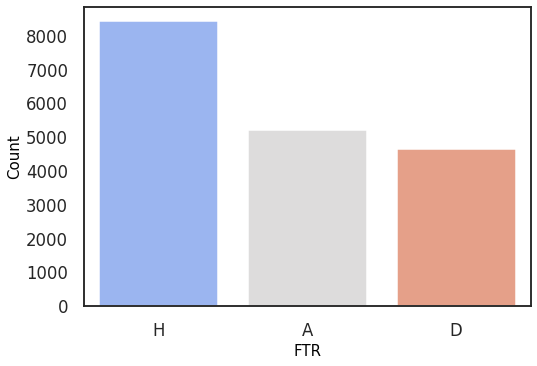

In [ ]:
sns.set_context('talk', font_scale = 1)
sns.countplot(data=df_for_anan,x="FTR",palette="coolwarm",)
plt.xlabel("FTR",size=15,color="Black")
plt.ylabel("Count",size=15,color="Black")

**Observations:**

1. Just By looking at the Counts we can get the Understanding that the Home team has Significantly more wins.
2. Another way of looking at is Away Team is more likely to get a Draw or a loss more often
3. Looking at this it looks like Playing at home is a big advantage.

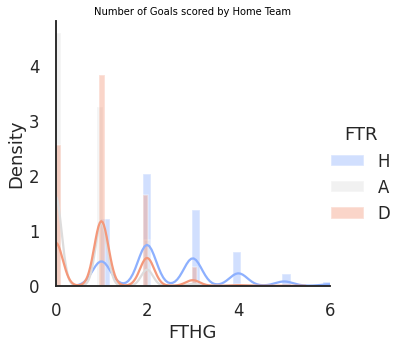

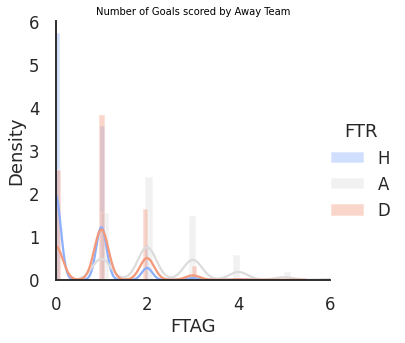

In [ ]:
sns.FacetGrid(df_for_anan,height=5,hue="FTR",palette="coolwarm",xlim=(0,6)) \
   .map(sns.distplot,"FTHG") \
   .add_legend()
plt.title("Number of Goals scored by Home Team",size=10,color= "Black")
plt.show()

sns.FacetGrid(df_for_anan,height=5,hue="FTR",palette="coolwarm",xlim=(0,6)) \
   .map(sns.distplot,"FTAG") \
   .add_legend()
plt.title("Number of Goals scored by Away Team",size=10,color= "Black")
plt.show()

**Observations:**

1. Most of the times, Both Home and Away Team scores 1 goal, Frequent scores are (1,0,2 in this sequence).Home team slightly ahead here.
2. When it come to more than 2 goals, it is the Home Teams that are ahead.

**Probability Density Function(PDF)**

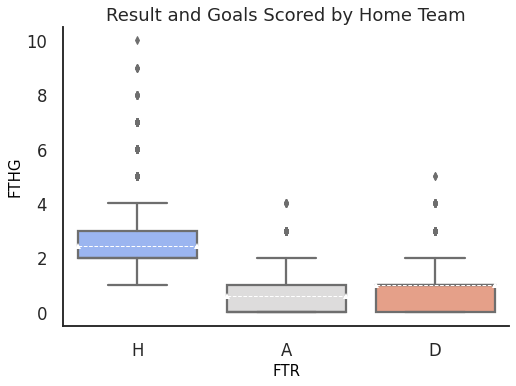

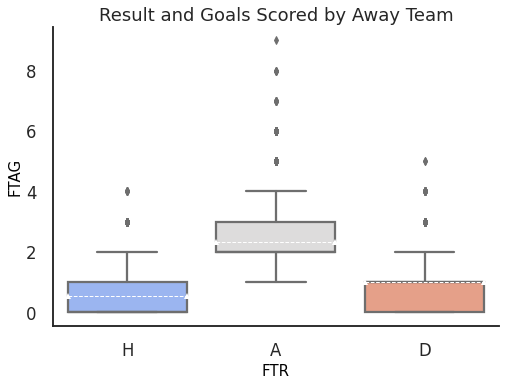

In [ ]:
sns.boxplot(data=df_for_anan,x="FTR",y="FTHG",palette="coolwarm", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
sns.despine()
plt.title("Result and Goals Scored by Home Team")
plt.xlabel("FTR",size=15,color="Black")
plt.ylabel("FTHG",size=15,color="Black")
plt.show()

sns.boxplot(data=df_for_anan,x="FTR",y="FTAG",palette="coolwarm", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
sns.despine()
plt.title("Result and Goals Scored by Away Team")
plt.xlabel("FTR",size=15,color="Black")
plt.ylabel("FTAG",size=15,color="Black")
plt.show()

***Observations:***

**Home Team :**
1. While winning score mean of 2.5 Goals.
2. When Drawn mean is 0.9 Goals
3. When Lost Mean is 0.5 Goals

**Away Team :**

1. 1.While winning score mean of 2.1 Goals.
2. 2.When Drawn mean is 0.9 Goals.
3. When Lost Mean is 0.6 Goals
-> Overall Home Team is Scoring more goals, While will be a huge factor in winning the game.

## **Bi-Variate analysis**

Perform Pair Plot analysis to visualize the relationship between features.

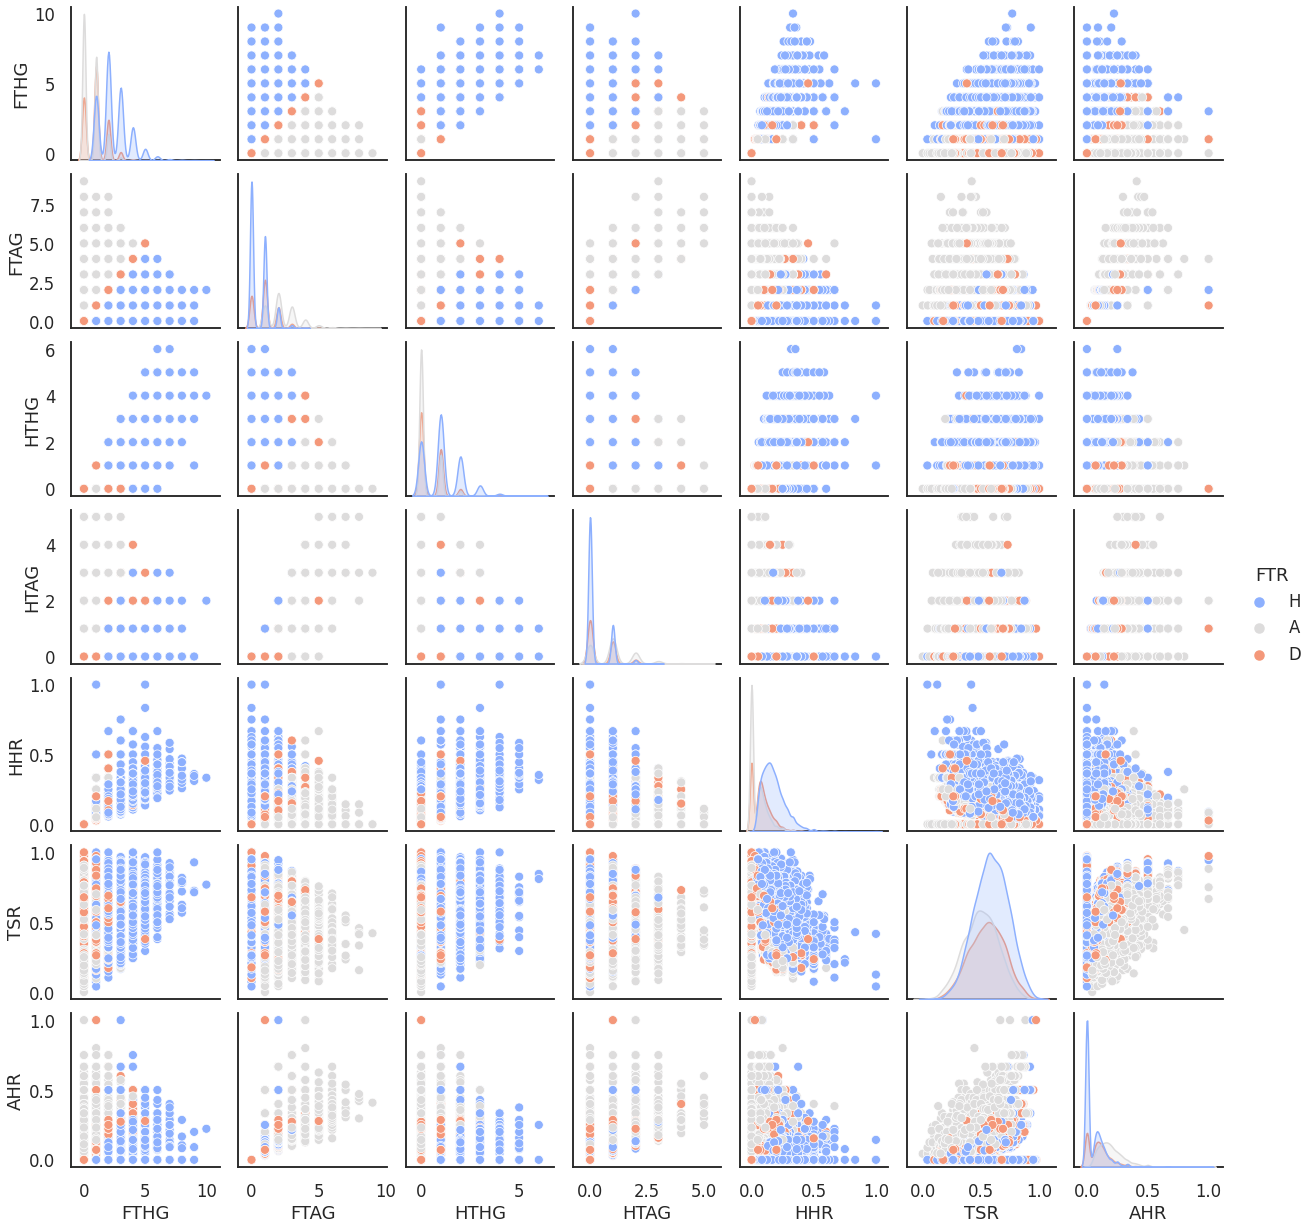

In [ ]:
sns.pairplot(df_for_anan,hue="FTR",palette="coolwarm")

**Observations:**

FTHG *(Full time Home Goal)* and FTAG *(Full time Away Goal)* are the values which clearly indicate who will win. 
So studying these 2 variables can be the best way to to predict FTR.

Whichever faeture has higher value that team wins which translates to the team which score more Goals at Full Time wins the match.

Basically this is how football works.

Lets Visualize to check if a team is Winning at Half Time or does it Change at Full Time

Text(0, 0.5, 'Count')

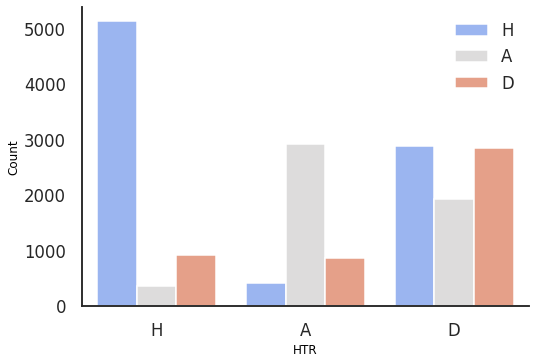

In [ ]:
sns.countplot(data=df_for_anan,x="HTR",hue="FTR",palette="coolwarm")
plt.legend(edgecolor="White",facecolor="White")
sns.despine()
plt.xlabel("HTR",size=12,color="Black")
plt.ylabel("Count",size=12,color="Black")


**Understanding:**


H : Shows the Home team leading at Half Time.

A : Shows the Away team leading at Half Time.

D : Shows the game was level at Half Time.

Blue Bar shows the team went on to Win.

Orange Bar shows the team went on and Drew the game.

Green Bar shows the team Lost the game at Full time.

**Observation:**


1. The team Leading at Half Time almost always goes on to win the game at Full time.

2. If the game is level at Half Time it is more likely Home team will win than the Away team. Although the most likely outcome is a Draw only.

3. So HTR is a very important variable to determine who wins at Full time.

**Conclusion**:

1. There is a Higher percentage of Home team winning, so clearly the team playing at Home has an advantage.
2. Goals Scored at Full time (FTHG - *Home Goals*, FTAG - *Away Goals*) determine FTR - *Full Time Result* i.e. which team will go on to win the game, team which score more Goals at FT wins the match.
3. The Home team usually score more goals. Ex While winning Home team score mean of 2.5 Goals as compared to 2.1 Goals by Away team while winning.
4. HTR (*Half Time Result*) is a very important variable to determine who wins at Full time. As we saw the Team winning at Half team does not usually end up Losing at Full time. So this Variable can effectively predict who is likely to win at full time.

#**Data Prepartion - Train and Test Dataset**

In [ ]:
for col in data.columns:
  if data[col].dtypes == 'int64' :#'object': #'int64':
    data[col] = data[col].astype('float64')

**Identify the catergorical and non-categorical features**

In [ ]:
one_hot_encode_cols = data.dtypes[data.dtypes == object]
one_hot_encode_cols

FTR    object
HTR    object
dtype: object

In [ ]:
# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols = data.dtypes[data.dtypes == object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

data[one_hot_encode_cols].head().T

0  1  2  3  4
FTR  H  H  A  A  A
HTR  H  H  A  A  A

Encode the target column - **FTR - Full Time Result** 

In [ ]:
from sklearn.preprocessing import LabelEncoder

target_labelencoder = LabelEncoder()

data['FTR'] = target_labelencoder.fit_transform(data['FTR'])

Encode the categorical feature with OneHot Encoding and standarized the numerical features using MinMax Scaler.

In [ ]:
target_cat = ['H','A','D']
data

FTHG  FTAG  FTR  HTHG  HTAG HTR  HST  AST    HF    AF   HC   AC   HY   AY   HR   AR  B365H  B365D  B365A   BWH  BWD   BWA   IWH   IWD   IWA   PSH   PSD   PSA   WHH   WHD   WHA   VCH   VCD   VCA  Bb1X2  BbMxH  BbAvH  BbMxD  BbAvD  BbMxA  BbAvA  BbOU  BbMxGT2.5  BbAvGT2.5  BbMxLT2.5  BbAvLT2.5  BbAH  BbAHh  BbMxAHH  BbAvAHH  BbMxAHA  BbAvAHA  PSCH  PSCD  PSCA   LBH  LBD   LBA   SJH   SJD   SJA   GBH  GBD   GBA   BSH  BSD   BSA   SBH  SBD   SBA       TSR       HHR       AHR
0       2.0   1.0    2   1.0   0.0   H  6.0  4.0  11.0   8.0  2.0  5.0  2.0  1.0  0.0  0.0   1.57    3.9   7.50  1.53  4.0  7.50  1.55  3.80  7.00  1.58  3.93  7.50  1.57  3.80  6.00  1.57  4.00  7.00   39.0   1.60   1.56   4.20   3.92   8.05   7.06  38.0       2.12       2.03       1.85       1.79  17.0  -0.75     1.75     1.70     2.29     2.21  1.55  4.07  7.69   NaN  NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN  0.380952  0.250000  0.076923
1       2.0   0.0    2   1.0   0.0   H  4.0  1.0  11.0   9.0  7.0  4.0  1.0  1.0  0.0  0.0   1.90    3.6   4.50  1.90  3.4  4.40  1.90  3.50  4.10  1.89  3.63  4.58  1.91  3.50  4.00  1.87  3.60  4.75   39.0   1.93   1.88   3.71   3.53   4.75   4.37  38.0       2.05       1.98       1.92       1.83  20.0  -0.75     2.20     2.13     1.80     1.75  1.88  3.61  4.70   NaN  NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN  0.545455  0.166667  0.000000
2       0.0   2.0    0   0.0   1.0   A  6.0  9.0   9.0  11.0  5.0  5.0  1.0  2.0  0.0  0.0   2.50    3.4   3.00  2.45  3.3  2.95  2.40  3.30  2.95  2.50  3.46  3.00  2.45  3.30  2.80  2.50  3.40  3.00   39.0   2.60   2.47   3.49   3.35   3.05   2.92  38.0       2.00       1.95       1.96       1.87  22.0  -0.25     2.18     2.11     1.81     1.77  2.62  3.38  2.90   NaN  NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN  0.600000  0.000000  0.200000
3       0.0   3.0    0   0.0   2.0   A  1.0  4.0   9.0   8.0  2.0  5.0  2.0  1.0  0.0  0.0   6.50    4.0   1.61  6.25  3.9  1.57  6.20  4.00  1.55  6.41  4.02  1.62  5.80  3.90  1.57  6.50  4.00  1.62   38.0   6.85   6.09   4.07   3.90   1.66   1.61  37.0       2.05       1.98       1.90       1.84  23.0   1.00     1.84     1.80     2.13     2.06  7.24  3.95  1.58   NaN  NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN  0.315789  0.000000  0.230769
4       1.0   2.0    0   1.0   2.0   A  2.0  5.0  11.0  12.0  3.0  5.0  2.0  2.0  0.0  0.0   3.90    3.5   2.04  3.80  3.5  2.00  3.70  3.35  2.05  3.83  3.57  2.08  3.80  3.20  2.05  3.90  3.40  2.10   39.0   4.01   3.83   3.57   3.40   2.12   2.05  38.0       2.10       2.01       1.88       1.81  20.0   0.25     2.20     2.12     1.80     1.76  4.74  3.53  1.89   NaN  NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN  0.500000  0.066667  0.133333
...     ...   ...  ...   ...   ...  ..  ...  ...   ...   ...  ...  ...  ...  ...  ...  ...    ...    ...    ...   ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...    ...    ...    ...    ...    ...    ...   ...        ...        ...        ...        ...   ...    ...      ...      ...      ...      ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...  ...   ...   ...  ...   ...   ...  ...   ...       ...       ...       ...
18255   1.0   1.0    1   1.0   0.0   H  6.0  4.0  14.0  20.0  9.0  5.0  2.0  1.0  1.0  0.0   2.15    3.3   3.40  2.15  3.3  3.20  2.10  3.10  3.30   NaN   NaN   NaN  2.25  3.25  3.20  2.10  3.25  3.40   37.0   2.25   2.13   3.54   3.19   3.78   3.36  31.0       1.90       1.82       2.07       1.94  13.0   0.00     1.57     1.54     2.55     2.36   NaN   NaN   NaN  2.10  3.0  3.20  2.25  3.50  3.00  2.15  3.2  3.20  2.15  3.1  3.30  2.20  3.0  3.20  0.575758  0.052632  0.071429
18256   1.0   1.0    1   1.0   0.0   H  1.0  5.0  18.0  22.0  7.0  8.0  1.0  0.0  0.0  0.0   2.20    3.1   3.50  2.15  3.3  3.20  2.00  3.20  3

In [ ]:
data =  data.replace(np.nan, 0)

In [ ]:
categorical_features = ["HTR"]
X = data[categorical_features]

colum_transformer = ColumnTransformer([('categorical', OneHotEncoder(), categorical_features),], remainder='passthrough')

data['HTR'] = colum_transformer.fit_transform(X)

In [ ]:
X = data.drop(['FTR'], axis=1)
y = data['FTR']

In [ ]:
data

FTHG  FTAG  FTR  HTHG  HTAG  HTR  HST  AST    HF    AF   HC   AC   HY   AY   HR   AR  B365H  B365D  B365A   BWH  BWD   BWA   IWH   IWD   IWA   PSH   PSD   PSA   WHH   WHD   WHA   VCH   VCD   VCA  Bb1X2  BbMxH  BbAvH  BbMxD  BbAvD  BbMxA  BbAvA  BbOU  BbMxGT2.5  BbAvGT2.5  BbMxLT2.5  BbAvLT2.5  BbAH  BbAHh  BbMxAHH  BbAvAHH  BbMxAHA  BbAvAHA  PSCH  PSCD  PSCA   LBH  LBD   LBA   SJH   SJD   SJA   GBH  GBD   GBA   BSH  BSD   BSA   SBH  SBD   SBA       TSR       HHR       AHR
0       2.0   1.0    2   1.0   0.0  0.0  6.0  4.0  11.0   8.0  2.0  5.0  2.0  1.0  0.0  0.0   1.57    3.9   7.50  1.53  4.0  7.50  1.55  3.80  7.00  1.58  3.93  7.50  1.57  3.80  6.00  1.57  4.00  7.00   39.0   1.60   1.56   4.20   3.92   8.05   7.06  38.0       2.12       2.03       1.85       1.79  17.0  -0.75     1.75     1.70     2.29     2.21  1.55  4.07  7.69  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.0  0.00  0.00  0.0  0.00  0.00  0.0  0.00  0.380952  0.250000  0.076923
1       2.0   0.0    2   1.0   0.0  0.0  4.0  1.0  11.0   9.0  7.0  4.0  1.0  1.0  0.0  0.0   1.90    3.6   4.50  1.90  3.4  4.40  1.90  3.50  4.10  1.89  3.63  4.58  1.91  3.50  4.00  1.87  3.60  4.75   39.0   1.93   1.88   3.71   3.53   4.75   4.37  38.0       2.05       1.98       1.92       1.83  20.0  -0.75     2.20     2.13     1.80     1.75  1.88  3.61  4.70  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.0  0.00  0.00  0.0  0.00  0.00  0.0  0.00  0.545455  0.166667  0.000000
2       0.0   2.0    0   0.0   1.0  1.0  6.0  9.0   9.0  11.0  5.0  5.0  1.0  2.0  0.0  0.0   2.50    3.4   3.00  2.45  3.3  2.95  2.40  3.30  2.95  2.50  3.46  3.00  2.45  3.30  2.80  2.50  3.40  3.00   39.0   2.60   2.47   3.49   3.35   3.05   2.92  38.0       2.00       1.95       1.96       1.87  22.0  -0.25     2.18     2.11     1.81     1.77  2.62  3.38  2.90  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.0  0.00  0.00  0.0  0.00  0.00  0.0  0.00  0.600000  0.000000  0.200000
3       0.0   3.0    0   0.0   2.0  1.0  1.0  4.0   9.0   8.0  2.0  5.0  2.0  1.0  0.0  0.0   6.50    4.0   1.61  6.25  3.9  1.57  6.20  4.00  1.55  6.41  4.02  1.62  5.80  3.90  1.57  6.50  4.00  1.62   38.0   6.85   6.09   4.07   3.90   1.66   1.61  37.0       2.05       1.98       1.90       1.84  23.0   1.00     1.84     1.80     2.13     2.06  7.24  3.95  1.58  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.0  0.00  0.00  0.0  0.00  0.00  0.0  0.00  0.315789  0.000000  0.230769
4       1.0   2.0    0   1.0   2.0  1.0  2.0  5.0  11.0  12.0  3.0  5.0  2.0  2.0  0.0  0.0   3.90    3.5   2.04  3.80  3.5  2.00  3.70  3.35  2.05  3.83  3.57  2.08  3.80  3.20  2.05  3.90  3.40  2.10   39.0   4.01   3.83   3.57   3.40   2.12   2.05  38.0       2.10       2.01       1.88       1.81  20.0   0.25     2.20     2.12     1.80     1.76  4.74  3.53  1.89  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.0  0.00  0.00  0.0  0.00  0.00  0.0  0.00  0.500000  0.066667  0.133333
...     ...   ...  ...   ...   ...  ...  ...  ...   ...   ...  ...  ...  ...  ...  ...  ...    ...    ...    ...   ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...    ...    ...    ...    ...    ...    ...   ...        ...        ...        ...        ...   ...    ...      ...      ...      ...      ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...  ...   ...   ...  ...   ...   ...  ...   ...       ...       ...       ...
18255   1.0   1.0    1   1.0   0.0  0.0  6.0  4.0  14.0  20.0  9.0  5.0  2.0  1.0  1.0  0.0   2.15    3.3   3.40  2.15  3.3  3.20  2.10  3.10  3.30  0.00  0.00  0.00  2.25  3.25  3.20  2.10  3.25  3.40   37.0   2.25   2.13   3.54   3.19   3.78   3.36  31.0       1.90       1.82       2.07       1.94  13.0   0.00     1.57     1.54     2.55     2.36  0.00  0.00  0.00  2.10  3.0  3.20  2.25  3.50  3.00  2.15  3.2  3.20  2.15  3.1  3.30  2.20  3.0  3.20  0.575758  0.052632  0.071429
18256   1.0   1.0    1   1.0   0.0  0.0  1.0  5.0  18.0  22.0  7.0  8.0  1.0  0.0  0.0  0.0   2.20    3.1   3.50  2.15  3.3  3.20  2.00

**Target Class Distribution**

Class=2, n=8428 (46.156%)
Class=0, n=5204 (28.499%)
Class=1, n=4628 (25.345%)


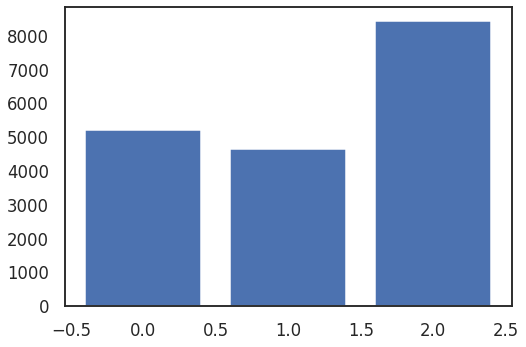

In [ ]:
# summarize distribution
from collections import Counter
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

# **Feature Selection using SHAP technique**

In [ ]:
!pip install shap

In [ ]:
import shap
from shap import TreeExplainer
from shap import summary_plot

In [ ]:
#Split the  dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify = y)
print(f'Shape of X_train: {X_train.shape}, Shape of y_train: {y_train.shape}, Shape of X_test: {X_test.shape}, Shape of y_test: {y_test.shape}')


Shape of X_train: (13695, 72), Shape of y_train: (13695,), Shape of X_test: (4565, 72), Shape of y_test: (4565,)


In [ ]:
X_train = X_train.replace(np.nan, 0)
X_test =  X_test.replace(np.nan, 0)

**Use one of the classifier - Random Forest CLassifier  to fit to against full dataset and run SHAP**

In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_depth=3)
clf.fit(X_train, y_train)
explainer = TreeExplainer(clf)
shap_values = np.array(explainer.shap_values(X_train))
print(shap_values.shape)

(3, 13695, 72)


In [ ]:
print(shap_values[0].shape)

(13695, 72)


13695: SHAP values for every datapoint

72: SHAP value contributions for every feature

Finally, we can run a sanity check to make it sure real predictions from model are the same as those predicted by shap.

To do so, we'll 
1. swap the first 2 dimensions of shap_values.
2. sum up SHAP values per class for all features.
3. add SHAP values to base values:

In [ ]:
shap_values_ = shap_values.transpose((1,0,2))

np.allclose(
    clf.predict_proba(X_train),
    shap_values_.sum(2) + explainer.expected_value
)

True

1. 2850: SHAP values for every datapoint

2. 73: SHAP value contributions for every feature

Finally, we can run a sanity check to make it sure real predictions from model are the same as those predicted by shap.

To do so, we'll 
1. swap the first 2 dimensions of shap_values.
2. sum up SHAP values per class for all features.
3. add SHAP values to base values:

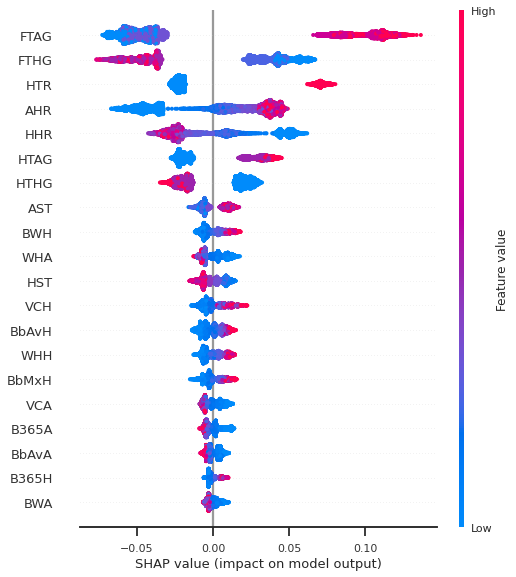

In [ ]:
summary_plot(shap_values[0],X_train)

The above explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue. 

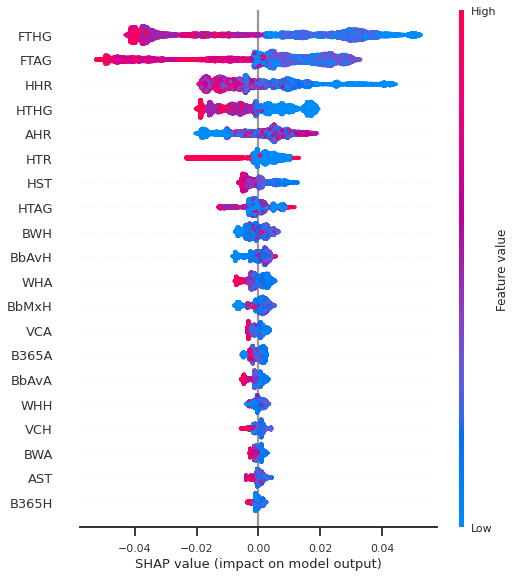

In [ ]:
summary_plot(shap_values[1],X_train)

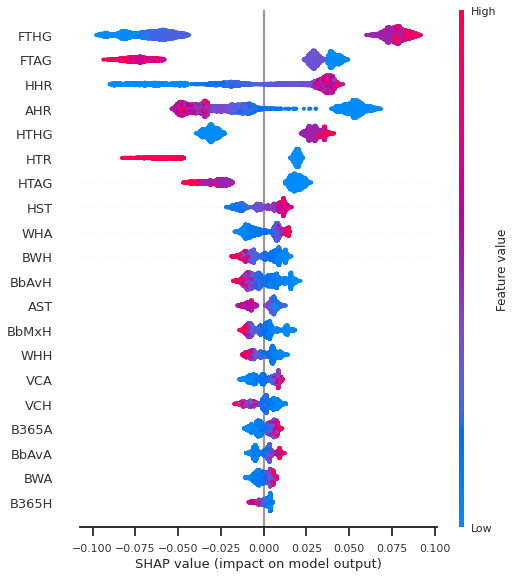

In [ ]:
summary_plot(shap_values[2],X_train)

 The plot below sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output. The color represents the feature value (red high, blue low)

We can also just take the mean absolute value of the SHAP values for each feature to get a standard bar plot (produces stacked bars for multi-class outputs)

In [ ]:
#Predicting on test
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1138   90   73]
 [ 235  289  633]
 [  29    0 2078]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1301
           1       0.76      0.25      0.38      1157
           2       0.75      0.99      0.85      2107

    accuracy                           0.77      4565
   macro avg       0.77      0.70      0.69      4565
weighted avg       0.77      0.77      0.73      4565



**From the above SHAP diagram it can be concluded that features -  [["FTHG","FTAG","HTHG","HTAG","HTR","HHR",AHR,TSR"]] are the better features for performing classification task.**


In [ ]:
data = data[["FTHG","FTAG","FTR","HTHG","HTAG","HTR","TSR", "HHR","AHR"]]
X = data.drop(['FTR'], axis=1)
y = data['FTR']

In [ ]:
X.shape

(18260, 8)

In [ ]:
y.shape

(18260,)

Split the dataset into training and test dataset.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# **Dashboard: Explaining data and model prediction using dashboard.**

In [ ]:
!pip install explainerdashboard

## **Regression Dashboard**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from explainerdashboard.datasets import feature_descriptions
from explainerdashboard import ClassifierExplainer, ExplainerDashboard, RegressionExplainer

model = RandomForestRegressor(n_estimators=50, max_depth=10).fit(X_train, y_train)
explainer = RegressionExplainer(model, X_test, y_test,target='FTR')
ExplainerDashboard(explainer,width=1000, height=800).run(mode='inline')

Changing class type to RandomForestRegressionExplainer...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard inline (terminate it with ExplainerDashboard

<IPython.core.display.Javascript object>

## **Classification Dashboard**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from explainerdashboard.datasets import feature_descriptions
from explainerdashboard import ClassifierExplainer, ExplainerDashboard, RegressionExplainer
model = RandomForestClassifier(n_estimators=50, max_depth=10).fit(X_train, y_train)
explainer = ClassifierExplainer(model, X_test, y_test,target='FTR',labels=['H', 'A', 'D'])
ExplainerDashboard(explainer,width=1000, height=800).run(mode='inline')

Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating shap interaction values... (this may take a while)
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating permutation importances (if slow, try setti

<IPython.core.display.Javascript object>

# **Regression before adding Latent Variables**

Implement Muller Loop to run the training dataset against - "MLPRegressor", "LinearRegression", "RandomForestRegressor","KNNRegressor", "LogisticRegression", "AdaBoost","Multinomial Naive Bayes" and display their accuracy.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
x_test = X_test[["FTHG","FTAG","HTHG","HTAG","HTR"]]
x_train = X_train[["FTHG","FTAG","HTHG","HTAG","HTR"]]
names = ["MLPRegressor", "LinearRegression", "RandomForestRegressor",
         "KNNRegressor", "LogisticRegression",
         "AdaBoost", "Multinomial Naive Bayes","SVM"]

classifiers = [
    MLPRegressor(random_state=1, max_iter=800),
    LinearRegression(),
    RandomForestRegressor(max_depth=2, random_state=0),
    KNeighborsRegressor(n_neighbors=2),
    LogisticRegression(),
    AdaBoostRegressor(random_state=0, n_estimators=100),
    MultinomialNB(),
    svm.SVC()]


max_score = 0.0
max_class = ''
score_list = []
clf_list = []

# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(x_train, y_train)
    score = 100.0 * clf.score(x_test, y_test)
    score_list.append(score)
    clf_list.append(name)
    print('Regression  Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Regression Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
#plot the output of the various algorithms

Regression  Classifier = MLPRegressor, Score (test, accuracy) = 99.96, Training time = 1.34 seconds
Regression  Classifier = LinearRegression, Score (test, accuracy) = 74.62, Training time = 0.01 seconds
Regression  Classifier = RandomForestRegressor, Score (test, accuracy) = 88.91, Training time = 0.33 seconds
Regression  Classifier = KNNRegressor, Score (test, accuracy) = 99.94, Training time = 0.09 seconds
Regression  Classifier = LogisticRegression, Score (test, accuracy) = 100.00, Training time = 0.17 seconds
Regression  Classifier = AdaBoost, Score (test, accuracy) = 92.55, Training time = 0.75 seconds
Regression  Classifier = Multinomial Naive Bayes, Score (test, accuracy) = 71.77, Training time = 0.01 seconds
Regression  Classifier = SVM, Score (test, accuracy) = 100.00, Training time = 0.26 seconds
--------------------------------------------------------------------------------
Best --> Regression Classifier = LogisticRegression, Score (test, accuracy) = 100.00


In [ ]:
clf_df = pd.DataFrame(list(zip(clf_list,score_list)),columns=['classifier','score'])

Text(0, 0.5, 'score')

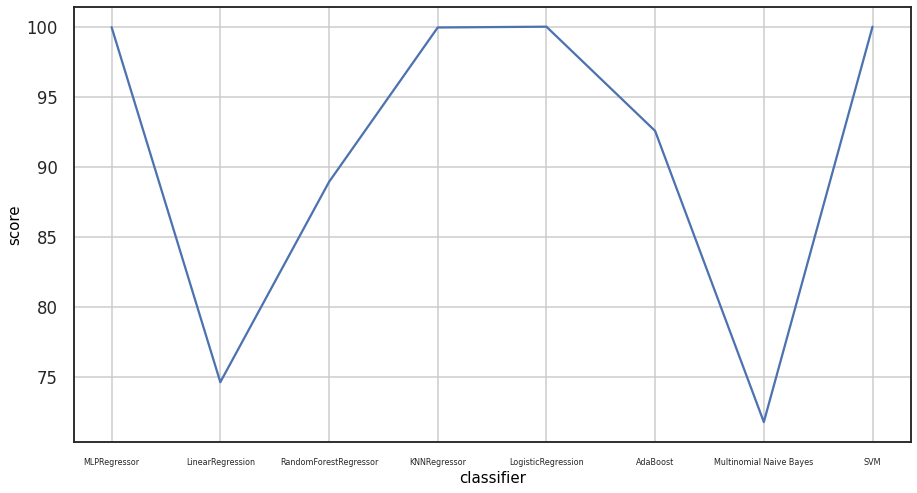

In [ ]:
from IPython.core.pylabtools import figsize
from matplotlib import figure

plt.figure(figsize=(15,8))
plt.grid(True)
plt.plot(clf_list,score_list)
#plt.bar(x=clf_list,height=score_list)
plt.xticks(fontsize=8)
plt.xlabel("classifier",size=15,color="Black")
plt.ylabel("score",size=15,color="Black")


# **Regression after adding Latent Variables**

Implement **Muller Loop** to run the training dataset against - "MLPRegressor", "LinearRegression", "RandomForestRegressor","KNNRegressor", "LogisticRegression", "AdaBoost" and display their accuracy.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn import svm

names = ["MLPRegressor", "LinearRegression", "RandomForestRegressor",
         "KNNRegressor", "LogisticRegression",
         "AdaBoost", "Multinomial Naive Bayes","SVM"]

classifiers = [
    MLPRegressor(random_state=1, max_iter=800),
    LinearRegression(),
    RandomForestRegressor(max_depth=2, random_state=0),
    KNeighborsRegressor(n_neighbors=2),
    LogisticRegression(),
    AdaBoostRegressor(random_state=0, n_estimators=100),
    MultinomialNB(),
    svm.SVC()]


max_score = 0.0
max_class = ''
score_list = []
clf_list = []
regr_list = []

# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    score_list.append(score)
    clf_list.append(name)
    regr_list.append([score, name, clf, (time.time() - start_time)])
    print('Regression  Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Regression Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
#plot the output of the various algorithms
df_mullerloop_regression = pd.DataFrame(regr_list, columns=["score", "name", "classifier", "Time-elapsed"]).sort_values('score', ascending=False).reset_index(drop=True)

Regression  Classifier = MLPRegressor, Score (test, accuracy) = 99.93, Training time = 5.06 seconds
Regression  Classifier = LinearRegression, Score (test, accuracy) = 75.28, Training time = 0.02 seconds
Regression  Classifier = RandomForestRegressor, Score (test, accuracy) = 88.88, Training time = 1.61 seconds
Regression  Classifier = KNNRegressor, Score (test, accuracy) = 99.94, Training time = 0.41 seconds
Regression  Classifier = LogisticRegression, Score (test, accuracy) = 100.00, Training time = 1.11 seconds
Regression  Classifier = AdaBoost, Score (test, accuracy) = 90.94, Training time = 4.37 seconds
Regression  Classifier = Multinomial Naive Bayes, Score (test, accuracy) = 73.41, Training time = 0.02 seconds
Regression  Classifier = SVM, Score (test, accuracy) = 100.00, Training time = 1.39 seconds
--------------------------------------------------------------------------------
Best --> Regression Classifier = LogisticRegression, Score (test, accuracy) = 100.00


**Inference:**

On comparing the accuracy before and after adding latent variables, we can conclude the following:-
<ol>
<li>AdaBoost showed improved accuracy from 71% to 90.94%.</li>
<li>Linear regression and Multinomial Naive Bayes  showed a slight increase in accuracy to 75.28% and 73%.</li>
<li>Accuracy for RandomForest, KNN and MLP regression remained constant.</li>
<li> Logistic regression and SVM continue to score 100%</li>
<ol>

In [ ]:
clf_df = pd.DataFrame(list(zip(clf_list,score_list)),columns=['classifier','score'])

In [ ]:
reg_clf = df_mullerloop_regression['classifier'][0]
reg_clf.predict(X_test)

array([2, 2, 2, ..., 2, 0, 0])

Text(0, 0.5, 'score')

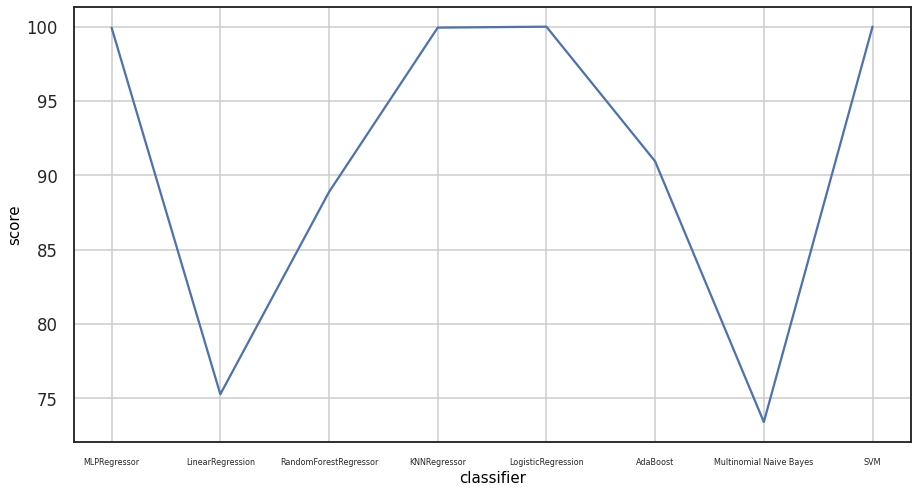

In [ ]:
from IPython.core.pylabtools import figsize
from matplotlib import figure

plt.figure(figsize=(15,8))
plt.grid(True)
plt.plot(clf_list,score_list)
#plt.bar(x=clf_list,height=score_list)
plt.xticks(fontsize=8)
plt.xlabel("classifier",size=15,color="Black")
plt.ylabel("score",size=15,color="Black")


# **Classification - Single Model - Decision Tree**

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier(max_depth = 3, criterion='gini', random_state = 0)

decisionTree = decisionTree.fit(X,y)

In [ ]:
def feature_importance(m, training_df):
    importance =  m.feature_importances_
    importance =  pd.DataFrame(importance, index=training_df.columns, columns=['Importance'] )
    return importance.sort_values(by=['Importance'], ascending= False) 

# **Feature Selection: Gini Score**

In [ ]:
importance = feature_importance(decisionTree, X)
importance[:]

Importance
FTHG    0.564494
FTAG    0.350622
HHR     0.084884
HTHG    0.000000
HTAG    0.000000
HTR     0.000000
TSR     0.000000
AHR     0.000000

[Text(0.5, 0.875, 'X[1] <= 1.991\ngini = 0.636\nsamples = 74000\nvalue = [30000, 30000, 14000]'),
 Text(0.3, 0.625, 'X[0] <= 1.5\ngini = 0.601\nsamples = 42836\nvalue = [7406, 22680, 12750]'),
 Text(0.2, 0.375, 'X[6] <= 0.013\ngini = 0.474\nsamples = 33166\nvalue = [7406, 22680, 3080]'),
 Text(0.1, 0.125, 'gini = 0.495\nsamples = 16483\nvalue = [7406, 9077, 0]'),
 Text(0.3, 0.125, 'gini = 0.301\nsamples = 16683\nvalue = [0, 13603, 3080]'),
 Text(0.4, 0.375, 'gini = 0.0\nsamples = 9670\nvalue = [0, 0, 9670]'),
 Text(0.7, 0.625, 'X[0] <= 1.976\ngini = 0.418\nsamples = 31164\nvalue = [22594, 7320, 1250]'),
 Text(0.6, 0.375, 'gini = 0.0\nsamples = 19436\nvalue = [19436, 0, 0]'),
 Text(0.8, 0.375, 'X[1] <= 2.967\ngini = 0.527\nsamples = 11728\nvalue = [3158, 7320, 1250]'),
 Text(0.7, 0.125, 'gini = 0.261\nsamples = 7088\nvalue = [0, 5995, 1093]'),
 Text(0.9, 0.125, 'gini = 0.454\nsamples = 4640\nvalue = [3158, 1325, 157]')]

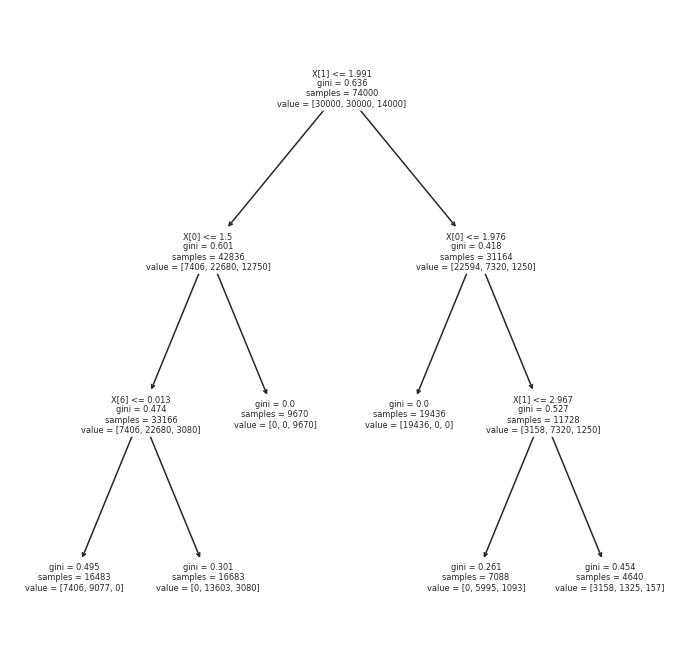

In [ ]:
plt.figure(figsize=(12,12))
tree.plot_tree(decisionTree)

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(decisionTree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Football")

'Football.pdf'

In [ ]:
feature_names = X.columns.values.tolist()
feature_names 

['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HTR', 'TSR', 'HHR', 'AHR']

In [ ]:
target_names = 'FTR'

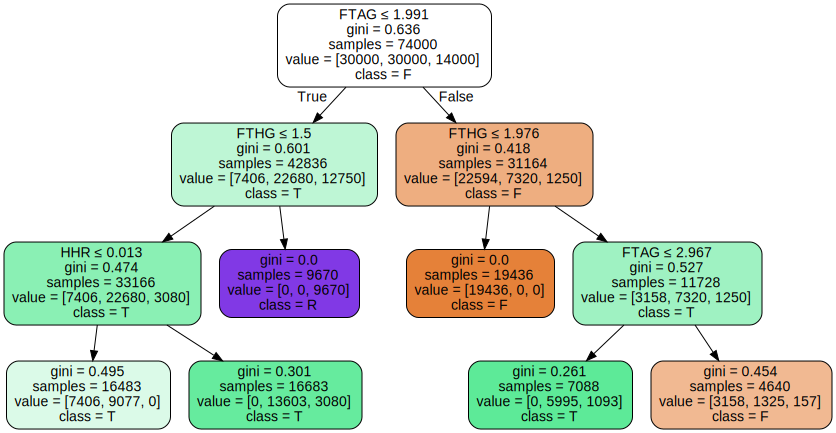

In [ ]:
dot_data = tree.export_graphviz(decisionTree, out_file=None, 
                         feature_names=feature_names,  
                         class_names=target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# **Classification**

Implement Muller Loop to run the training dataset against - "KNN Classifier","Linear SVM", "Decision Tree", "RandomForest Classifier", "Neural Network", "Adaboost", "XGB Classifier", "NaiveBayes Classifier" and display their accuracy.

In [ ]:

names = ["Nearest Neighbors", "Linear SVM", "Decision Tree", 
           "Random Forest", "Neural Net", "AdaBoost","XG Boost",
           "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025, probability=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=2),
    MLPClassifier(learning_rate='adaptive', early_stopping=True, max_iter=1000),
    AdaBoostClassifier(),
    XGBClassifier(),
    GaussianNB()]

max_score = 0.0
max_class = ''
score_list = []
clf_list = []
classifiers_result_list = []

# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    score_list.append(score)
    clf_list.append(name)
    classifiers_result_list.append([score, name, clf, (time.time() - start_time)])
    print('Classification  Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classification Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
#plot the output of the various algorithms
df_classifier_mullerloop = pd.DataFrame(classifiers_result_list, columns=["score", "name", "classifier", "Time-elapsed"]).sort_values('score', ascending=False).reset_index(drop=True)


Classification  Classifier = Nearest Neighbors, Score (test, accuracy) = 99.95, Training time = 0.32 seconds
Classification  Classifier = Linear SVM, Score (test, accuracy) = 100.00, Training time = 1.47 seconds
Classification  Classifier = Decision Tree, Score (test, accuracy) = 99.62, Training time = 0.01 seconds
Classification  Classifier = Random Forest, Score (test, accuracy) = 98.69, Training time = 0.06 seconds
Classification  Classifier = Neural Net, Score (test, accuracy) = 100.00, Training time = 1.72 seconds
Classification  Classifier = AdaBoost, Score (test, accuracy) = 71.85, Training time = 0.47 seconds
Classification  Classifier = XG Boost, Score (test, accuracy) = 99.90, Training time = 1.18 seconds
Classification  Classifier = Naive Bayes, Score (test, accuracy) = 79.96, Training time = 0.01 seconds
--------------------------------------------------------------------------------
Best --> Classification Classifier = Linear SVM, Score (test, accuracy) = 100.00


In [ ]:
winning_clf = df_classifier_mullerloop['classifier'][0]
winning_clf.predict(X_test)

array([2, 2, 2, ..., 2, 0, 0])

Text(0, 0.5, 'score')

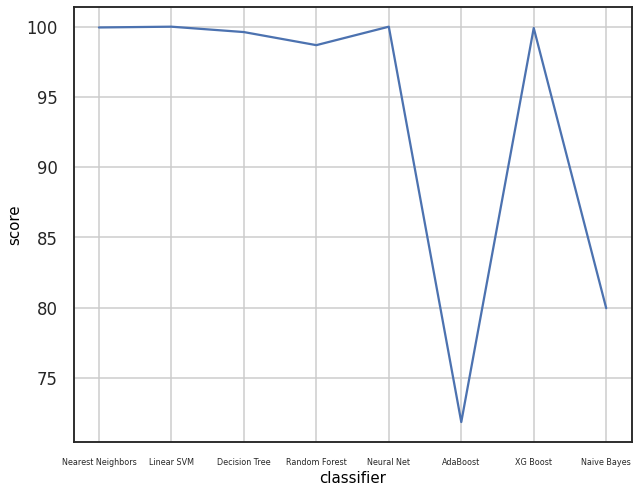

In [ ]:
plt.figure(figsize=(10,8))
plt.grid(True)
plt.plot(clf_list,score_list)
#plt.bar(x=clf_list,height=score_list)
plt.xticks(fontsize=8)
plt.xlabel("classifier",size=15,color="Black")
plt.ylabel("score",size=15,color="Black")

**Inference:**

<ol>
<li>Above stats shows that Neural Net and Linear SVM has 100% accuracy.</li>
<li>Followed by KNN, Decision Tree, XG Boost and Random Forest which has accuracy around 99 %. </li>
<li> Gaussian Naive Bayes has accuracy of 79.96 % and followed by Adaboost which has the least accuracy of 71%.85 </li>


In [ ]:
list(zip(names, classifiers))

[('Nearest Neighbors', KNeighborsClassifier(n_neighbors=2)),
 ('Linear SVM', SVC(C=0.025, kernel='linear', probability=True)),
 ('Decision Tree', DecisionTreeClassifier(max_depth=5)),
 ('Random Forest',
  RandomForestClassifier(max_depth=5, max_features=2, n_estimators=10)),
 ('Neural Net',
  MLPClassifier(early_stopping=True, learning_rate='adaptive', max_iter=1000)),
 ('AdaBoost', AdaBoostClassifier()),
 ('XG Boost', XGBClassifier(objective='multi:softprob')),
 ('Naive Bayes', GaussianNB())]

##Plotting the Confusion Matrix for all the algorithms in the Muller loop

In [ ]:
def plot_classifer_metrics(name, y_pred, y_test, X_test, accu_score, fpr, tpr, logit_roc_auc, classifer, df,f1, precision, recall):
  fig, ax = plt.subplots(ncols=2, figsize=(12,6))
  
  # plotting  roc curve  
  ax[0].plot(fpr[0], tpr[0], linestyle='--',color='orange', label='class Away vs Rest')
  ax[0].plot(fpr[1], tpr[1], linestyle='--',color='green', label='class Draw vs Rest')
  ax[0].plot(fpr[2], tpr[2], linestyle='--',color='blue', label='class Home vs Rest')
  ax[0].legend(loc='best')
  ax[0].set_xlabel("False Positive rate",fontsize=9)
  ax[0].set_ylabel("True Positive rate",fontsize=9)
  text1 = "F1: " + str(round(f1,2)) + " / Precision: " + str(round(precision,2)) + " / Recall: " + str(round(recall,2))
  ax[0].title.set_text(text1)

  # plot the confusion matrix
  plot_confusion_matrix(classifer, 
                          X_test, 
                          y_test, 
                          ax=ax[1], 
                          cmap='Blues',
                          display_labels=np.unique(y_test))
  ax[1].title.set_text(type(classifer).__name__)

  plt.tight_layout()  

In [ ]:
def show_classification_results(metrics, df):
  # print accuracy results
  #columns=['Classifier', 'Score', 'ROC_AUC', 'F1', 'Precision', 'Recall', 'Training Time'
  metrics.sort_values(by='Accuracy', ascending=False, inplace=True)
  pd.pandas.set_option('display.max_columns', None)
  pd.set_option('display.expand_frame_repr', False)
  print(metrics[['Classifier', 'Accuracy', 'ROC_AUC']])
  print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(metrics.iloc[0]['Classifier'], metrics.iloc[0]['Accuracy']))

  # plot the roc/auc 
  #columns=['name', 'y_pred', 'y_test', 'X_test', 'accu_score', 'fpr', 'tpr', 'logit_roc_auc', 'clf']
  for i, r in metrics.iterrows():
    name   = r['Classifier']
    y_pred = r['y_pred']
    y_test = r['y_test']
    X_test = r['X_test']
    accu_score = r['Accuracy']
    fpr = r['fpr']
    tpr = r['tpr']
    logit_roc_auc = r['ROC_AUC']
    classifier = r['model']
    f1 = r['F1'] 
    precision = r['Precision'] 
    recall = r['Recall']
    
    # Plot the confusion matrix
    plot_classifer_metrics(name, y_pred, y_test, X_test, accu_score, fpr, tpr, logit_roc_auc, classifier, df,f1, precision, recall)

In [ ]:
def train_evaluate_classifiers(X, y):
    # list of classifiers to compare
    names = ["Nearest Neighbors", "Linear SVM", "Decision Tree", 
           "Random Forest", 
           "Neural Net", "AdaBoost","XG Boost",
           "Naive Bayes"]

    classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025, probability=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=2),
    MLPClassifier(learning_rate='adaptive', early_stopping=True, max_iter=1000),
    AdaBoostClassifier(),
    XGBClassifier(),
    GaussianNB()]

    # init
    accu_results = []
    predictions = []
    results = []
    
    max_score = 0.0
    max_class = ''


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
    #y_test = np.argmax(y_test, axis=0)
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        start_time = time.time()
        clf.fit(X_train, y_train)
        score = 100.0 * clf.score(X_test, y_test)

        # find the best classifier
        if score > max_score:
            clf_best = clf
            max_score = score
            max_class = name

        # add classifier predictions and metric to predictions and results
        y_pred = clf.predict(X_test)
        
        y_pred_score = clf.predict_proba(X_test)
        accu_score = 100.0 * accuracy_score(y_test, y_pred)

        logit_roc_auc = roc_auc_score(y_test, y_pred_score,multi_class='ovo', average='weighted')
       # fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)

        # accumulate various scores
        f1 = 100.0 * f1_score(y_test, y_pred,average='weighted')
        precision = 100.0 * precision_score(y_test, y_pred,average='weighted')
        recall = 100.0 * recall_score(y_test, y_pred,average='weighted')

        # roc curve for classes
        fpr = {}
        tpr = {}
        thresh ={}

        n_class = 3

        for i in range(n_class):    
          fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_score[:,i], pos_label=i)
        
        # capture predictions, results in df
        predictions.append([name, y_pred, y_test, X_test, accu_score, fpr, tpr, logit_roc_auc, clf]) 
        accu_results.append([name, score, logit_roc_auc, f1, precision, recall, (time.time() - start_time)])
        results.append([name, y_pred, y_test, X_test, accu_score, fpr, tpr, logit_roc_auc, f1, precision, recall, clf])
        
    results = pd.DataFrame(results, columns=['Classifier', 'y_pred', 'y_test', 'X_test', 'Accuracy', 'fpr', 'tpr', 'ROC_AUC', 'F1', 'Precision', 'Recall', 'model'])
    return results

          Classifier    Accuracy   ROC_AUC
1         Linear SVM  100.000000  1.000000
0  Nearest Neighbors   99.993243  1.000000
6           XG Boost   99.993243  1.000000
4         Neural Net   99.986486  1.000000
2      Decision Tree   99.638514  0.999917
3      Random Forest   97.037162  0.998121
5           AdaBoost   87.398649  0.985950
7        Naive Bayes   72.682432  0.919365
Best --> Classifier = Linear SVM, Score (test, accuracy) = 100.00


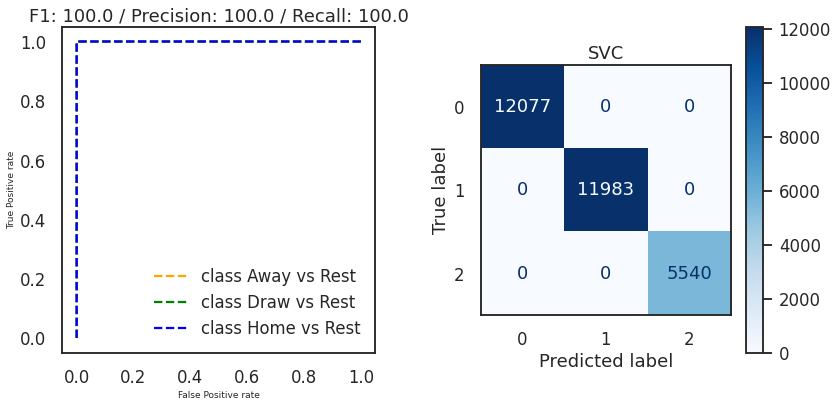

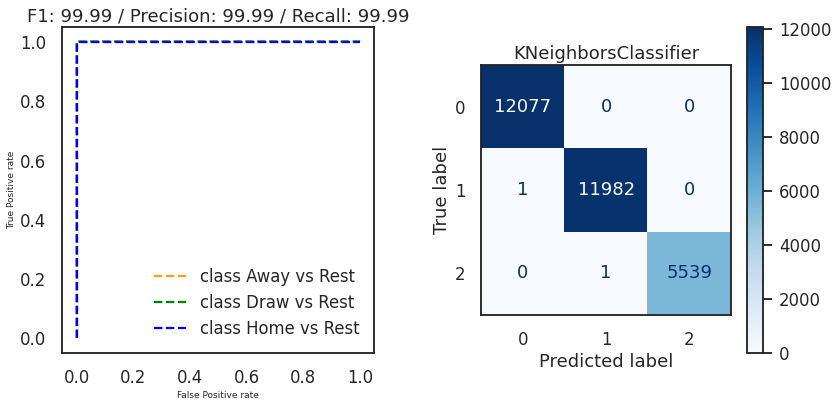

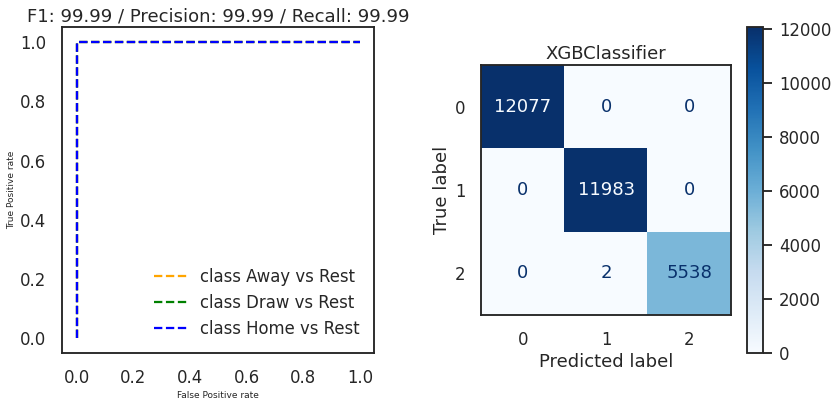

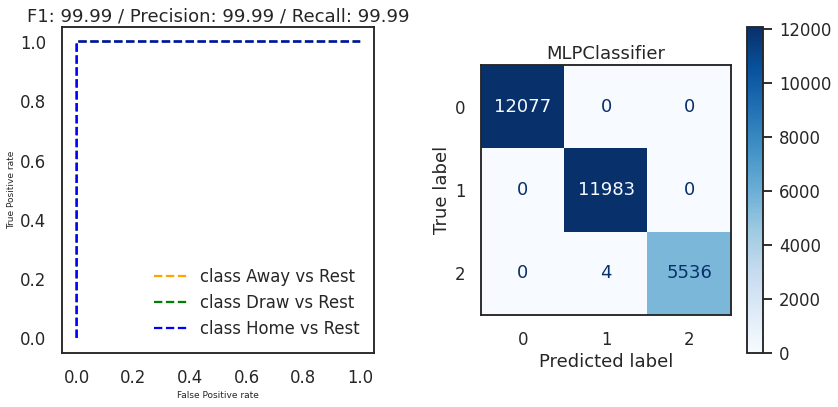

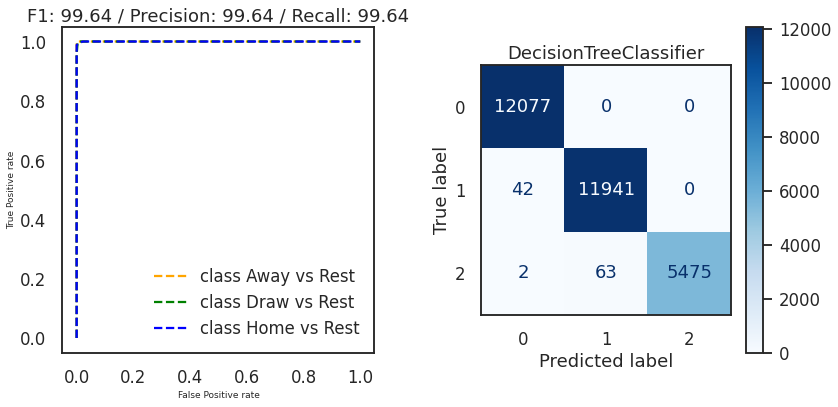

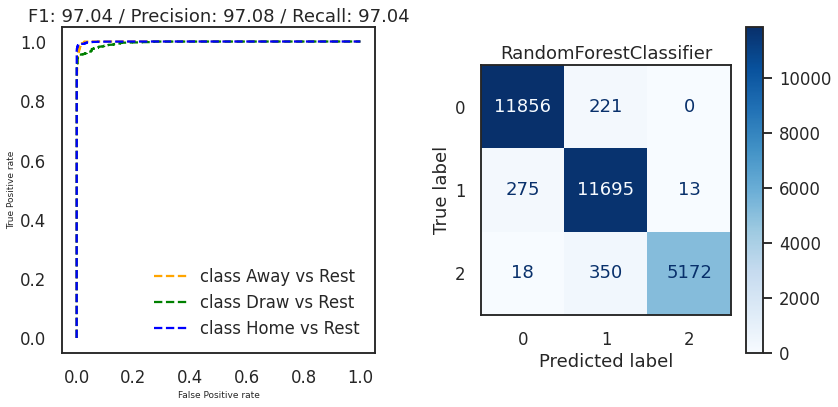

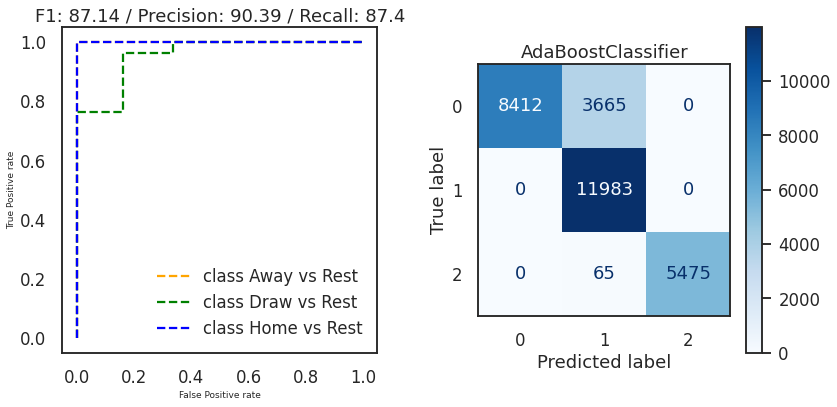

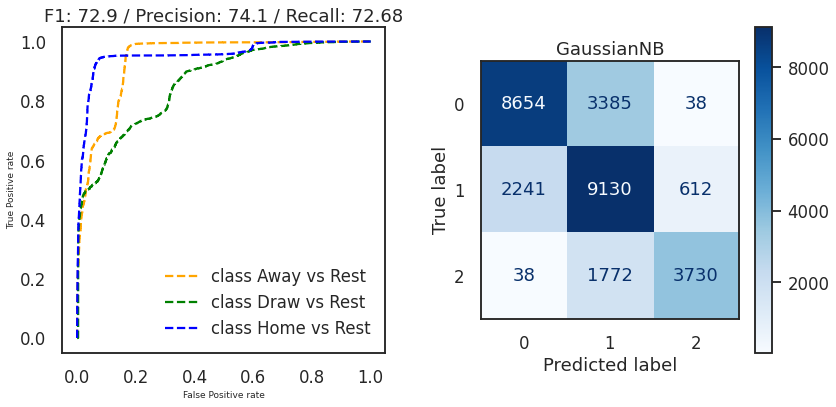

In [ ]:
# Train, Validate, Test, Show results
metrics = train_evaluate_classifiers(X, y)
show_classification_results(metrics, data)

**Inference:**

<ol>
<li>Above stats shows that Neural Net and Linear SVM has 100% accuracy.</li>
<li>Followed by KNN, Decision Tree, XG Boost and Random Forest which has accuracy around 99 %. </li>
<li> Gaussian Naive Bayes has accuracy of 79.96 % and F1 score of 72.9 and followed by Adaboost which has the least accuracy of 71.85% anbd better F1 score of 87.14 </li>


The above confusion matrix shows the result for various classification algorithms. It can be noted that the model has provided good accuracy with all the algorithms used.

#**Understanding the significance of data distribution by sampling**


## **Perform RE-SAMPLING using SMOTE**

Plotting and Inferencing High upsampling in the notebook.

In [ ]:
from imblearn.over_sampling import SMOTE


def add_smote(df, threshold1, threshold2 , threshold3):
  original_data = df #data[['FTHG','FTAG']]
  feature = original_data.columns.values.tolist()
  sm = SMOTE(sampling_strategy={0: threshold1, 1:threshold2, 2: threshold3})
  X_sample, y_sample = sm.fit_resample(original_data,data['FTR'])
  #Creating a new Oversampling Data Frame
  modified_data = pd.DataFrame(X_sample, columns = feature)
  modified_data['FTR'] = y_sample
  return modified_data
  
def plot_modified(original_data,modified_data):

  print("Orignal shape:", original_data.shape)
  print("Modified shape:",modified_data.shape)

  sns.set_context('talk', font_scale = 1)
  sns.countplot(data=original_data,x=data['FTR'],palette="coolwarm",)
  plt.xlabel("FTR",size=15,color="Black")
  plt.ylabel("Count",size=15,color="Black")
  plt.legend()
  plt.show()

  #sns.kdeplot(modified_data['FTHG'], label='Modified')
  sns.countplot(data=modified_data,x=modified_data['FTR'],palette="coolwarm",)
  plt.xlabel("FTR",size=15,color="Black")
  plt.ylabel("Count",size=15,color="Black")
  plt.legend()
  plt.show()

  sns.kdeplot(original_data['FTHG'], label='Original')
  sns.kdeplot(modified_data['FTHG'], label='Modified')
  plt.legend()
  plt.show()

**Upsampling the dataset to have each classes to have 14000 outcomes.**

No handles with labels found to put in legend.


Orignal shape: (18260, 9)
Modified shape: (42000, 9)


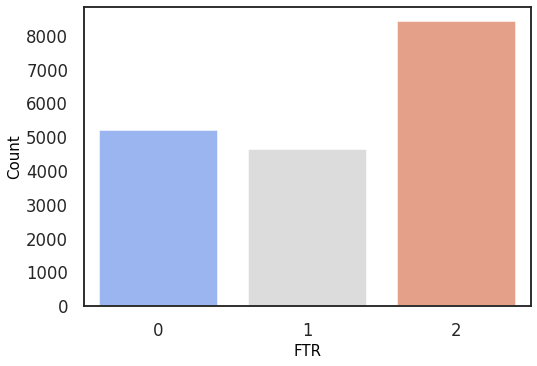

No handles with labels found to put in legend.


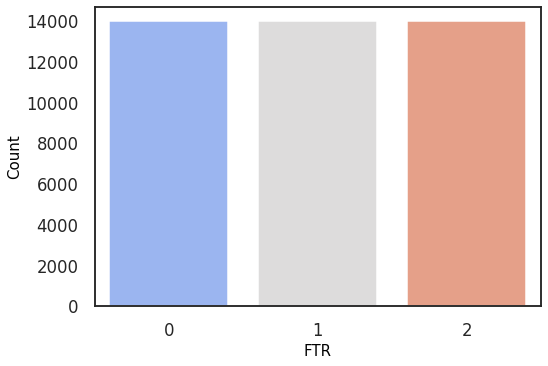

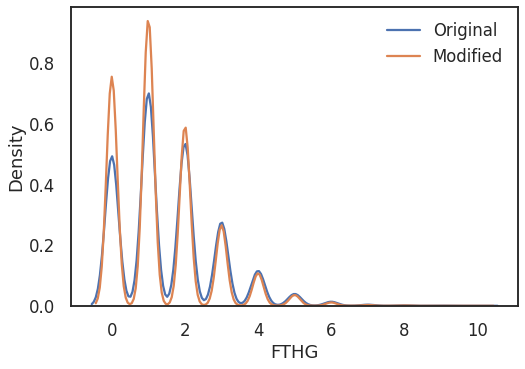

In [ ]:
df  = data
modified_df = add_smote(df,14000,14000,14000)
plot_modified(df, modified_df)

In [ ]:
X = modified_df.drop(['FTR'], axis=1)
y = modified_df['FTR']

**After upsampling the dataset to have each classes to have 14000 outcomes,We will train the dataset in a muller loop for classification and store all the performance metrics including - f1 score for all the algorithms.**




          Classifier    Accuracy   ROC_AUC
1         Linear SVM  100.000000  1.000000
0  Nearest Neighbors   99.988095  1.000000
4         Neural Net   99.982143  1.000000
6           XG Boost   99.964286  1.000000
2      Decision Tree   99.541667  0.999919
3      Random Forest   96.732143  0.998165
7        Naive Bayes   76.148810  0.919639
5           AdaBoost   75.351190  0.955084
Best --> Classifier = Linear SVM, Score (test, accuracy) = 100.00


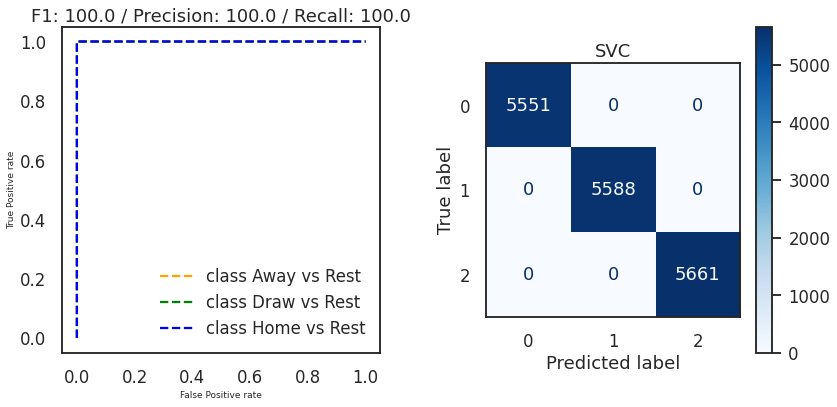

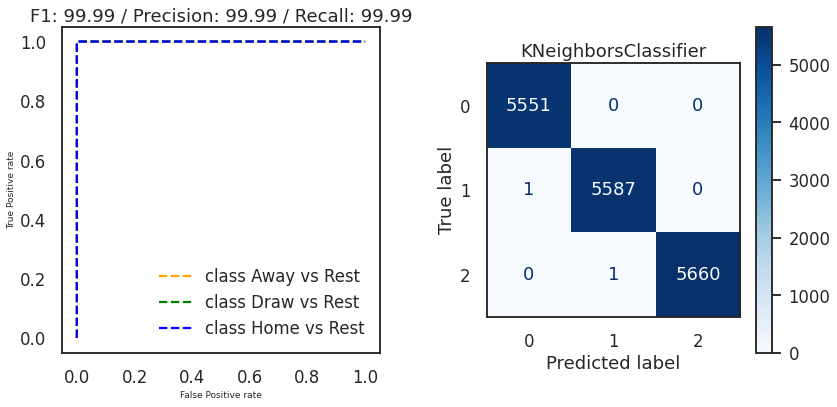

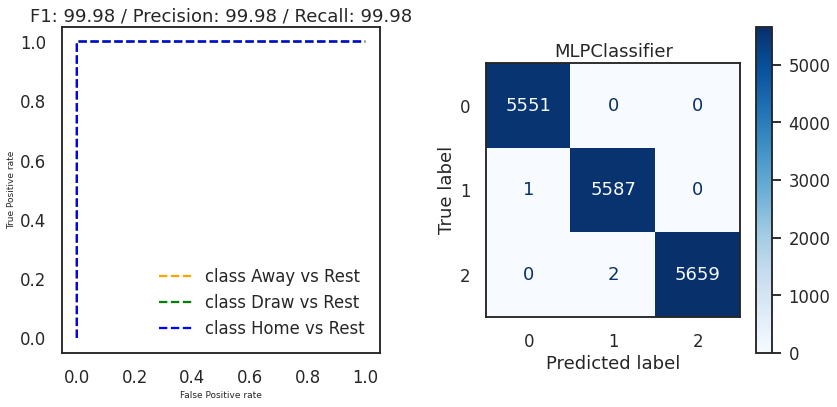

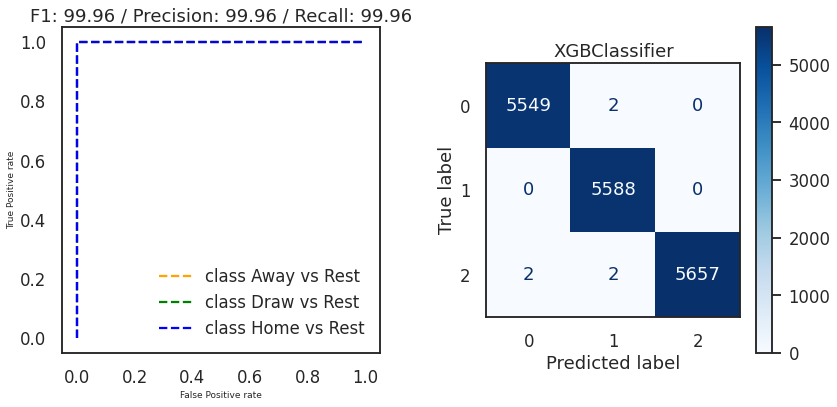

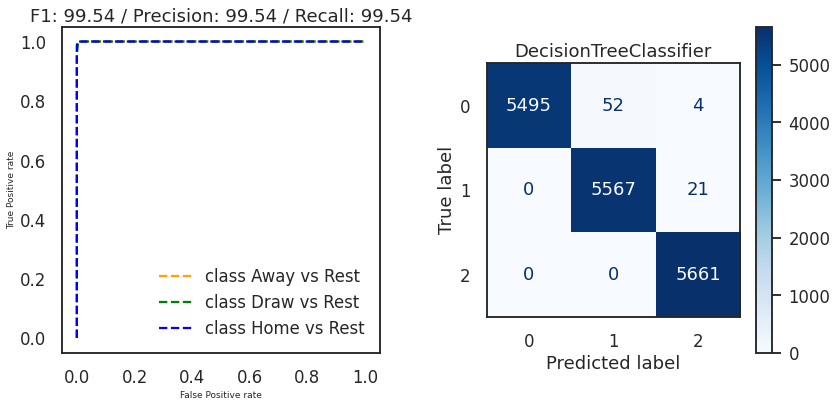

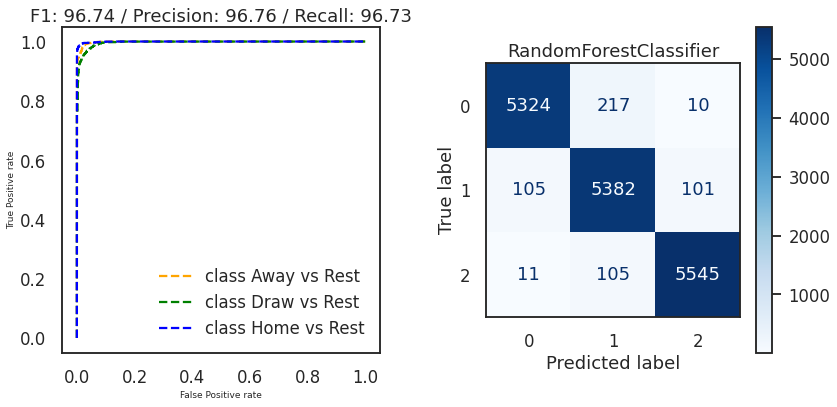

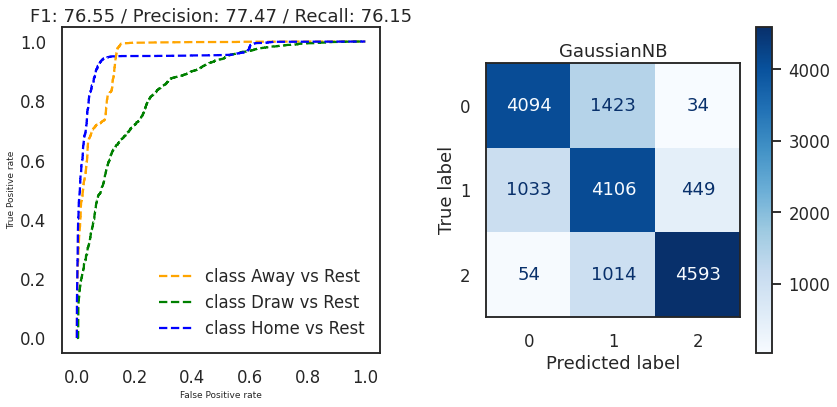

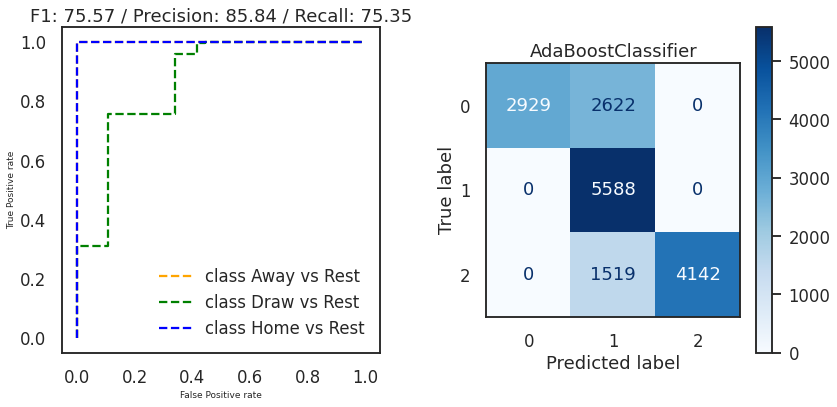

In [ ]:
# Train, Validate, Test, Show results
metrics = train_evaluate_classifiers(X, y)
show_classification_results(metrics, modified_df)

**Perform following steps -** 
*   Now we will change the data distribution. 
*   We will re-train the dataset in a muller loop for classification and store all the performance metrics including - f1 score for all the algorithms.



No handles with labels found to put in legend.


Orignal shape: (18260, 9)
Modified shape: (74000, 9)


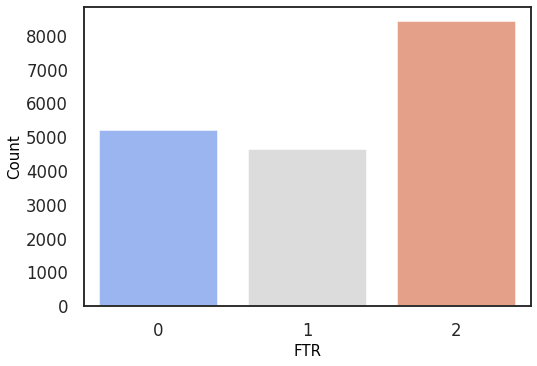

No handles with labels found to put in legend.


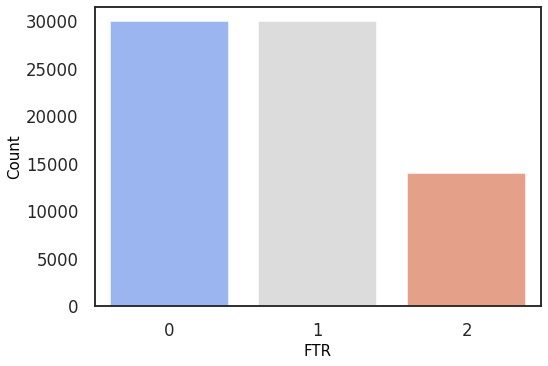

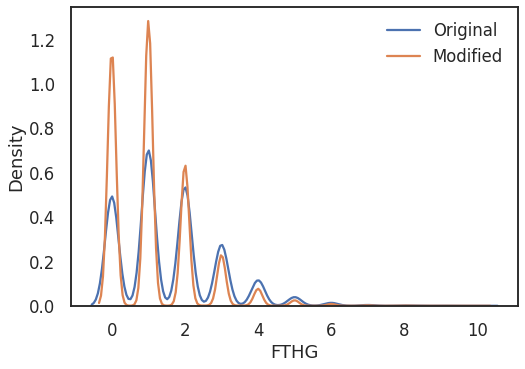

In [ ]:
df  = data
modified_df = add_smote(df,30000,30000,14000)
plot_modified(df, modified_df)

          Classifier    Accuracy   ROC_AUC
1         Linear SVM  100.000000  1.000000
6           XG Boost   99.996622  1.000000
0  Nearest Neighbors   99.983108  1.000000
4         Neural Net   99.976351  1.000000
2      Decision Tree   99.631757  0.999914
3      Random Forest   98.756757  0.999535
5           AdaBoost   82.439189  0.929674
7        Naive Bayes   73.314189  0.920704
Best --> Classifier = Linear SVM, Score (test, accuracy) = 100.00


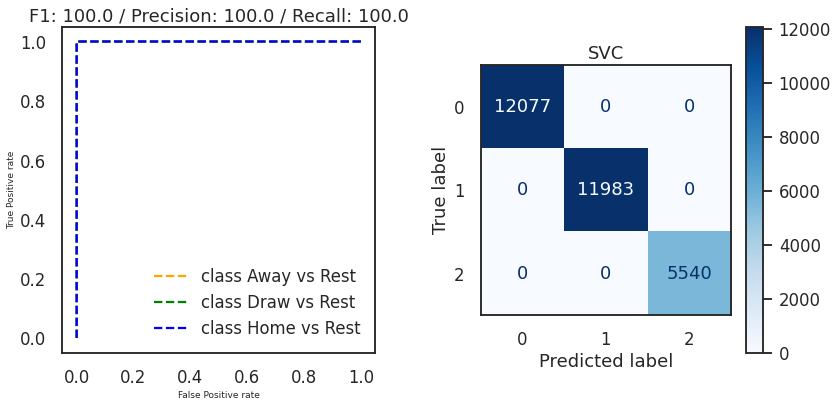

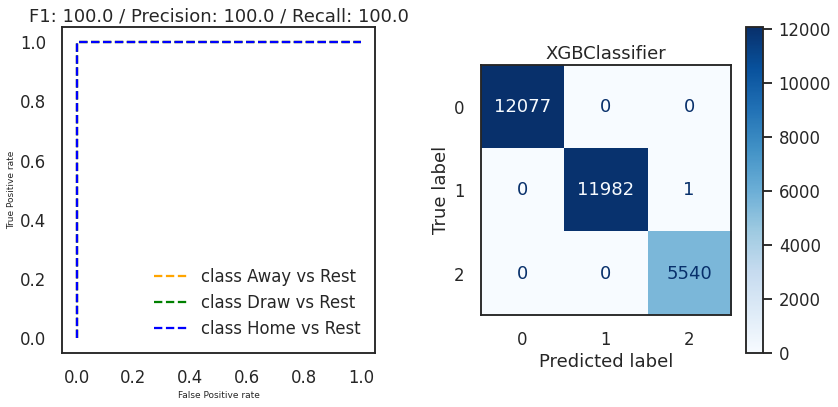

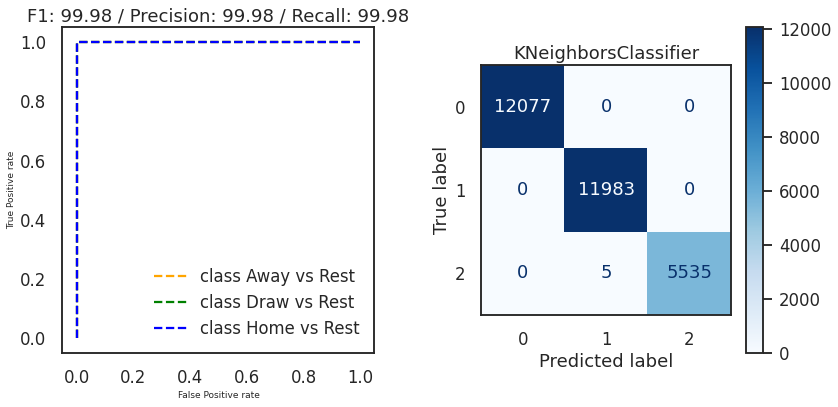

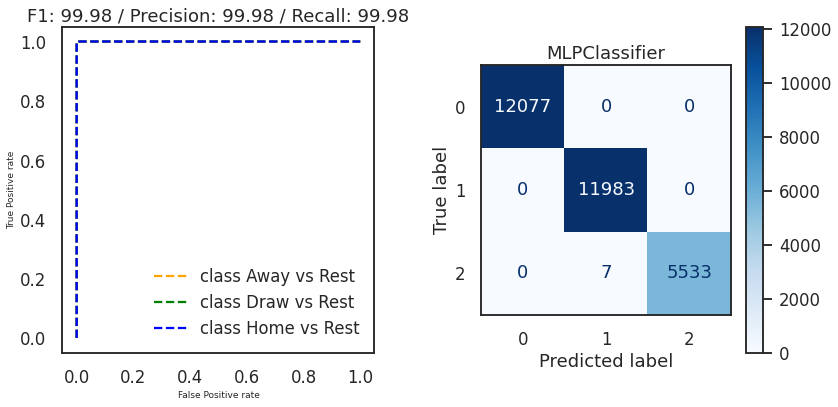

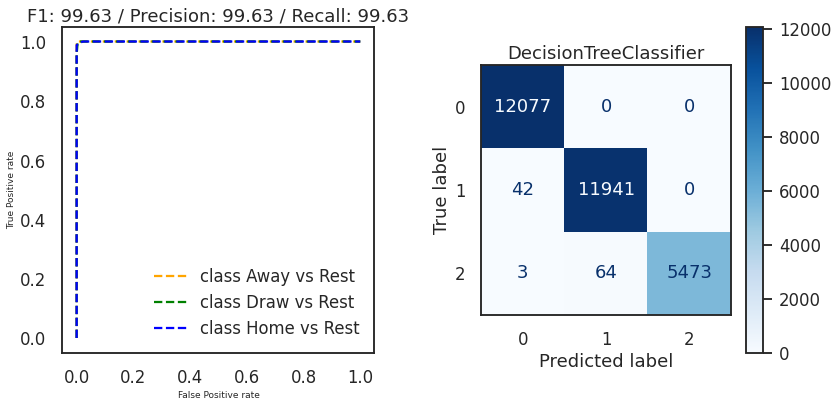

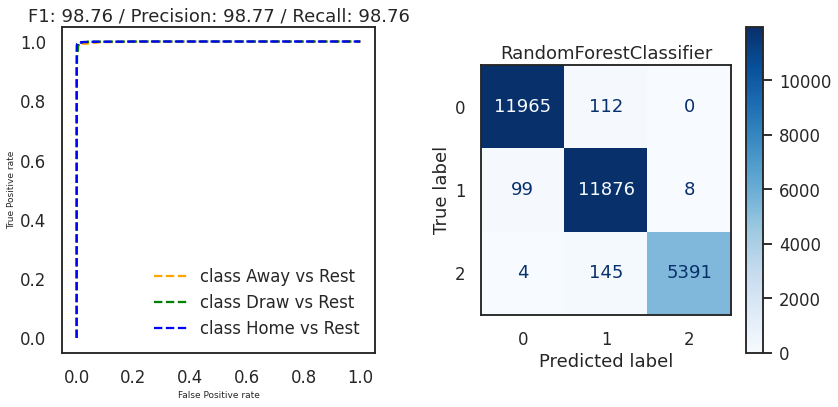

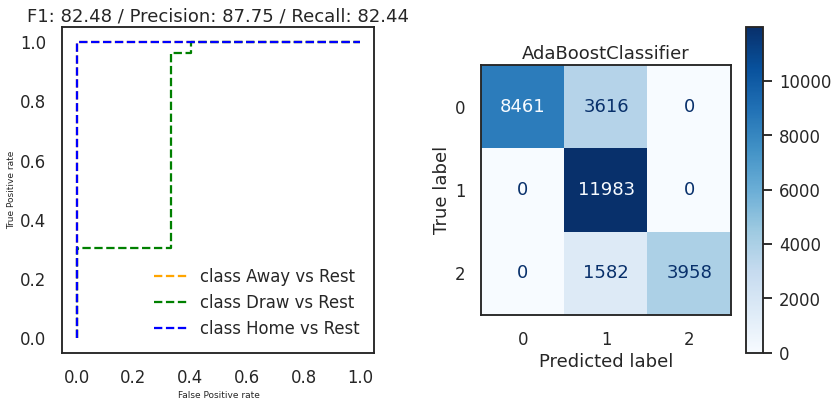

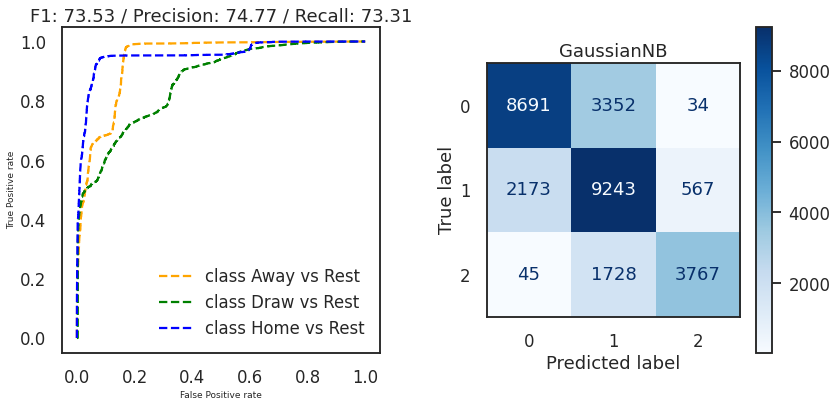

In [ ]:
X = modified_df.drop(['FTR'], axis=1)
y = modified_df['FTR']

# Train, Validate, Test, Show results
metrics = train_evaluate_classifiers(X, y)
show_classification_results(metrics, modified_df)

Inference:

*   SVC, KNN, Neural Net, XG Boost, Decision Tree and Random Forest continue to show good F1 scores and better prediction capability.
*   Whereas performance of GaussianNB decreased to F1 score of 73.53 and Performance of AdaBoost increased to F1 score of 82.48.


We will repeat the same step for each feature (1-3) using IPYWIDGETS.

## **Upsampling and Downsampling using *Interactive* IPYWIDGET.**

To show the upsampling / downsampling dynamically based on the threshold selected and its effects on each features of the dataset and the impact on the each of the classification algorithms performances ran at background. 

In [ ]:
!pip install imblearn

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from ipywidgets import interact, interactive, fixed, interact_manual,Layout, HTML
import ipywidgets as widgets
import pickle

In [ ]:
from IPython.display import display
from imblearn.over_sampling import SMOTE

def upsampling(df, threshold1, threshold2 , threshold3):
    original_data = df 
    feature = original_data.columns.values.tolist()
    sm = SMOTE(sampling_strategy={0: threshold1, 1:threshold2, 2: threshold3})
    X_sample, y_sample = sm.fit_resample(original_data,data['FTR'])
    #Creating a new Oversampling Data Frame
    modified_data = pd.DataFrame(X_sample, columns = feature)
    modified_data['FTR'] = y_sample
    return modified_data

def Feature_Data_UpSampling(Away=9000,Draw=9000,Home=9000, feature = 'FTHG'):   
    modified_data = upsampling(data,Away,Draw,Home)
    print("Shape of the Upsampled dataset: ", modified_data.shape)
    filename = "modified_data.pkl"  
    with open(filename, 'wb') as file:  
      pickle.dump(modified_data, file)    
    
    sns.kdeplot(data[feature], lw=3, fill=True)
    sns.kdeplot(modified_data[feature], lw=3, fill=True)                                 
    plt.xlim(-1.5,8)

In [ ]:
def plot_classifer(classifier = 'Nearest Neighbors'):
  
  # Load the Model back from file
  filename = "modified_data.pkl" 
  with open(filename, 'rb') as file:  
    modified_data = pickle.load(file)
    print("Shape of the Sampled dataset: ", modified_data.shape)

  X = modified_data.drop(['FTR'], axis=1)
  y = modified_data['FTR']
  metrics = train_evaluate_classifiers(X, y)

  for i, r in metrics.iterrows():
    if r['Classifier'] == classifier:
      name   = r['Classifier']
      y_pred = r['y_pred']
      y_test = r['y_test']
      X_test = r['X_test']
      accu_score = r['Accuracy']
      fpr = r['fpr']
      tpr = r['tpr']
      logit_roc_auc = r['ROC_AUC']
      classifier = r['model']
      f1 = r['F1'] 
      precision = r['Precision'] 
      recall = r['Recall']
    
      # Plot the confusion matrix
      plot_classifer_metrics(name, y_pred, y_test, X_test, accu_score, fpr, tpr, logit_roc_auc, classifier, df,f1, precision, recall)



In [ ]:
from sklearn.utils import resample

def downsampling(df, threshold):
    original_data = df 
    feature = original_data.columns.values.tolist()
    modified_data = resample(df, replace=True,    # sample without replacement
                                 n_samples=threshold,     # to match minority class
                                 random_state=123) # reproducible results
    modified_data.reset_index(drop=True,inplace=True) 
    
    return modified_data


def Feature_Data_DownSampling(thres=3000, feature = 'FTHG'):   
    modified_data = downsampling(data,thres)
    print("Shape of the Downsampled dataset: ", modified_data.shape)
    filename = "modified_data.pkl"  
    with open(filename, 'wb') as file:  
      pickle.dump(modified_data, file)    
    
    sns.kdeplot(data[feature], lw=3, fill=True)
    sns.kdeplot(modified_data[feature], lw=3, fill=True)                                 
    plt.xlim(-1.5,8)
    plt.ylim(0,0.9)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

###**Dynamic UpSampling and its effects on Classification Algorithm performances:**

In [ ]:
# Code for Upsampling and its plotting.
print("UPSAMPLING USING SMOTE")
print("-----------------------")
A = interactive(Feature_Data_UpSampling,
                Away=(9000,20000,1000),
                Draw=(9000,20000,1000),
                Home=(9000,20000,1000),
                feature = widgets.Dropdown(options = ['FTHG','FTAG','HTAG','HTHG','HTR', 'TSR', 'HHR', 'AHR']),
                layout=Layout(width='50%', height='80px', position='bottom'))
  
B = interactive(plot_classifer,
             classifier = widgets.Dropdown(options = ['Nearest Neighbors', 'Linear SVM', 'Decision Tree', 'Random Forest', 'Neural Net', 'AdaBoost','Naive Bayes']),
             layout=Layout(width='50%', height='80px', position='bottom'))
B.add_class("left-spacing-class")
display(HTML("<style>.left-spacing-class {margin-left: 10px;margin-top: 55px;}</style>"))


hbox1 = widgets.HBox([widgets.Label(''), A,B])
widgets.VBox([hbox1])


UPSAMPLING USING SMOTE
-----------------------


HTML(value='<style>.left-spacing-class {margin-left: 10px;margin-top: 55px;}</style>')

**Inferences :**
<ol>
<li>We can see that without Upsampling, the F1 score of KNN is 100% and with the downsampling, the F1 score slightly decreases. The similar trend is noticed with other algorithms - DecisionTree, Random Forest, Neural Network and Gaussian NB. </li>
<li>Surprisingly, Gaussian Bayes shows improvement in F1 score of 77.7.</li>
<li> This similar trend is also noticed when threashold is leaned more towards "Draw" or "Home Win"  class.</li>
</ol>

***On further analysis, the equally same upsampled classes does not show any significant improvement in the algorithm performances except for ADABOOST where the performance increases gradually.***

###**Dynamic DownSampling and its effects on Classification Algorithm performances:**

In [ ]:
# Code for Upsampling and its plotting.
# Code for Upsampling and its plotting.
print("DOWNSAMPLING USING RESAMPLE - SKLEARN")
print("-------------------------------------")

A = interactive(Feature_Data_DownSampling,
                thres=(1000,9000,1000),
                feature = widgets.Dropdown(options = ['FTHG','FTAG','HTAG','HTHG','HTR', 'TSR', 'HHR', 'AHR']),layout=Layout(width='50%', height='80px', position='bottom'))
  
B = interactive(plot_classifer,
             classifier = widgets.Dropdown(options = ['Nearest Neighbors', 'Linear SVM', 'Decision Tree', 'Random Forest', 'Neural Net', 'AdaBoost','Naive Bayes']),
             layout=Layout(width='50%', height='80px', position='bottom'))

B.add_class("left-spacing-class")
display(HTML("<style>.left-spacing-class {margin-left: 10px;}</style>"))

hbox1 = widgets.HBox([widgets.Label('*'), A,B])
widgets.VBox([hbox1])


DOWNSAMPLING USING RESAMPLE - SKLEARN
-------------------------------------


HTML(value='<style>.left-spacing-class {margin-left: 10px;}</style>')

**Inferences :**
<ol>
<li>We can see that without Downsampling, the F1 score of KNN is 100% and with the downsampling, the F1 score slightly decreases. The similar trend is noticed with other algorithms - DecisionTree, Random Forest, Neural Network and Gaussian NB. </li>
<li>Surprisingly, Gaussian Bayes shows improvement in F1 score of 77.7.</li>
</ol>

***The equally same downsampled classes does not show any significant improvement in the algorithm performances.***

# **Pickle and load**
To save and load machine learning model for future prediction we have pickled our model. It will Pickle serialize the machine learning algorithm and save it. In future we can deserialize the same hence saving a lot of time. This way we won't have to train our model to do prediction.

In [ ]:
import pickle

In [ ]:
# Save the Model to file in the current working directory

filename = "Regression_model.pkl"  
with open(filename, 'wb') as file:  
    pickle.dump(reg_clf, file)

In [ ]:
# Load the Model back from file
with open(filename, 'rb') as file:  
    Pickled_Model = pickle.load(file)

Pickled_Model

LogisticRegression()

In [ ]:
# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))
result = Pickled_Model.score(X_test, y_test)
print(result)

1.0


In [ ]:
# Save the Model to file in the current working directory

filename = "Classificationf_model.pkl"  
with open(filename, 'wb') as file:  
    pickle.dump(winning_clf, file)

In [ ]:
# Load the Model back from file
with open(filename, 'rb') as file:  
    Pickled_Model = pickle.load(file)

Pickled_Model

SVC(C=0.025, kernel='linear', probability=True)

# Conclusion

Our golden cluster is able to tell Top 3 Best Performing Soccer teams based on Goals scored and accumulated Red Cards. Also it was able to identify Worst Performing Soccer teams based on Goals scored and accumulated Red Cards.

Our classifier is able to tell us:
1. What is the outcome of the match.
2. Whether a shot is a goal or no goal.

Our regressor is able to predict the result of the match.

All models are pickled and available.